# Problem 2 

In [12]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/Users/deshenghu/tensorflow/HW4/data/", one_hot=True)

Extracting /Users/deshenghu/tensorflow/HW4/data/train-images-idx3-ubyte.gz
Extracting /Users/deshenghu/tensorflow/HW4/data/train-labels-idx1-ubyte.gz
Extracting /Users/deshenghu/tensorflow/HW4/data/t10k-images-idx3-ubyte.gz
Extracting /Users/deshenghu/tensorflow/HW4/data/t10k-labels-idx1-ubyte.gz


In [14]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/Users/deshenghu/tensorflow/HW4/data/", one_hot=True)


# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 1st layer num features

num_hidden_3 = 10 # 2nd layer num features (the latent dim)

num_input = 784 # MNIST data input (img shape: 28*28)
num_label = 10

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_label])

weights = {
    'h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'h3': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_3])),
}
biases = {
    'b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'b3': tf.Variable(tf.random_normal([num_hidden_3])),
}

# Building the encoder
def build_nn(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['h1']),
                                   biases['b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']),
                                   biases['b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['h3']),
                                   biases['b3']))
    return layer_3

y_pred = build_nn(X)

print(y_pred.shape)
print(type(y_pred))

y_true = Y

print(type(y_true))

# # Define loss and optimizer, minimize the squared error

#loss = tf.losses.softmax_cross_entropy(
#     onehot_labels=y_true, logits=y_pred)

loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
# # 
accuracy = tf.metrics.accuracy(
          labels=tf.argmax(input=Y, axis=1), predictions=tf.argmax(input=y_pred, axis=1))
#loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))

optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
init_2 = tf.local_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)
sess.run(init_2)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    

    # Run optimization op (backprop) and cost op (to get loss value)
#    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x, Y:batch_y})
    _, l, a = sess.run([optimizer, loss, accuracy], feed_dict={X: batch_x, Y:batch_y})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        print(a)
        #print('Step %i: Minibatch Loss: %f' % (i, a))

test_x, test_y = mnist.test.next_batch(batch_size)

_, l, a_final = sess.run([optimizer, loss, accuracy], feed_dict={X: test_x, Y:test_y})

(a1, a2) = a_final

print('The accuracy on the test dataset is :%f after %f step' % (a1, num_steps))





Extracting /Users/deshenghu/tensorflow/HW4/data/train-images-idx3-ubyte.gz
Extracting /Users/deshenghu/tensorflow/HW4/data/train-labels-idx1-ubyte.gz
Extracting /Users/deshenghu/tensorflow/HW4/data/t10k-images-idx3-ubyte.gz
Extracting /Users/deshenghu/tensorflow/HW4/data/t10k-labels-idx1-ubyte.gz
(?, 10)
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
Step 1: Minibatch Loss: 0.700358
(0.0, 0.05078125)
Step 1000: Minibatch Loss: 0.017014
(0.63884199, 0.6390664)
Step 2000: Minibatch Loss: 0.003837
(0.7788797, 0.77898437)
Step 3000: Minibatch Loss: 0.003184
(0.84609455, 0.84613669)
Step 4000: Minibatch Loss: 0.001839
(0.88155538, 0.88158303)
Step 5000: Minibatch Loss: 0.000946
(0.90353775, 0.90355545)
Step 6000: Minibatch Loss: 0.000414
(0.91851509, 0.91852802)
Step 7000: Minibatch Loss: 0.000872
(0.92942631, 0.92943525)
Step 8000: Minibatch Loss: 0.000065
(0.93768948, 0.93769729)
Step 9000: Minibatch Loss: 0.000018
(0.94416612, 0.94417232

## 20NG news

In [15]:
# code source from http://scikit-learn.org/stable/datasets/twenty_newsgroups.html#
# code source from http://www.nltk.org/book/ch02.html
# code source from http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html
import numpy as np
from sklearn.datasets import fetch_20newsgroups

import nltk
from nltk.corpus import stopwords
import string

# extracts the archive contents in the ~/scikit_learn_data/20news_home folder 
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

################# this part is for pre-processing the text file which isn't mandatory
# get rid of the stopwords and punctuation
nltk.download('stopwords')
stop_word =stopwords.words('english')
punctuation = string.punctuation
stopw_punctuation = list(stop_word) + list(punctuation)

# from http://scikit-learn.org/stable/datasets/twenty_newsgroups.html
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.5, stop_words = 'english')
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
# the test data set don't need to fit
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.5, stop_words = 'english', vocabulary = vectorizer.vocabulary_)
vectors_test = vectorizer.fit_transform(newsgroups_test.data)
print(vectors_train.shape)
print(vectors_test.shape)

# convert into dense matrix
#news_train = vectors_train.todense()
#news_test = vectors_test.todense()
news_train = vectors_train
news_test = vectors_test
print(type(news_train))

print(np.shape(newsgroups_train.target))
## news_train_label = np.array(newsgroups_train.target).tolist()
news_train_label = newsgroups_train.target
print(news_train_label)

print(news_train_label.shape)
news_test_label = newsgroups_test.target
print(type(news_train_label))

print(news_train_label[0:100])


from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest as SKB

## to select features according to the 200 highest scores.
chi2_200_features = SKB(score_func = chi2, k = 1000)
news_train_label = newsgroups_train.target
chi2_200_features.fit(news_train, news_train_label)
chi2_200_features = chi2_200_features.transform(news_train)


print(type(chi2_200_features))
print(chi2_200_features[:10])

news_train = chi2_200_features.todense()
news_train_label = np.array(newsgroups_train.target).tolist()
#print(news_train_label.shape)






[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deshenghu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
(11314, 129791)
(7532, 129791)
<class 'scipy.sparse.csr.csr_matrix'>
(11314,)
[7 4 4 ..., 3 1 8]
(11314,)
<class 'numpy.ndarray'>
[ 7  4  4  1 14 16 13  3  2  4  8 19  4 14  6  0  1  7 12  5  0 10  6  2  4
  1 12  9 15  7  6 13 12 17 18 10  8 11  8 16  9  4  3  9  9  4  4  8 12 14
  5 15  2 13 17 11  7 10  2 14 12  5  4  6  7  0 11 16  0  6 17  7 12  7  3
 12 11  7  2  2  0 16  1  2  7  3  2  1 10 12 12 17 12  2  8  8 18  5  0  1]
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 890)	0.0675447884203
  (0, 299)	0.119065108274
  (0, 149)	0.243916531313
  (1, 257)	0.0804361162828
  (1, 328)	0.0966296047566
  (1, 925)	0.16827136789
  (1, 890)	0.0521561608911
  (2, 907)	0.0629618585593
  (2, 323)	0.0869984501785
  (2, 697)	0.0701508556514
  (2, 416)	0.062663441362
  (2, 675)	0.0343499085017
  (2, 258)	0.134683643268
  (2, 282)	0.0900143053631
  (2, 718

In [19]:
from __future__ import division, print_function, absolute_import
import time

import tensorflow as tf
begin = time.time()
# Training Parameters
learning_rate = 0.8
num_steps = 5000
batch_size = 256

display_step = 10
examples_to_show = 10

# Network Parameters
num_hidden_1 = 200 # 1st layer num features
num_hidden_2 = 50 # 2nd layer num features (the latent dim)
num_hidden_3 = 20 # 2nd layer num features (the latent dim)
# num_hidden_3 = 64 # 2nd layer num features (the latent dim)


# num_hidden_4 = 20 # 2nd layer num features (the latent dim)

num_input = 1000 # 20NG news data input (img shape: 28*28)

num_label = 20

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_label])

weights = {
  #   'h1': tf.Variable(tf.random_normal([num_input, num_label])),
         'h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
     'h2': tf.Variable(tf.random_normal([num_hidden_1, num_label])),
   # 'h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
#      'h3': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_3])),
# #     'h4': tf.Variable(tf.random_normal([num_hidden_3, num_hidden_4])),
 }

biases = {
   #  'b1': tf.Variable(tf.random_normal([num_label])),
     'b1': tf.Variable(tf.random_normal([num_hidden_1])),
     'b2': tf.Variable(tf.random_normal([num_label])),
   #  'b2': tf.Variable(tf.random_normal([num_hidden_2])),
#      'b3': tf.Variable(tf.random_normal([num_hidden_3])),
# #     'b4': tf.Variable(tf.random_normal([num_hidden_4])),
    
}

def convert_y(Y_label):
    y_true = tf.cast(Y_label, tf.int32)
    y_true_onehot = tf.one_hot(indices= y_true, depth=20)
#     print(type(y_true_onehot))
#     print(y_true_onehot.shape)
    
    return y_true_onehot
    

# Building the encoder
def build_nn(x):
  #  layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['h1']),
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['h1']),biases['b1']))
    #biases['b1']))
#     # Encoder Hidden layer with sigmoid activation #2
    layer_2 = (tf.add(tf.matmul(layer_1, weights['h2']),
                                    biases['b2']))
#     layer_3 = tf.add(tf.matmul(layer_2, weights['h3']),
#                                      biases['b3'])
# #     layer_4 = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, weights['h4']),
# #                                    biases['b4']))
    
    
#     layer_5 = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, weights['h4']),
#                                    biases['b4']))
    return layer_2

y_pred = build_nn(X)


# print(type(y_pred))
# print(y_pred[:5])
# print(y_pred.shape)

y_true = Y

# y_true = tf.cast(Y, tf.int32)

# #tf.cast(x, tf.int32)
# print(type(y_true))
# print(y_true[:5])
#print(y_true.shape)

# y_true_onehot = tf.one_hot(indices= y_true, depth=20)


#loss = tf.reduce_mean(tf.pow(res - y_pred, 2))
loss = tf.losses.softmax_cross_entropy(onehot_labels= y_true, logits=y_pred)


# # 
accuracy = tf.metrics.accuracy(labels=tf.argmax(input=y_true, axis=1), predictions=tf.argmax(input=y_pred, axis=1))
#loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
init_2 = tf.local_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)
sess.run(init_2)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    #batch_x, batch_y = mnist.train.next_batch(batch_size)
    

    # Run optimization op (backprop) and cost op (to get loss value)
    #_, l = sess.run([optimizer, loss], feed_dict={X: news_train, Y:news_train_label})
    
    _, l, a = sess.run([optimizer, loss, accuracy], feed_dict={X: news_train, Y: sess.run(convert_y(news_train_label))})
    
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        end = time.time()
        print(' %f Seconds:' % ((end - begin)))
        print(a)
        #print('Step %i: Minibatch Loss: %f' % (i, a))



Step 1: Minibatch Loss: 22.421768
 3.172658 Seconds:
(0.0, 0.052412938)
Step 10: Minibatch Loss: 35.025501
 6.182924 Seconds:
(0.309145, 0.30635497)
Step 20: Minibatch Loss: 3.598475
 9.521855 Seconds:
(0.34535229, 0.35474634)
Step 30: Minibatch Loss: 1.569663
 12.686886 Seconds:
(0.44549933, 0.45434564)
Step 40: Minibatch Loss: 1.050144
 15.834193 Seconds:
(0.5192138, 0.52577114)
Step 50: Minibatch Loss: 0.768577
 19.063953 Seconds:
(0.57494599, 0.57967472)
Step 60: Minibatch Loss: 0.534386
 22.262315 Seconds:
(0.61697823, 0.62057626)
Step 70: Minibatch Loss: 0.470107
 25.477037 Seconds:
(0.64930457, 0.65211874)
Step 80: Minibatch Loss: 0.411761
 28.766820 Seconds:
(0.67523152, 0.67766595)
Step 90: Minibatch Loss: 0.381059
 32.014847 Seconds:
(0.69620121, 0.69808203)
Step 100: Minibatch Loss: 0.354644
 35.281447 Seconds:
(0.71466118, 0.71634525)
Step 110: Minibatch Loss: 0.331678
 38.558963 Seconds:
(0.73067951, 0.73220307)
Step 120: Minibatch Loss: 0.308050
 41.916922 Seconds:
(0.745

KeyboardInterrupt: 

# Problem 3

In [22]:
# Training Parameters
learning_rate = 0.01
num_steps = 10000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)
#     print(batch_x.shape)
#     print(type(batch_x))
#     print(batch_x[:2])

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        print(batch_x.shape)
        print(type(batch_x))
        print(batch_x[:2])
        
print("This is going to calculate the Accuracy of LR with L2_reg ")
batch_x, batch_y = mnist.train.next_batch(batch_size)
encoded_x = sess.run(encoder_op, feed_dict={X: batch_x})

from sklearn.linear_model import LogisticRegression as LR
from scipy import sparse
print(encoded_x.shape)
print(batch_y.shape)


#news_train_label = np.array(newsgroups_train.target).tolist()
#y_true = tf.argmax(batch_y, axis=1)
y_true = tf.Session().run(tf.argmax(batch_y, axis=1))

print(type(y_true))
print(y_true.shape)

# mnist_data_sparse = sparse.csr_matrix(encoded_x)
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
# link: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

LR_L2 = LR(penalty='l2', solver = 'sag')
LR_L2_mnist_train = LR_L2.fit(encoded_x, y_true)
accuracy_mnist_train = LR_L2_mnist_train.score(encoded_x, y_true)

print("MNIST dataset, Accuracy of LR with L2_reg is {}".format(accuracy_mnist_train))



Step 1: Minibatch Loss: 0.435398
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 1000: Minibatch Loss: 0.138852
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 2000: Minibatch Loss: 0.126203
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 3000: Minibatch Loss: 0.116895
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 4000: Minibatch Loss: 0.107364
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 5000: Minibatch Loss: 0.103493
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 6000: Minibatch Loss: 0.098635
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 7000: Minibatch Loss: 0.093721
(256, 784)
<cla

<class 'numpy.ndarray'>
(4, 784)
<class 'numpy.ndarray'>
(4, 784)
<class 'numpy.ndarray'>
(4, 784)
<class 'numpy.ndarray'>
(4, 784)
<class 'numpy.ndarray'>
(4, 784)
<class 'numpy.ndarray'>
(4, 784)
<class 'numpy.ndarray'>
(4, 784)
<class 'numpy.ndarray'>
(4, 784)
Original Images


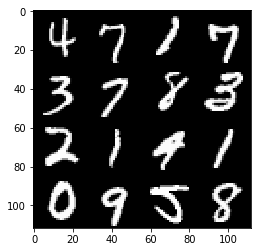

Reconstructed Images


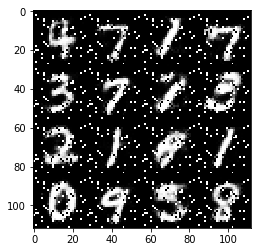

In [23]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    print(type(g))
    print(g.shape)
    print(type(batch_x))
    print(batch_x.shape)
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

In [24]:
# Training Parameters
learning_rate = 0.01
num_steps = 10000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 20 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)
#     print(batch_x.shape)
#     print(type(batch_x))
#     print(batch_x[:2])

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        print(batch_x.shape)
        print(type(batch_x))
        print(batch_x[:2])
        
print("This is going to calculate the Accuracy of LR with L2_reg ")
batch_x, batch_y = mnist.train.next_batch(batch_size)
encoded_x = sess.run(encoder_op, feed_dict={X: batch_x})

from sklearn.linear_model import LogisticRegression as LR
from scipy import sparse
print(encoded_x.shape)
print(batch_y.shape)


#news_train_label = np.array(newsgroups_train.target).tolist()
#y_true = tf.argmax(batch_y, axis=1)
y_true = tf.Session().run(tf.argmax(batch_y, axis=1))

print(type(y_true))
print(y_true.shape)

# mnist_data_sparse = sparse.csr_matrix(encoded_x)
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
# link: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

LR_L2 = LR(penalty='l2', solver = 'sag')
LR_L2_mnist_train = LR_L2.fit(encoded_x, y_true)
accuracy_mnist_train = LR_L2_mnist_train.score(encoded_x, y_true)

print("MNIST dataset when K =20,  Accuracy of LR with L2_reg is {}".format(accuracy_mnist_train))





Step 1: Minibatch Loss: 0.459735
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 1000: Minibatch Loss: 0.134022
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 2000: Minibatch Loss: 0.083907
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 3000: Minibatch Loss: 0.064593
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 4000: Minibatch Loss: 0.054189
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 5000: Minibatch Loss: 0.053457
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 6000: Minibatch Loss: 0.051807
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 7000: Minibatch Loss: 0.047485
(256, 784)
<cla

/Users/deshenghu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [27]:
# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 5 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)
#     print(batch_x.shape)
#     print(type(batch_x))
#     print(batch_x[:2])

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        print(batch_x.shape)
        print(type(batch_x))
        print(batch_x[:2])
        
print("This is going to calculate the Accuracy of LR with L2_reg ")
batch_x, batch_y = mnist.train.next_batch(batch_size)
encoded_x = sess.run(encoder_op, feed_dict={X: batch_x})

from sklearn.linear_model import LogisticRegression as LR
from scipy import sparse
print(encoded_x.shape)
print(batch_y.shape)


#news_train_label = np.array(newsgroups_train.target).tolist()
#y_true = tf.argmax(batch_y, axis=1)
y_true = tf.Session().run(tf.argmax(batch_y, axis=1))

print(type(y_true))
print(y_true.shape)

# mnist_data_sparse = sparse.csr_matrix(encoded_x)
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
# link: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

LR_L2 = LR(penalty='l2', solver = 'sag')
LR_L2_mnist_train = LR_L2.fit(encoded_x, y_true)
accuracy_mnist_train = LR_L2_mnist_train.score(encoded_x, y_true)

print("MNIST dataset when K =5, Accuracy of LR with L2_reg is {}".format(accuracy_mnist_train))




Step 1: Minibatch Loss: 0.446862
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 1000: Minibatch Loss: 0.120840
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 2000: Minibatch Loss: 0.069428
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 3000: Minibatch Loss: 0.067592
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 4000: Minibatch Loss: 0.067245
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 5000: Minibatch Loss: 0.067751
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 6000: Minibatch Loss: 0.065432
(256, 784)
<class 'numpy.ndarray'>
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 7000: Minibatch Loss: 0.066263
(256, 784)
<cla

<class 'numpy.ndarray'>
(4, 784)
<class 'numpy.ndarray'>
(4, 784)
<class 'numpy.ndarray'>
(4, 784)
<class 'numpy.ndarray'>
(4, 784)
<class 'numpy.ndarray'>
(4, 784)
<class 'numpy.ndarray'>
(4, 784)
<class 'numpy.ndarray'>
(4, 784)
<class 'numpy.ndarray'>
(4, 784)
Original Images


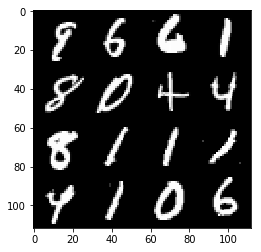

Reconstructed Images when K = 5


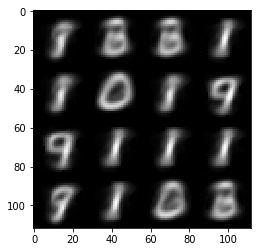

In [28]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    print(type(g))
    print(g.shape)
    print(type(batch_x))
    print(batch_x.shape)
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images when K = 5")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

## Fashion

### Fashion; K =128

In [39]:
import csv

##The “mnist_train_fashion.csv” is downloaded from webpage of this link : https://www.kaggle.com/zalando-research/fashionmnist
## here we only use the training data set for running the program

# data_array_fashion is to store the training data
data_array_fashion = []
with open("/Users/deshenghu/Dropbox/Dataset_CS6220/fashion-mnist_train.csv") as t:
    #read csv file using csv.reader()
    #source : https://docs.python.org/3/library/csv.html
    reader = csv.reader(t)
    for row in reader:
        data_array_fashion.append(row)

del data_array_fashion[0]
data_fashion_lable = [row[0] for row in data_array_fashion]
for i in range(len(data_array_fashion)):
    del data_array_fashion[i][0]
for i in range(len(data_array_fashion)):
    data_array_fashion[i] = list(map(int, data_array_fashion[i]))
data_fashion_training= data_array_fashion

# # get the lables of the training data, which is the first element of each row
# data_fashion_lable = [row[0] for row in data_array_fashion]

# # delete the lable which is the first element of each row
# # for i in range(len(data_array_fashion)):
# #     del data_array_fashion[i][0]

# ##???

# data_fashion_tempt =  data_array_fashion
# # because each element ("number") in the array is str and thus need to be converted
# data_fashion_training = [list(map(int, data_fashion_tempt[j])) for j in range(len(data_fashion_tempt))]



In [40]:
from sklearn.preprocessing import scale
data_fashion_training = scale(data_fashion_training)
print(data_fashion_training.shape)

(60000, 784)


In [41]:
import time
begin = time.time()
# Training Parameters
learning_rate = 0.01
num_steps = 2000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Step 1: Minibatch Loss: 1.576157
949.815024 second
<class 'numpy.ndarray'>
(256, 784)
[[-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]
 [-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]]
Step 1000: Minibatch Loss: 0.754958
964.049220 second
<class 'numpy.ndarray'>
(256, 784)
[[-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]
 [-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]]
Step 2000: Minibatch Loss: 0.721649
979.075121 second
<class 'numpy.ndarray'>
(256, 784)
[[-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]
 [-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]]
<class 'numpy.ndarray'>
(256, 784)
<class 'numpy.ndarray'>
(256, 784)
<class 'numpy.ndarray'>
(256, 784)
<class 'numpy.ndarray'>
(256, 784)
<class 'numpy.ndarray'>
(256, 784)
<class 'numpy.ndarray'>
(256, 784)
<class 'numpy.ndarray'>
(256, 7

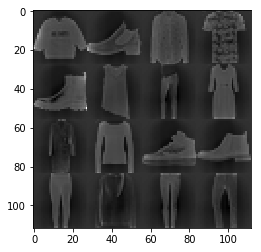

Reconstructed Images


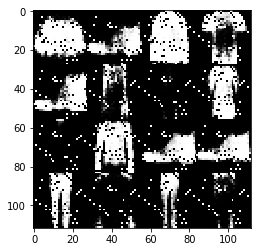

In [47]:
# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)


# Training
for i in range(1, num_steps+1):
   # batch_x, _ = data_fashion_training.train.next_batch(batch_size)
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    t = i%234
    batch_x = np.array(data_fashion_training[t*batch_size: (t+1)*batch_size])

    
    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        end = time.time()
        print("%f second" % (end-begin))
        print(type(batch_x))
        print(batch_x.shape)
        print(batch_x[:2])
        

        
        
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x = np.array(data_fashion_training[i*batch_size: (i+1)*batch_size])
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    print(type(g))
    print(g.shape)
    print(type(batch_x))
    print(batch_x.shape)
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

In [52]:
     
print("This is going to calculate the Accuracy of LR with L2_reg on Fashion dataset, K=128")
batch_x = data_fashion_training[: batch_size]
encoded_x = sess.run(encoder_op, feed_dict={X: batch_x})

from sklearn.linear_model import LogisticRegression as LR
from scipy import sparse
#print(encoded_x.shape)
#print(batch_y.shape)


#news_train_label = np.array(newsgroups_train.target).tolist()
#y_true = tf.argmax(batch_y, axis=1)
y_true = data_fashion_lable[:batch_size]

#print(type(y_true))
#print(y_true.shape)

# mnist_data_sparse = sparse.csr_matrix(encoded_x)
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
# link: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

LR_L2 = LR(penalty='l2', solver = 'sag')
LR_L2_fashion_train = LR_L2.fit(encoded_x, y_true)
accuracy_fashion_train = LR_L2_fashion_train.score(encoded_x, y_true)

print("Fashion dataset, Accuracy of LR with L2_reg is {}".format(accuracy_fashion_train))



This is going to calculate the Accuracy of LR with L2_reg on Fashion dataset, K=128


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fashion dataset, Accuracy of LR with L2_reg is 0.94140625


### Fashion K=20

In [53]:
import time
begin = time.time()
# Training Parameters
learning_rate = 0.01
num_steps = 2000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 20 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)


# Training
for i in range(1, num_steps+1):
   # batch_x, _ = data_fashion_training.train.next_batch(batch_size)
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    t = i%234
    batch_x = np.array(data_fashion_training[t*batch_size: (t+1)*batch_size])

    
    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        end = time.time()
        print("%f second" % (end-begin))
        print(type(batch_x))
        print(batch_x.shape)
        print(batch_x[:2])
        
    
print("This is going to calculate the Accuracy of LR with L2_reg on Fashion dataset, K=20")
batch_x = data_fashion_training[: batch_size]
encoded_x = sess.run(encoder_op, feed_dict={X: batch_x})

from sklearn.linear_model import LogisticRegression as LR
from scipy import sparse

y_true = data_fashion_lable[:batch_size]

LR_L2 = LR(penalty='l2', solver = 'sag')
LR_L2_fashion_train = LR_L2.fit(encoded_x, y_true)
accuracy_fashion_train = LR_L2_fashion_train.score(encoded_x, y_true)

print("Fashion dataset, Accuracy of LR with L2_reg is {}".format(accuracy_fashion_train))






Step 1: Minibatch Loss: 1.563083
4.086258 second
<class 'numpy.ndarray'>
(256, 784)
[[-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]
 [-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]]
Step 1000: Minibatch Loss: 0.781893
16.925354 second
<class 'numpy.ndarray'>
(256, 784)
[[-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]
 [-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]]
Step 2000: Minibatch Loss: 0.743086
30.498400 second
<class 'numpy.ndarray'>
(256, 784)
[[-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]
 [-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]]
This is going to calculate the Accuracy of LR with L2_reg on Fashion dataset, K=20
Fashion dataset, Accuracy of LR with L2_reg is 0.72265625


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Fashion, K = 5

Step 1: Minibatch Loss: 1.561776
3.281471 second
<class 'numpy.ndarray'>
(256, 784)
[[-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]
 [-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]]
Step 1000: Minibatch Loss: 0.842057
15.858916 second
<class 'numpy.ndarray'>
(256, 784)
[[-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]
 [-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]]
Step 2000: Minibatch Loss: 0.785467
28.790094 second
<class 'numpy.ndarray'>
(256, 784)
[[-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]
 [-0.00950488 -0.02269303 -0.02890692 ..., -0.15825831 -0.09143181
  -0.03304557]]
<class 'numpy.ndarray'>
(256, 784)
<class 'numpy.ndarray'>
(256, 784)
<class 'numpy.ndarray'>
(256, 784)
<class 'numpy.ndarray'>
(256, 784)
<class 'numpy.ndarray'>
(256, 784)
<class 'numpy.ndarray'>
(256, 784)
<class 'numpy.ndarray'>
(256, 784)


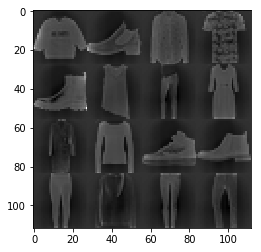

Reconstructed Images


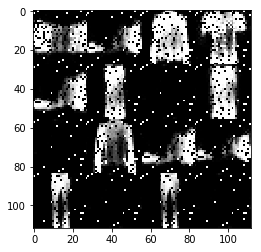

This is going to calculate the Accuracy of LR with L2_reg on Fashion dataset, K=5
Fashion dataset, Accuracy of LR with L2_reg is 0.53515625


In [54]:
import time
begin = time.time()
# Training Parameters
learning_rate = 0.01
num_steps = 2000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 5 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)


# Training
for i in range(1, num_steps+1):
   # batch_x, _ = data_fashion_training.train.next_batch(batch_size)
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    t = i%234
    batch_x = np.array(data_fashion_training[t*batch_size: (t+1)*batch_size])

    
    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        end = time.time()
        print("%f second" % (end-begin))
        print(type(batch_x))
        print(batch_x.shape)
        print(batch_x[:2])
        

n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x = np.array(data_fashion_training[i*batch_size: (i+1)*batch_size])
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    print(type(g))
    print(g.shape)
    print(type(batch_x))
    print(batch_x.shape)
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

print("This is going to calculate the Accuracy of LR with L2_reg on Fashion dataset, K=5")
batch_x = data_fashion_training[: batch_size]
encoded_x = sess.run(encoder_op, feed_dict={X: batch_x})

from sklearn.linear_model import LogisticRegression as LR
from scipy import sparse

y_true = data_fashion_lable[:batch_size]

LR_L2 = LR(penalty='l2', solver = 'sag')
LR_L2_fashion_train = LR_L2.fit(encoded_x, y_true)
accuracy_fashion_train = LR_L2_fashion_train.score(encoded_x, y_true)

print("Fashion dataset, Accuracy of LR with L2_reg is {}".format(accuracy_fashion_train))



In [61]:
from sklearn.metrics import pairwise_distances
fashion_trained = sess.run(decoder_op, feed_dict={X: data_fashion_training[:batch_size]})
pairwise_distances(data_fashion_training[0:100],data_fashion_training[0:100])-pairwise_distances(fashion_trained[0:100],fashion_trained[0:100])

array([[ -5.52427163e-03,   2.83388642e+01,   1.86280678e+01, ...,
          3.36494201e+01,   2.35595124e+01,   2.70878004e+01],
       [  2.83388642e+01,  -3.90625000e-03,   2.44075035e+01, ...,
          1.83963125e+01,   2.61311431e+01,   2.31840071e+01],
       [  1.86280678e+01,   2.44075035e+01,  -1.10478689e-02, ...,
          2.28578173e+01,   1.82785828e+01,   2.32146825e+01],
       ..., 
       [  3.36494201e+01,   1.83963125e+01,   2.28578173e+01, ...,
          4.76837158e-07,   2.30006707e+01,   2.08730647e+01],
       [  2.35595124e+01,   2.61311431e+01,   1.82785828e+01, ...,
          2.30006707e+01,   0.00000000e+00,   2.46229407e+01],
       [  2.70878004e+01,   2.31840071e+01,   2.32146825e+01, ...,
          2.08730647e+01,   2.46229407e+01,   0.00000000e+00]])

In [65]:
distance_mat_original = pairwise_distances(data_fashion_training[0:100],data_fashion_training[0:100])
distance_mat_new = pairwise_distances(fashion_trained[0:100],fashion_trained[0:100])
fashion_top_neighbours = []
for i in range(len(distance_mat_original)):
    top_20_original = set(np.argsort(np.array(distance_mat_original[i]))[:20])
    top_20_new = set(np.argsort(np.array(distance_mat_new[i]))[:20])
    fashion_top_neighbours.append(list(top_20_original.intersection(top_20_new)))


In [67]:
fashion_top_neighbours

[[0, 97, 75],
 [32, 1, 96, 35, 97, 45, 79, 16, 48, 21, 86, 56],
 [2, 37, 38, 70, 40, 8, 6, 5, 77, 82, 52, 53, 55, 89, 26, 59, 25],
 [3, 10, 76, 31, 18, 92, 63],
 [34, 99, 4, 69, 6, 39, 76, 80, 17, 18, 87, 92, 63, 31],
 [2, 37, 5, 40, 73, 74, 77, 14, 46, 82, 55, 89, 59, 25],
 [34, 2, 4, 6, 39, 40, 76, 17, 18, 53, 55, 89, 26, 59, 63, 25, 31],
 [64, 33, 66, 36, 7, 41, 78, 15, 50, 19, 51, 85, 88],
 [2, 37, 38, 70, 8, 40, 74, 5, 81, 82, 52, 53, 55, 23, 25, 26, 59],
 [33, 36, 9, 43, 44, 83, 85, 22, 88, 57, 62, 95],
 [2, 3, 4, 6, 39, 40, 10, 76, 31, 17, 18, 59, 92, 63],
 [64, 33, 36, 41, 11, 43, 78, 15, 19, 51, 85, 88, 62],
 [56, 35, 12],
 [2, 3, 90, 13, 81, 53, 26, 92, 31],
 [5, 73, 74, 77, 46, 14, 49, 82, 55, 89],
 [33, 36, 41, 43, 44, 78, 15, 19, 51, 85, 22, 88, 58, 62, 95],
 [32, 1, 97, 35, 68, 0, 42, 45, 79, 16, 21, 86, 56],
 [34, 99, 4, 69, 6, 76, 80, 17, 18, 87, 92, 63, 31],
 [4, 69, 39, 72, 76, 80, 18, 87, 92, 63, 31],
 [64, 33, 36, 41, 43, 78, 15, 19, 51, 85, 88, 58, 62, 95],
 [36, 4

## Spam

In [75]:
# data_spam = []
# data_spam_label = []
# with open('/Users/deshenghu/Dropbox/Dataset_CS6220/spambase/spambase.data') as f:
#     reader = csv.reader(f)
#     for row in reader:
#         data_spam_label.append(float(row[-1]))
#         data_spam.append(list(map(float,row[:56])))
        
# print(data_spam[:10])
# print(data_spam_label[:10])
# print(len(data_spam))
# print(len(data_spam_label))      
        
import numpy as np
import csv
from sklearn.preprocessing import scale

##The “mnist_train_fashion.csv” is downloaded from webpage of this link : https://www.kaggle.com/zalando-research/fashionmnist
## here we only use the training data set for running the program

# data_array_fashion is to store the training data
spam = []
with open("/Users/deshenghu/Dropbox/Dataset_CS6220/spambase/spambase.data") as t:
    for row in t:
        spam.append(list(map(float, row.replace("\n", "").split(","))))

spam_data = []
spam_label = []

for i in range(len(spam)):
    spam_label.append(spam[i][-1])
    #### equal to  spam_data.append(list(map(float, row[:57])))
    spam_data.append(spam[i][:-1])

print(np.array(spam_data).shape)
print(type(spam_data))
#print(spam_label.shape)
print(len(spam_data))
print(len(spam_label))        
spam_data = scale(spam_data)     




(4601, 57)
<class 'list'>
4601
4601


### Spam, K=128

In [84]:
import time
begin = time.time()
# Training Parameters
learning_rate = 0.01
num_steps = 2000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)

num_input = len(spam_data[2]) # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)


# Training
for i in range(1, num_steps+1):
   # batch_x, _ = data_fashion_training.train.next_batch(batch_size)
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    t = i%17
    batch_x = np.array(spam_data[t*batch_size: (t+1)*batch_size])

    
    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        end = time.time()
        print("%f second" % (end-begin))
        print(type(batch_x))
        print(batch_x.shape)
        print(batch_x[:2])

        
        
from sklearn.utils import shuffle       
    
print("This is going to calculate the Accuracy of LR with L2_reg on Spam dataset, K=128")
batch_x = spam_data[: batch_size*10]
encoded_x = sess.run(encoder_op, feed_dict={X: batch_x})

from sklearn.linear_model import LogisticRegression as LR
from scipy import sparse

y_true = spam_label[:batch_size*10]


LR_L2 = LR(penalty='l2')
LR_L2_spam_train = LR_L2.fit(encoded_x, y_true)
accuracy_spam_train = LR_L2_spam_train.score(encoded_x, y_true)

print("Spam dataset K=128, Accuracy of LR with L2_reg is {}".format(accuracy_spam_train))


Step 1: Minibatch Loss: 1.197126
6.180483 second
<class 'numpy.ndarray'>
(256, 57)
[[-0.34243371 -0.16507191  2.26020736 -0.04689958  0.59154238 -0.35026618
  -0.29179389  1.50788898 -0.32330236  0.7299481  -0.29685953 -0.62871259
  -0.31205521 -0.17492717 -0.19011441 -0.3013776   6.0976813   5.01870182
  -0.136372   -0.16789311  2.29889784 -0.11817151 -0.2902092  -0.21299439
  -0.32881467 -0.29923993 -0.22789481 -0.23183016 -0.16673145 -0.22523952
  -0.16053931 -0.14321202 -0.17492026 -0.14521515 -0.19806739 -0.24213022
  -0.32345561 -0.05983624 -0.18091134 -0.18530385 -0.12090468 -0.17259996
  -0.20599311 -0.12734332 -0.29777621 -0.19738748 -0.0713879  -0.11154623
  -0.15845336 -0.51430655 -0.15519768  0.81160245 -0.30835494 -0.1030484
   0.21633628  0.3326688  -0.10933739]
 [ 2.27773049 -0.16507191  1.03026361 -0.04689958  1.91508117 -0.35026618
  -0.29179389 -0.26256156 -0.32330236 -0.37136439 -0.29685953 -0.62871259
  -0.31205521 -0.17492717 -0.19011441  0.667495    1.4806377  -0.

### Spam, K=20

In [86]:
import time
begin = time.time()
# Training Parameters
learning_rate = 0.01
num_steps = 2000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 20 # 2nd layer num features (the latent dim)

num_input = len(spam_data[2]) # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)


# Training
for i in range(1, num_steps+1):
   # batch_x, _ = data_fashion_training.train.next_batch(batch_size)
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    t = i%17
    batch_x = np.array(spam_data[t*batch_size: (t+1)*batch_size])

    
    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        end = time.time()
        print("%f second" % (end-begin))
        print(type(batch_x))
        print(batch_x.shape)
        print(batch_x[:2])

        
        
from sklearn.utils import shuffle       
    
print("This is going to calculate the Accuracy of LR with L2_reg on Spam dataset, K=20")
batch_x = spam_data[: batch_size*10]
encoded_x = sess.run(encoder_op, feed_dict={X: batch_x})

from sklearn.linear_model import LogisticRegression as LR
from scipy import sparse

y_true = spam_label[:batch_size*10]


LR_L2 = LR(penalty='l2')
LR_L2_spam_train = LR_L2.fit(encoded_x, y_true)
accuracy_spam_train = LR_L2_spam_train.score(encoded_x, y_true)

print("Spam dataset K=20, Accuracy of LR with L2_reg is {}".format(accuracy_spam_train))


# X_shuf, Y_shuf = shuffle(X_transformed, Y)

# train_spam = sess.run(encoder_op, feed_dict={X: data_spam[:3000]})
#     test_spam = sess.run(encoder_op, feed_dict={X: data_spam[3000:]})
#     from sklearn.linear_model import LogisticRegression as LR
#     lr = LR(penalty = "l2")
#     lr.fit(train_spam, data_spam_label[:3000])
#     print("Accuracy(Training): %s"%lr.score(train_spam, data_spam_label[:3000]))
#     print("Accuracy(Test): %s"%lr.score(test_spam, data_spam_label[3000:]))

Step 1: Minibatch Loss: 1.196183
5.365278 second
<class 'numpy.ndarray'>
(256, 57)
[[-0.34243371 -0.16507191  2.26020736 -0.04689958  0.59154238 -0.35026618
  -0.29179389  1.50788898 -0.32330236  0.7299481  -0.29685953 -0.62871259
  -0.31205521 -0.17492717 -0.19011441 -0.3013776   6.0976813   5.01870182
  -0.136372   -0.16789311  2.29889784 -0.11817151 -0.2902092  -0.21299439
  -0.32881467 -0.29923993 -0.22789481 -0.23183016 -0.16673145 -0.22523952
  -0.16053931 -0.14321202 -0.17492026 -0.14521515 -0.19806739 -0.24213022
  -0.32345561 -0.05983624 -0.18091134 -0.18530385 -0.12090468 -0.17259996
  -0.20599311 -0.12734332 -0.29777621 -0.19738748 -0.0713879  -0.11154623
  -0.15845336 -0.51430655 -0.15519768  0.81160245 -0.30835494 -0.1030484
   0.21633628  0.3326688  -0.10933739]
 [ 2.27773049 -0.16507191  1.03026361 -0.04689958  1.91508117 -0.35026618
  -0.29179389 -0.26256156 -0.32330236 -0.37136439 -0.29685953 -0.62871259
  -0.31205521 -0.17492717 -0.19011441  0.667495    1.4806377  -0.

### Spam, K=5

In [87]:
import time
begin = time.time()
# Training Parameters
learning_rate = 0.01
num_steps = 2000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 5 # 2nd layer num features (the latent dim)

num_input = len(spam_data[2]) # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)


# Training
for i in range(1, num_steps+1):
   # batch_x, _ = data_fashion_training.train.next_batch(batch_size)
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    t = i%17
    batch_x = np.array(spam_data[t*batch_size: (t+1)*batch_size])

    
    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        end = time.time()
        print("%f second" % (end-begin))
        print(type(batch_x))
        print(batch_x.shape)
        print(batch_x[:2])

        
        
from sklearn.utils import shuffle       
    
print("This is going to calculate the Accuracy of LR with L2_reg on Spam dataset, K=5")
batch_x = spam_data[: batch_size*10]
encoded_x = sess.run(encoder_op, feed_dict={X: batch_x})

from sklearn.linear_model import LogisticRegression as LR
from scipy import sparse

y_true = spam_label[:batch_size*10]


LR_L2 = LR(penalty='l2')
LR_L2_spam_train = LR_L2.fit(encoded_x, y_true)
accuracy_spam_train = LR_L2_spam_train.score(encoded_x, y_true)

print("Spam dataset K=5, Accuracy of LR with L2_reg is {}".format(accuracy_spam_train))


# X_shuf, Y_shuf = shuffle(X_transformed, Y)

# train_spam = sess.run(encoder_op, feed_dict={X: data_spam[:3000]})
#     test_spam = sess.run(encoder_op, feed_dict={X: data_spam[3000:]})
#     from sklearn.linear_model import LogisticRegression as LR
#     lr = LR(penalty = "l2")
#     lr.fit(train_spam, data_spam_label[:3000])
#     print("Accuracy(Training): %s"%lr.score(train_spam, data_spam_label[:3000]))
#     print("Accuracy(Test): %s"%lr.score(test_spam, data_spam_label[3000:]))

Step 1: Minibatch Loss: 1.197801
4.190332 second
<class 'numpy.ndarray'>
(256, 57)
[[-0.34243371 -0.16507191  2.26020736 -0.04689958  0.59154238 -0.35026618
  -0.29179389  1.50788898 -0.32330236  0.7299481  -0.29685953 -0.62871259
  -0.31205521 -0.17492717 -0.19011441 -0.3013776   6.0976813   5.01870182
  -0.136372   -0.16789311  2.29889784 -0.11817151 -0.2902092  -0.21299439
  -0.32881467 -0.29923993 -0.22789481 -0.23183016 -0.16673145 -0.22523952
  -0.16053931 -0.14321202 -0.17492026 -0.14521515 -0.19806739 -0.24213022
  -0.32345561 -0.05983624 -0.18091134 -0.18530385 -0.12090468 -0.17259996
  -0.20599311 -0.12734332 -0.29777621 -0.19738748 -0.0713879  -0.11154623
  -0.15845336 -0.51430655 -0.15519768  0.81160245 -0.30835494 -0.1030484
   0.21633628  0.3326688  -0.10933739]
 [ 2.27773049 -0.16507191  1.03026361 -0.04689958  1.91508117 -0.35026618
  -0.29179389 -0.26256156 -0.32330236 -0.37136439 -0.29685953 -0.62871259
  -0.31205521 -0.17492717 -0.19011441  0.667495    1.4806377  -0.

In [88]:
from sklearn.metrics import pairwise_distances
spam_trained = sess.run(decoder_op, feed_dict={X: spam_data[:batch_size]})
pairwise_distances(spam_data[0:100],spam_data[0:100])-pairwise_distances(spam_trained[0:100],spam_trained[0:100])

array([[  0.00000000e+00,   1.09499646e+00,   6.74339676e+00, ...,
          2.46592544e-01,   3.86253698e+00,   3.05653481e+00],
       [  1.09499646e+00,   1.03238273e-07,   5.35526635e+00, ...,
          8.62186815e-01,   2.24211876e+00,   2.79122965e+00],
       [  6.74339676e+00,   5.35526635e+00,  -1.38082949e-03, ...,
          6.56433447e+00,   7.39177347e+00,   7.22238980e+00],
       ..., 
       [  2.46592544e-01,   8.62186815e-01,   6.56433447e+00, ...,
          0.00000000e+00,   3.52841576e+00,   3.11522653e+00],
       [  3.86253698e+00,   2.24211876e+00,   7.39177347e+00, ...,
          3.52841576e+00,   0.00000000e+00,   4.85809085e+00],
       [  3.05653481e+00,   2.79122965e+00,   7.22238980e+00, ...,
          3.11522653e+00,   4.85809085e+00,   0.00000000e+00]])

In [89]:
distance_mat_original = pairwise_distances(spam_data[0:100],spam_data[0:100])
distance_mat_new = pairwise_distances(spam_trained[0:100],spam_trained[0:100])
spam_top_neighbours = []
for i in range(len(distance_mat_original)):
    top_20_original = set(np.argsort(np.array(distance_mat_original[i]))[:20])
    top_20_new = set(np.argsort(np.array(distance_mat_new[i]))[:20])
    spam_top_neighbours.append(list(top_20_original.intersection(top_20_new)))



In [90]:
spam_top_neighbours

[[0, 97, 96, 38, 71, 39, 72, 9, 12, 76, 52, 58, 59, 60],
 [64, 1, 68, 77, 49],
 [72, 2, 19, 94],
 [3, 4, 9, 43, 78, 16, 18],
 [3, 4, 9, 43, 78, 16, 18],
 [32, 5, 7, 11, 78, 16],
 [66, 3, 4, 6, 73, 10, 13, 23, 63, 62, 95],
 [32, 5, 7, 11, 78, 16],
 [64, 8, 9, 11, 44, 81, 52, 29],
 [97, 9, 11, 16, 52, 24, 26],
 [66, 3, 68, 4, 6, 73, 10, 13, 95, 62, 63],
 [97, 9, 11, 80, 52, 55, 24, 26],
 [0, 97, 96, 38, 71, 39, 72, 9, 12, 52, 58, 59, 60],
 [66, 3, 4, 6, 73, 10, 13, 63, 62, 95],
 [65, 68, 73, 14, 82, 23],
 [3, 4, 9, 78, 15, 16, 81, 55, 23],
 [32, 16, 50, 55],
 [97, 9, 11, 80, 17, 52, 55, 24, 26],
 [4, 9, 43, 16, 18, 52, 86],
 [96, 33, 2, 38, 72, 79, 19, 87, 58, 60, 94],
 [97, 9, 11, 20, 52, 84, 55, 24, 26],
 [32, 9, 11, 16, 52, 21, 25],
 [36, 41, 42, 11, 78, 15, 16, 55, 22, 23, 28],
 [63, 23],
 [97, 9, 11, 16, 52, 84, 55, 24, 26],
 [32, 9, 11, 16, 52, 21, 25],
 [97, 9, 11, 16, 52, 84, 55, 24, 26],
 [3, 4, 9, 11, 15, 80, 81, 52, 26, 27, 61],
 [36, 41, 42, 11, 23, 22, 55, 28],
 [8, 11, 44, 

## 20NG

In [99]:
# code source from http://scikit-learn.org/stable/datasets/twenty_newsgroups.html#
# code source from http://www.nltk.org/book/ch02.html
# code source from http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html
import numpy as np
from sklearn.datasets import fetch_20newsgroups

import nltk
from nltk.corpus import stopwords
import string

# extracts the archive contents in the ~/scikit_learn_data/20news_home folder 
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

################# this part is for pre-processing the text file which isn't mandatory
# get rid of the stopwords and punctuation
nltk.download('stopwords')
stop_word =stopwords.words('english')
punctuation = string.punctuation
stopw_punctuation = list(stop_word) + list(punctuation)

# from http://scikit-learn.org/stable/datasets/twenty_newsgroups.html
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.5, stop_words = 'english')
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
# the test data set don't need to fit
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.5, stop_words = 'english', vocabulary = vectorizer.vocabulary_)
vectors_test = vectorizer.fit_transform(newsgroups_test.data)
print(vectors_train.shape)
print(vectors_test.shape)

# convert into dense matrix
#news_train = vectors_train.todense()
#news_test = vectors_test.todense()
news_train = vectors_train
news_test = vectors_test
print(type(news_train))

print(np.shape(newsgroups_train.target))
## news_train_label = np.array(newsgroups_train.target).tolist()
news_train_label = newsgroups_train.target
print(news_train_label)

print(news_train_label.shape)
news_test_label = newsgroups_test.target
print(type(news_train_label))

print(news_train_label[0:100])


from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest as SKB

## to select features according to the 200 highest scores.
chi2_200_features = SKB(score_func = chi2, k = 1000)
news_train_label = newsgroups_train.target
chi2_200_features.fit(news_train, news_train_label)
chi2_200_features = chi2_200_features.transform(news_train)


print(type(chi2_200_features))
print(chi2_200_features[:1])

news_train = chi2_200_features.todense()
news_train_label = np.array(newsgroups_train.target).tolist()
#print(news_train_label.shape)
news_train = scale(news_train)
news_train_label = news_train_label
print(news_train.shape)
#print(news_train_label.shape)







[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deshenghu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
(11314, 129791)
(7532, 129791)
<class 'scipy.sparse.csr.csr_matrix'>
(11314,)
[7 4 4 ..., 3 1 8]
(11314,)
<class 'numpy.ndarray'>
[ 7  4  4  1 14 16 13  3  2  4  8 19  4 14  6  0  1  7 12  5  0 10  6  2  4
  1 12  9 15  7  6 13 12 17 18 10  8 11  8 16  9  4  3  9  9  4  4  8 12 14
  5 15  2 13 17 11  7 10  2 14 12  5  4  6  7  0 11 16  0  6 17  7 12  7  3
 12 11  7  2  2  0 16  1  2  7  3  2  1 10 12 12 17 12  2  8  8 18  5  0  1]
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 890)	0.0675447884203
  (0, 299)	0.119065108274
  (0, 149)	0.243916531313
(11314, 1000)


### 20NG, K=128

In [109]:
import time
begin = time.time()
# Training Parameters
learning_rate = 0.01
num_steps = 2000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)

num_input = len(news_train[2]) # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)


# Training
for i in range(1, num_steps+1):
   # batch_x, _ = data_fashion_training.train.next_batch(batch_size)
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    t = i%44 # 44 because 11314 /256 = 44.19,thus we get 44
    batch_x = np.array(news_train[t*batch_size: (t+1)*batch_size])

    
    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        end = time.time()
        print("%f second" % (end-begin))
        print(type(batch_x))
        print(batch_x.shape)
        print(batch_x[:2])

        
        
from sklearn.utils import shuffle       
    
print("This is going to calculate the Accuracy of LR with L2_reg on 20NG news dataset, K=128")
batch_x = news_train[: batch_size*10]
encoded_x = sess.run(encoder_op, feed_dict={X: batch_x})

from sklearn.linear_model import LogisticRegression as LR
from scipy import sparse

y_true = news_train_label[:batch_size*10]


LR_L2 = LR(penalty='l2')
LR_L2_news_train = LR_L2.fit(encoded_x, y_true)
accuracy_news_train = LR_L2_news_train.score(encoded_x, y_true)

print("20NG news dataset K=128, Accuracy of LR with L2_reg is {}".format(accuracy_news_train))



Step 1: Minibatch Loss: 1.536317
7.250615 second
<class 'numpy.ndarray'>
(256, 1000)
[[-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]
 [-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]]
Step 1000: Minibatch Loss: 0.938269
23.920986 second
<class 'numpy.ndarray'>
(256, 1000)
[[-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]
 [-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]]
Step 2000: Minibatch Loss: 0.946032
42.366820 second
<class 'numpy.ndarray'>
(256, 1000)
[[-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]
 [-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]]
This is going to calculate the Accuracy of LR with L2_reg on 20NG news dataset, K=128
20NG news dataset K=128, Accuracy of LR with L2_reg is 0.70234375


In [110]:
print(accuracy_news_train)

0.70234375


In [114]:
from sklearn.metrics import pairwise_distances
trained_news = sess.run(decoder_op, feed_dict={X: news_train[:batch_size]})
pairwise_distances(news_train[0:100],news_train[0:100])-pairwise_distances(trained_news[0:100],trained_news[0:100])


array([[  5.33120150e-07,   2.25249050e+01,   3.09151186e+01, ...,
          2.23137185e+01,   2.35863119e+01,   1.82348840e+01],
       [  2.25249050e+01,   0.00000000e+00,   3.07624741e+01, ...,
          2.33329188e+01,   2.45913086e+01,   1.95457660e+01],
       [  3.09151186e+01,   3.07624741e+01,  -2.76213582e-03, ...,
          3.16392969e+01,   3.25566512e+01,   2.89721402e+01],
       ..., 
       [  2.23137185e+01,   2.33329188e+01,   3.16392969e+01, ...,
          3.37174788e-07,   2.48163453e+01,   1.98026309e+01],
       [  2.35863119e+01,   2.45913086e+01,   3.25566512e+01, ...,
          2.48163453e+01,   5.84003864e-07,   2.15230356e+01],
       [  1.82348840e+01,   1.95457660e+01,   2.89721402e+01, ...,
          1.98026309e+01,   2.15230356e+01,   0.00000000e+00]])

In [115]:
distance_mat_original = pairwise_distances(news_train[0:100],news_train[0:100])
distance_mat_new = pairwise_distances(trained_news[0:100],trained_news[0:100])
news_top_neighbours = []
for i in range(len(distance_mat_original)):
    top_20_original = set(np.argsort(np.array(distance_mat_original[i]))[:20])
    top_20_new = set(np.argsort(np.array(distance_mat_new[i]))[:20])
    news_top_neighbours.append(list(top_20_original.intersection(top_20_new)))

In [116]:
news_top_neighbours

[[0, 99, 12, 45, 48, 82, 19, 83, 25, 90, 63],
 [1, 99, 12, 45, 82, 19, 83, 25, 27, 30, 63],
 [2, 99, 12, 45, 82, 19, 83, 25, 63],
 [99, 3, 12, 45, 48, 82, 83, 19, 27, 30],
 [99, 4, 12, 45, 46, 82, 83, 27, 30],
 [99, 5, 12, 45, 82, 83, 27, 30],
 [99, 6, 12, 45, 82, 19, 83, 25, 90, 63],
 [99, 3, 7, 42, 12, 45, 82, 83, 89],
 [99, 69, 8, 12, 45, 82, 83, 27, 30],
 [96, 99, 69, 9, 12, 45, 82, 83, 27, 30],
 [99, 73, 10, 12, 45, 77, 82, 83, 27, 30],
 [98, 99, 11, 12, 45, 82, 83, 22, 27, 30],
 [99, 69, 12, 45, 48, 82, 83, 19, 27, 30],
 [99, 12, 45, 13, 82, 83, 22, 27, 30],
 [99, 69, 12, 45, 14, 82, 83, 27, 30],
 [99, 12, 45, 15, 48, 82, 83, 27, 30],
 [96, 99, 69, 12, 45, 16, 82, 83, 19, 27, 30],
 [99, 69, 12, 45, 48, 17, 82, 83, 27, 30],
 [99, 12, 45, 18, 83, 82, 27, 30],
 [99, 12, 45, 82, 19, 83, 25, 90, 63],
 [99, 12, 45, 48, 82, 83, 20, 27, 30],
 [99, 12, 45, 48, 82, 83, 21, 27, 30],
 [99, 12, 45, 48, 82, 83, 22, 27, 30],
 [99, 12, 45, 82, 83, 23, 27, 30],
 [96, 66, 99, 12, 45, 82, 83, 24, 2

### 20NG, K=20

In [103]:
import time
begin = time.time()
# Training Parameters
learning_rate = 0.01
num_steps = 4000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 20 # 2nd layer num features (the latent dim)

num_input = len(news_train[2]) # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)


# Training
for i in range(1, num_steps+1):
   # batch_x, _ = data_fashion_training.train.next_batch(batch_size)
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    t = i%44 # 44 because 11314 /256 = 44.19,thus we get 44
    batch_x = np.array(news_train[t*batch_size: (t+1)*batch_size])

    
    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        end = time.time()
        print("%f second" % (end-begin))
        print(type(batch_x))
        print(batch_x.shape)
        print(batch_x[:2])

        
        
from sklearn.utils import shuffle       
    
print("This is going to calculate the Accuracy of LR with L2_reg on 20NG news dataset, K=20")
batch_x = news_train[: batch_size*10]
encoded_x = sess.run(encoder_op, feed_dict={X: batch_x})

from sklearn.linear_model import LogisticRegression as LR
from scipy import sparse

y_true = news_train_label[:batch_size*10]


LR_L2 = LR(penalty='l2')
LR_L2_news_train = LR_L2.fit(encoded_x, y_true)
accuracy_news_train = LR_L2_news_train.score(encoded_x, y_true)

print("20NG news dataset K=20, Accuracy of LR with L2_reg is {}".format(accuracy_news_train))




Step 1: Minibatch Loss: 1.536678
5.751381 second
<class 'numpy.ndarray'>
(256, 1000)
[[-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]
 [-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]]
Step 1000: Minibatch Loss: 0.962081
21.770559 second
<class 'numpy.ndarray'>
(256, 1000)
[[-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]
 [-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]]
Step 2000: Minibatch Loss: 0.959070
38.942942 second
<class 'numpy.ndarray'>
(256, 1000)
[[-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]
 [-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]]
Step 3000: Minibatch Loss: 1.019538
56.497545 second
<class 'numpy.ndarray'>
(256, 1000)
[[-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]
 [-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0

### 20NG, K=5

In [104]:
import time
begin = time.time()
# Training Parameters
learning_rate = 0.01
num_steps = 4000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 5 # 2nd layer num features (the latent dim)

num_input = len(news_train[2]) # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)


# Training
for i in range(1, num_steps+1):
   # batch_x, _ = data_fashion_training.train.next_batch(batch_size)
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    t = i%44 # 44 because 11314 /256 = 44.19,thus we get 44
    batch_x = np.array(news_train[t*batch_size: (t+1)*batch_size])

    
    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        end = time.time()
        print("%f second" % (end-begin))
        print(type(batch_x))
        print(batch_x.shape)
        print(batch_x[:2])

        
        
from sklearn.utils import shuffle       
    
print("This is going to calculate the Accuracy of LR with L2_reg on 20NG news dataset, K=5")
batch_x = news_train[: batch_size*10]
encoded_x = sess.run(encoder_op, feed_dict={X: batch_x})

from sklearn.linear_model import LogisticRegression as LR
from scipy import sparse

y_true = news_train_label[:batch_size*10]


LR_L2 = LR(penalty='l2')
LR_L2_news_train = LR_L2.fit(encoded_x, y_true)
accuracy_news_train = LR_L2_news_train.score(encoded_x, y_true)

print("20NG news dataset K=5, Accuracy of LR with L2_reg is {}".format(accuracy_news_train))




Step 1: Minibatch Loss: 1.524566
4.843080 second
<class 'numpy.ndarray'>
(256, 1000)
[[-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]
 [-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]]
Step 1000: Minibatch Loss: 0.984257
20.038555 second
<class 'numpy.ndarray'>
(256, 1000)
[[-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]
 [-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]]
Step 2000: Minibatch Loss: 0.995710
36.316536 second
<class 'numpy.ndarray'>
(256, 1000)
[[-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]
 [-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]]
Step 3000: Minibatch Loss: 1.056244
52.979362 second
<class 'numpy.ndarray'>
(256, 1000)
[[-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0.06053016]
 [-0.04375103 -0.05675628 -0.0796092  ..., -0.06141446 -0.07593354
  -0

In [105]:
from sklearn.metrics import pairwise_distances
trained_news = sess.run(decoder_op, feed_dict={X: news_train[:batch_size]})
pairwise_distances(news_train[0:100],news_train[0:100])-pairwise_distances(trained_news[0:100],trained_news[0:100])

array([[  5.33120150e-07,   2.27061251e+01,   3.20014969e+01, ...,
          2.35961723e+01,   2.50205933e+01,   1.92676754e+01],
       [  2.27061251e+01,   0.00000000e+00,   3.18453056e+01, ...,
          2.45510927e+01,   2.59257618e+01,   2.04259669e+01],
       [  3.20014969e+01,   3.18453056e+01,   0.00000000e+00, ...,
          3.32737906e+01,   3.42986899e+01,   3.03580156e+01],
       ..., 
       [  2.35961723e+01,   2.45510927e+01,   3.32737906e+01, ...,
          3.37174788e-07,   2.63802561e+01,   2.10033010e+01],
       [  2.50205933e+01,   2.59257618e+01,   3.42986899e+01, ...,
          2.63802561e+01,   5.84003864e-07,   2.25920962e+01],
       [  1.92676754e+01,   2.04259669e+01,   3.03580156e+01, ...,
          2.10033010e+01,   2.25920962e+01,   0.00000000e+00]])

In [106]:

distance_mat_original = pairwise_distances(news_train[0:100],news_train[0:100])
distance_mat_new = pairwise_distances(trained_news[0:100],trained_news[0:100])
news_top_neighbours = []
for i in range(len(distance_mat_original)):
    top_20_original = set(np.argsort(np.array(distance_mat_original[i]))[:20])
    top_20_new = set(np.argsort(np.array(distance_mat_new[i]))[:20])
    news_top_neighbours.append(list(top_20_original.intersection(top_20_new)))




In [107]:
news_top_neighbours

[[0, 66, 69, 77, 46, 48, 63],
 [66, 69, 46, 63],
 [41, 66, 69, 46],
 [66, 69, 46, 48, 63],
 [66, 99, 41, 82, 22, 63],
 [66, 69, 46, 63],
 [6, 41, 46, 82, 90, 31],
 [66, 69, 41, 46, 63],
 [66, 69, 46, 63],
 [66, 69, 75, 46, 63],
 [96, 73, 10, 77, 45, 82, 63],
 [98, 66, 69, 46, 63],
 [66, 41, 46, 48, 30, 63],
 [66, 99, 13, 46, 82, 22, 63],
 [66, 69, 41, 46, 83, 30],
 [99, 46, 15, 48, 83, 22],
 [66, 16, 82, 22, 90],
 [0, 66, 69, 46, 48, 63],
 [66, 69, 46, 63],
 [66, 69, 46, 63],
 [66, 69, 41, 46, 48, 63],
 [48, 66, 99, 63],
 [66, 69, 46, 48, 63],
 [66, 99, 41, 82, 22, 23, 63],
 [66, 69, 41, 46, 63],
 [66, 69, 41, 46, 48, 63],
 [66, 69, 73, 46, 63],
 [66, 69, 41, 46, 48, 63],
 [66, 69, 41, 48, 63],
 [0, 66, 69, 41, 46, 48, 63],
 [0, 66, 69, 41, 46, 48, 63],
 [66, 6, 41, 82, 90, 31],
 [66, 69, 46, 63],
 [33, 98, 22],
 [41, 34, 46, 22],
 [86, 66, 35, 22],
 [66, 36, 41, 45, 90],
 [3, 99, 69, 37, 46, 82, 30],
 [66, 99, 38, 41, 12, 90],
 [96, 63, 45, 39],
 [66, 69, 41, 46, 48, 63],
 [66, 99, 46

# Problem4

In [ ]:
# code source from http://scikit-learn.org/stable/datasets/twenty_newsgroups.html#
# code source from http://www.nltk.org/book/ch02.html
# code source from http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html

from sklearn.datasets import fetch_20newsgroups

import nltk
from nltk.corpus import stopwords
import string


# extracts the archive contents in the ~/scikit_learn_data/20news_home folder 
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

################# this part is for pre-processing the text file which isn't mandatory
# get rid of the stopwords and punctuation
nltk.download('stopwords')
stop_word =stopwords.words('english')
punctuation = string.punctuation
stopw_punctuation = list(stop_word) + list(punctuation)

# from nltk.tokenize import word_tokenize

# # to tokenize the word
# for j in range(len(newsgroups_train.data)):
#     newsgroups_train.data[j] = " ".join([w for w in word_tokenize(newsgroups_train.data[j]) if w not in stopw_punctuation])
#    # print(newsgroups_train.data[])
# for j in range(len(newsgroups_test.data)):
#     newsgroups_test.data[j] = " ".join([w for w in word_tokenize(newsgroups_train.data[j]) if w not in stopw_punctuation])

#print(len(newsgroups_train.data))
#print(newsgroups_train.data[1])

##############

# from http://scikit-learn.org/stable/datasets/twenty_newsgroups.html
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.5, stop_words = 'english')
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
print(type(newsgroups_train.data))
print(newsgroups_train.data[0])
# # the test data set don't need to fit
# vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.5, stop_words = 'english', vocabulary = vectorizer.vocabulary_)
# vectors_test = vectorizer.fit_transform(newsgroups_test.data)
# print(vectors_train.shape)
# print(vectors_test.shape)


# news_train = vectors_train
# news_test = vectors_test

# Problem 4

10000
Data size 3252437
Most common words (+UNK) [['UNK', 329117], ('the', 127670), ('to', 69836), ('of', 66705), ('a', 56148)]
Sample data [26, 0, 0, 44, 23723, 25, 9286, 336, 6, 0] ['From:', 'UNK', 'UNK', 'my', 'thing)', 'Subject:', 'WHAT', 'car', 'is', 'UNK']
0 UNK -> 26 From:
0 UNK -> 0 UNK
0 UNK -> 0 UNK
0 UNK -> 44 my
44 my -> 23723 thing)
44 my -> 0 UNK
23723 thing) -> 44 my
23723 thing) -> 25 Subject:
Initialized
Average loss at step  0 :  279.08807373
Average loss at step  2000 :  126.578538847
Average loss at step  4000 :  56.8717733793
Average loss at step  6000 :  36.8518475986
Average loss at step  8000 :  50.9238937516
Average loss at step  10000 :  20.4211119056
Average loss at step  12000 :  15.2171283417
Average loss at step  14000 :  17.1637898623
Average loss at step  16000 :  12.2976181495
Average loss at step  18000 :  9.37603461802
Average loss at step  20000 :  9.81580820358
Average loss at step  22000 :  7.39019537297
Average loss at step  24000 :  13.431785476


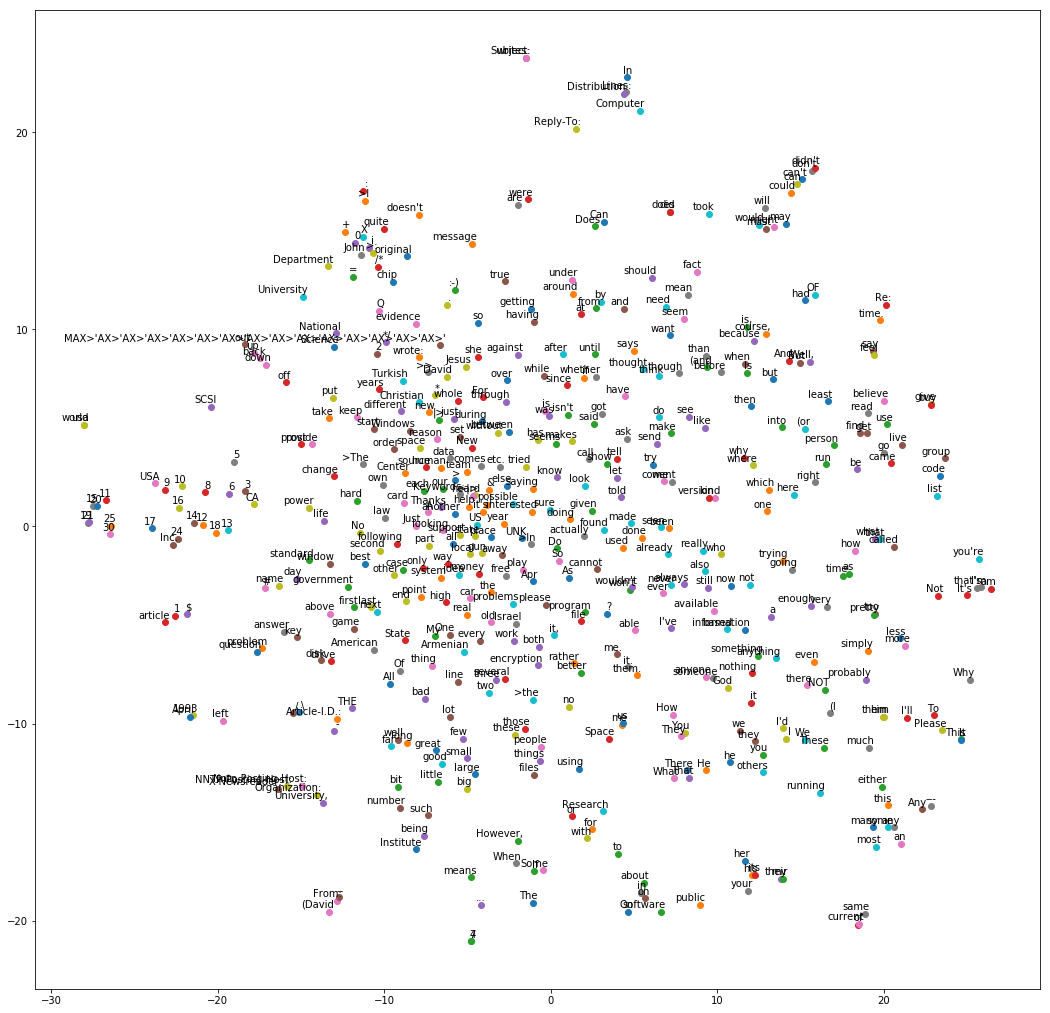

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import math
import os
import sys
import argparse
import random
from tempfile import gettempdir
import zipfile

import numpy as np
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf

from tensorflow.contrib.tensorboard.plugins import projector

from sklearn.datasets import fetch_20newsgroups

# Give a folder path as an argument with '--log_dir' to save
# TensorBoard summaries. Default is a log folder in current directory.
current_path = os.path.dirname(os.path.realpath(sys.argv[0]))

parser = argparse.ArgumentParser()
parser.add_argument(
    '--log_dir',
    type=str,
    default=os.path.join(current_path, 'log'),
    help='The log directory for TensorBoard summaries.')
FLAGS, unparsed = parser.parse_known_args()

# Create the directory for TensorBoard variables if there is not.
if not os.path.exists(FLAGS.log_dir):
  os.makedirs(FLAGS.log_dir)

# Step 1: Download the data.
url = 'http://mattmahoney.net/dc/'


# pylint: disable=redefined-outer-name
def maybe_download(filename, expected_bytes):
  """Download a file if not present, and make sure it's the right size."""
  local_filename = os.path.join(gettempdir(), filename)
  if not os.path.exists(local_filename):
    local_filename, _ = urllib.request.urlretrieve(url + filename,
                                                   local_filename)
  statinfo = os.stat(local_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', filename)
  else:
    print(statinfo.st_size)
    raise Exception('Failed to verify ' + local_filename +
                    '. Can you get to it with a browser?')
  return local_filename





# Read the data into a list of strings.
def read_data(filename):
  """Extract the first file enclosed in a zip file as a list of words."""
  with zipfile.ZipFile(filename) as f:
    data = tf.compat.as_str(f.read(f.namelist()[0])).split()
  return data

def read_20NG_data():
    text = ''
    newsgroups_train = fetch_20newsgroups(subset='train')
    count = 0
    text_list = newsgroups_train.data
    for each_text in text_list:
        count += 1
        if count % 10000 == 0:
            print(count)
        text = text + ' ' + each_text.replace('\n', ' ')
    data = text.split()
    return data

num_choice = 1
if num_choice == 1:
    vocabulary = read_20NG_data()
elif num_choice == 2:
    filename = maybe_download('text8.zip', 31344016)
    vocabulary = read_data(filename)
elif num_choice == 3:
    filename = maybe_download('medical.zip', 22277202)
 #   vocabulary = read_data(filename)
    
print('Data size', len(vocabulary))

# Step 2: Build the dictionary and replace rare words with UNK token.
vocabulary_size = 50000


def build_dataset(words, n_words):
  """Process raw inputs into a dataset."""
  count = [['UNK', -1]]
  count.extend(collections.Counter(words).most_common(n_words - 1))
  dictionary = dict()
  for word, _ in count:
    dictionary[word] = len(dictionary)
  data = list()
  unk_count = 0
  for word in words:
    index = dictionary.get(word, 0)
    if index == 0:  # dictionary['UNK']
      unk_count += 1
    data.append(index)
  count[0][1] = unk_count
  reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
  return data, count, dictionary, reversed_dictionary


# Filling 4 global variables:
# data - list of codes (integers from 0 to vocabulary_size-1).
#   This is the original text but words are replaced by their codes
# count - map of words(strings) to count of occurrences
# dictionary - map of words(strings) to their codes(integers)
# reverse_dictionary - maps codes(integers) to words(strings)
data, count, dictionary, reverse_dictionary = build_dataset(
    vocabulary, vocabulary_size)
del vocabulary  # Hint to reduce memory.
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10], [reverse_dictionary[i] for i in data[:10]])

data_index = 0


# Step 3: Function to generate a training batch for the skip-gram model.
def generate_batch(batch_size, num_skips, skip_window):
  global data_index
  assert batch_size % num_skips == 0
  assert num_skips <= 2 * skip_window
  batch = np.ndarray(shape=(batch_size), dtype=np.int32)
  labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
  span = 2 * skip_window + 1  # [ skip_window target skip_window ]
  buffer = collections.deque(maxlen=span)
  if data_index + span > len(data):
    data_index = 0
  buffer.extend(data[data_index:data_index + span])
  data_index += span
  for i in range(batch_size // num_skips):
    context_words = [w for w in range(span) if w != skip_window]
    words_to_use = random.sample(context_words, num_skips)
    for j, context_word in enumerate(words_to_use):
      batch[i * num_skips + j] = buffer[skip_window]
      labels[i * num_skips + j, 0] = buffer[context_word]
    if data_index == len(data):
      buffer.extend(data[0:span])
      data_index = span
    else:
      buffer.append(data[data_index])
      data_index += 1
  # Backtrack a little bit to avoid skipping words in the end of a batch
  data_index = (data_index + len(data) - span) % len(data)
  return batch, labels


batch, labels = generate_batch(batch_size=8, num_skips=2, skip_window=1)
for i in range(8):
  print(batch[i], reverse_dictionary[batch[i]], '->', labels[i, 0],
        reverse_dictionary[labels[i, 0]])

# Step 4: Build and train a skip-gram model.

batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1  # How many words to consider left and right.
num_skips = 2  # How many times to reuse an input to generate a label.
num_sampled = 64  # Number of negative examples to sample.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. These 3 variables are used only for
# displaying model accuracy, they don't affect calculation.
valid_size = 16  # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)

graph = tf.Graph()

with graph.as_default():

  # Input data.
  with tf.name_scope('inputs'):
    train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
    train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

  # Ops and variables pinned to the CPU because of missing GPU implementation
  with tf.device('/cpu:0'):
    # Look up embeddings for inputs.
    with tf.name_scope('embeddings'):
      embeddings = tf.Variable(
          tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
      embed = tf.nn.embedding_lookup(embeddings, train_inputs)

    # Construct the variables for the NCE loss
    with tf.name_scope('weights'):
      nce_weights = tf.Variable(
          tf.truncated_normal(
              [vocabulary_size, embedding_size],
              stddev=1.0 / math.sqrt(embedding_size)))
    with tf.name_scope('biases'):
      nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

  # Compute the average NCE loss for the batch.
  # tf.nce_loss automatically draws a new sample of the negative labels each
  # time we evaluate the loss.
  # Explanation of the meaning of NCE loss:
  #   http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
  with tf.name_scope('loss'):
    loss = tf.reduce_mean(
        tf.nn.nce_loss(
            weights=nce_weights,
            biases=nce_biases,
            labels=train_labels,
            inputs=embed,
            num_sampled=num_sampled,
            num_classes=vocabulary_size))

  # Add the loss value as a scalar to summary.
  tf.summary.scalar('loss', loss)

  # Construct the SGD optimizer using a learning rate of 1.0.
  with tf.name_scope('optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(loss)

  # Compute the cosine similarity between minibatch examples and all embeddings.
  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
  normalized_embeddings = embeddings / norm
  valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings,
                                            valid_dataset)
  similarity = tf.matmul(
      valid_embeddings, normalized_embeddings, transpose_b=True)

  # Merge all summaries.
  merged = tf.summary.merge_all()

  # Add variable initializer.
  init = tf.global_variables_initializer()

  # Create a saver.
  saver = tf.train.Saver()

# Step 5: Begin training.
num_steps = 100001

with tf.Session(graph=graph) as session:
  # Open a writer to write summaries.
  writer = tf.summary.FileWriter(FLAGS.log_dir, session.graph)

  # We must initialize all variables before we use them.
  init.run()
  print('Initialized')

  average_loss = 0
  for step in xrange(num_steps):
    batch_inputs, batch_labels = generate_batch(batch_size, num_skips,
                                                skip_window)
    feed_dict = {train_inputs: batch_inputs, train_labels: batch_labels}

    # Define metadata variable.
    run_metadata = tf.RunMetadata()

    # We perform one update step by evaluating the optimizer op (including it
    # in the list of returned values for session.run()
    # Also, evaluate the merged op to get all summaries from the returned "summary" variable.
    # Feed metadata variable to session for visualizing the graph in TensorBoard.
    _, summary, loss_val = session.run(
        [optimizer, merged, loss],
        feed_dict=feed_dict,
        run_metadata=run_metadata)
    average_loss += loss_val

    # Add returned summaries to writer in each step.
    writer.add_summary(summary, step)
    # Add metadata to visualize the graph for the last run.
    if step == (num_steps - 1):
      writer.add_run_metadata(run_metadata, 'step%d' % step)

    if step % 2000 == 0:
      if step > 0:
        average_loss /= 2000
      # The average loss is an estimate of the loss over the last 2000 batches.
      print('Average loss at step ', step, ': ', average_loss)
      average_loss = 0

#     # Note that this is expensive (~20% slowdown if computed every 500 steps)
#     if step % 10000 == 0:
#       sim = similarity.eval()
#       for i in xrange(valid_size):
#         valid_word = reverse_dictionary[valid_examples[i]]
#         top_k = 8  # number of nearest neighbors
#         nearest = (-sim[i, :]).argsort()[1:top_k + 1]
#         log_str = 'Nearest to %s:' % valid_word
#         for k in xrange(top_k):
#           close_word = reverse_dictionary[nearest[k]]
#           log_str = '%s %s,' % (log_str, close_word)
#         print(log_str)
        
  sim = similarity.eval()
  log_str = ''
    ##########??????##########
  for i in xrange(16):
    ## save out all nearest neighbour
    valid_word = reverse_dictionary[i]
    top_k = 8  # number of nearest neighbors
    nearest = (-sim[i, :]).argsort()[1:top_k + 1]
    log_str += '\nNearest to %s:' % valid_word
    for k in xrange(top_k):
        close_word = reverse_dictionary[nearest[k]]
        log_str = '%s %s,' % (log_str, close_word)
    print(log_str)
  print(type(log_str)) 
  print(type(log_str.encode('utf8')))

  with open(FLAGS.log_dir + '/distance.txt', 'w') as f:
     ##########??????##########f.write(log_str.encode('utf8'))
    f.write(log_str)
        
     
        
  final_embeddings = normalized_embeddings.eval()

  # Write corresponding labels for the embeddings.
  with open(FLAGS.log_dir + '/metadata.tsv', 'w') as f:
    for i in xrange(vocabulary_size):
      f.write(reverse_dictionary[i] + '\n')

  # Save the model for checkpoints.
  saver.save(session, os.path.join(FLAGS.log_dir, 'model.ckpt'))

  # Create a configuration for visualizing embeddings with the labels in TensorBoard.
  config = projector.ProjectorConfig()
  embedding_conf = config.embeddings.add()
  embedding_conf.tensor_name = embeddings.name
  embedding_conf.metadata_path = os.path.join(FLAGS.log_dir, 'metadata.tsv')
  projector.visualize_embeddings(writer, config)

writer.close()

# Step 6: Visualize the embeddings.


# pylint: disable=missing-docstring
# Function to draw visualization of distance between embeddings.
def plot_with_labels(low_dim_embs, labels, filename):
  assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
  plt.figure(figsize=(18, 18))  # in inches
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i, :]
    plt.scatter(x, y)
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')

  plt.savefig(filename)


try:
  # pylint: disable=g-import-not-at-top
  from sklearn.manifold import TSNE
  import matplotlib.pyplot as plt

  tsne = TSNE(
      perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
  plot_only = 500
  low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
  labels = [reverse_dictionary[i] for i in xrange(plot_only)]
  plot_with_labels(low_dim_embs, labels, os.path.join(gettempdir(), 'tsne.png'))

except ImportError as ex:
  print('Please install sklearn, matplotlib, and scipy to show embeddings.')
  print(ex)

Found and verified text8.zip
Data size 17005207
Most common words (+UNK) [['UNK', 418391], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764)]
Sample data [5234, 3081, 12, 6, 195, 2, 3134, 46, 59, 156] ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against']
3081 originated -> 12 as
3081 originated -> 5234 anarchism
12 as -> 3081 originated
12 as -> 6 a
6 a -> 195 term
6 a -> 12 as
195 term -> 2 of
195 term -> 6 a
Initialized
Average loss at step  0 :  274.588775635
Average loss at step  2000 :  114.317723963
Average loss at step  4000 :  52.2710721118
Average loss at step  6000 :  33.2628323224
Average loss at step  8000 :  23.4955239562
Average loss at step  10000 :  17.8826382924
Average loss at step  12000 :  13.8568652716
Average loss at step  14000 :  11.8200707883
Average loss at step  16000 :  9.84307959878
Average loss at step  18000 :  8.6571397357
Average loss at step  20000 :  7.98060886073
Average loss at step  22000 :  7.03

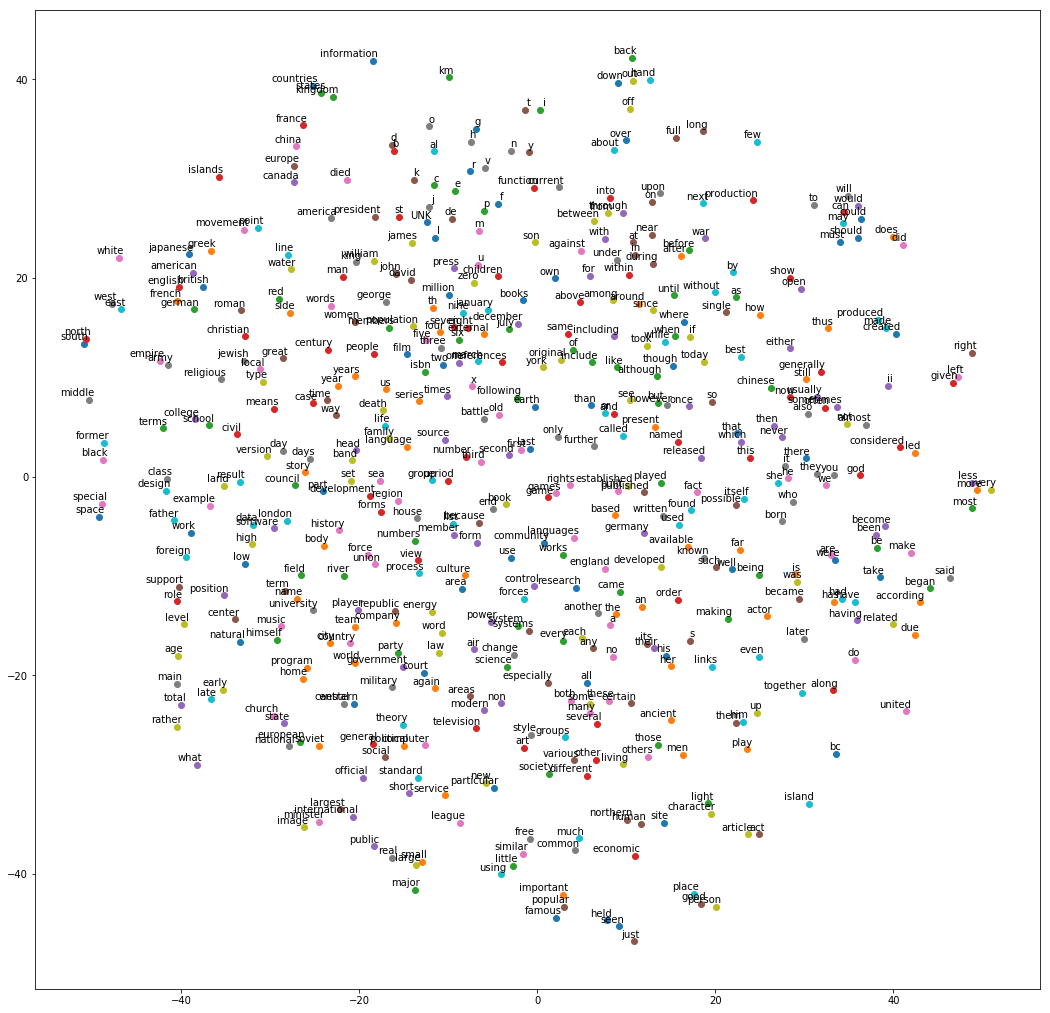

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import math
import os
import sys
import argparse
import random
from tempfile import gettempdir
import zipfile

import numpy as np
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf

from tensorflow.contrib.tensorboard.plugins import projector

from sklearn.datasets import fetch_20newsgroups

# Give a folder path as an argument with '--log_dir' to save
# TensorBoard summaries. Default is a log folder in current directory.
current_path = os.path.dirname(os.path.realpath(sys.argv[0]))

parser = argparse.ArgumentParser()
parser.add_argument(
    '--log_dir',
    type=str,
    default=os.path.join(current_path, 'log'),
    help='The log directory for TensorBoard summaries.')
FLAGS, unparsed = parser.parse_known_args()

# Create the directory for TensorBoard variables if there is not.
if not os.path.exists(FLAGS.log_dir):
  os.makedirs(FLAGS.log_dir)

# Step 1: Download the data.
url = 'http://mattmahoney.net/dc/'


# pylint: disable=redefined-outer-name
def maybe_download(filename, expected_bytes):
  """Download a file if not present, and make sure it's the right size."""
  local_filename = os.path.join(gettempdir(), filename)
  if not os.path.exists(local_filename):
    local_filename, _ = urllib.request.urlretrieve(url + filename,
                                                   local_filename)
  statinfo = os.stat(local_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', filename)
  else:
    print(statinfo.st_size)
    raise Exception('Failed to verify ' + local_filename +
                    '. Can you get to it with a browser?')
  return local_filename





# Read the data into a list of strings.
def read_data(filename):
  """Extract the first file enclosed in a zip file as a list of words."""
  with zipfile.ZipFile(filename) as f:
    data = tf.compat.as_str(f.read(f.namelist()[0])).split()
  return data

def read_20NG_data():
    text = ''
    newsgroups_train = fetch_20newsgroups(subset='train')
    count = 0
    text_list = newsgroups_train.data
    for each_text in text_list:
        count += 1
        if count % 10000 == 0:
            print(count)
        text = text + ' ' + each_text.replace('\n', ' ')
    data = text.split()
    return data

num_choice = 2
if num_choice == 1:
    vocabulary = read_20NG_data()
elif num_choice == 2:
    filename = maybe_download('text8.zip', 31344016)
    vocabulary = read_data(filename)
elif num_choice == 3:
    filename = maybe_download('medical.zip', 22277202)
 #   vocabulary = read_data(filename)
    
print('Data size', len(vocabulary))

# Step 2: Build the dictionary and replace rare words with UNK token.
vocabulary_size = 50000


def build_dataset(words, n_words):
  """Process raw inputs into a dataset."""
  count = [['UNK', -1]]
  count.extend(collections.Counter(words).most_common(n_words - 1))
  dictionary = dict()
  for word, _ in count:
    dictionary[word] = len(dictionary)
  data = list()
  unk_count = 0
  for word in words:
    index = dictionary.get(word, 0)
    if index == 0:  # dictionary['UNK']
      unk_count += 1
    data.append(index)
  count[0][1] = unk_count
  reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
  return data, count, dictionary, reversed_dictionary


# Filling 4 global variables:
# data - list of codes (integers from 0 to vocabulary_size-1).
#   This is the original text but words are replaced by their codes
# count - map of words(strings) to count of occurrences
# dictionary - map of words(strings) to their codes(integers)
# reverse_dictionary - maps codes(integers) to words(strings)
data, count, dictionary, reverse_dictionary = build_dataset(
    vocabulary, vocabulary_size)
del vocabulary  # Hint to reduce memory.
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10], [reverse_dictionary[i] for i in data[:10]])

data_index = 0


# Step 3: Function to generate a training batch for the skip-gram model.
def generate_batch(batch_size, num_skips, skip_window):
  global data_index
  assert batch_size % num_skips == 0
  assert num_skips <= 2 * skip_window
  batch = np.ndarray(shape=(batch_size), dtype=np.int32)
  labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
  span = 2 * skip_window + 1  # [ skip_window target skip_window ]
  buffer = collections.deque(maxlen=span)
  if data_index + span > len(data):
    data_index = 0
  buffer.extend(data[data_index:data_index + span])
  data_index += span
  for i in range(batch_size // num_skips):
    context_words = [w for w in range(span) if w != skip_window]
    words_to_use = random.sample(context_words, num_skips)
    for j, context_word in enumerate(words_to_use):
      batch[i * num_skips + j] = buffer[skip_window]
      labels[i * num_skips + j, 0] = buffer[context_word]
    if data_index == len(data):
      buffer.extend(data[0:span])
      data_index = span
    else:
      buffer.append(data[data_index])
      data_index += 1
  # Backtrack a little bit to avoid skipping words in the end of a batch
  data_index = (data_index + len(data) - span) % len(data)
  return batch, labels


batch, labels = generate_batch(batch_size=8, num_skips=2, skip_window=1)
for i in range(8):
  print(batch[i], reverse_dictionary[batch[i]], '->', labels[i, 0],
        reverse_dictionary[labels[i, 0]])

# Step 4: Build and train a skip-gram model.

batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1  # How many words to consider left and right.
num_skips = 2  # How many times to reuse an input to generate a label.
num_sampled = 64  # Number of negative examples to sample.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. These 3 variables are used only for
# displaying model accuracy, they don't affect calculation.
valid_size = 16  # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)

graph = tf.Graph()

with graph.as_default():

  # Input data.
  with tf.name_scope('inputs'):
    train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
    train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

  # Ops and variables pinned to the CPU because of missing GPU implementation
  with tf.device('/cpu:0'):
    # Look up embeddings for inputs.
    with tf.name_scope('embeddings'):
      embeddings = tf.Variable(
          tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
      embed = tf.nn.embedding_lookup(embeddings, train_inputs)

    # Construct the variables for the NCE loss
    with tf.name_scope('weights'):
      nce_weights = tf.Variable(
          tf.truncated_normal(
              [vocabulary_size, embedding_size],
              stddev=1.0 / math.sqrt(embedding_size)))
    with tf.name_scope('biases'):
      nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

  # Compute the average NCE loss for the batch.
  # tf.nce_loss automatically draws a new sample of the negative labels each
  # time we evaluate the loss.
  # Explanation of the meaning of NCE loss:
  #   http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
  with tf.name_scope('loss'):
    loss = tf.reduce_mean(
        tf.nn.nce_loss(
            weights=nce_weights,
            biases=nce_biases,
            labels=train_labels,
            inputs=embed,
            num_sampled=num_sampled,
            num_classes=vocabulary_size))

  # Add the loss value as a scalar to summary.
  tf.summary.scalar('loss', loss)

  # Construct the SGD optimizer using a learning rate of 1.0.
  with tf.name_scope('optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(loss)

  # Compute the cosine similarity between minibatch examples and all embeddings.
  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
  normalized_embeddings = embeddings / norm
  valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings,
                                            valid_dataset)
  similarity = tf.matmul(
      valid_embeddings, normalized_embeddings, transpose_b=True)

  # Merge all summaries.
  merged = tf.summary.merge_all()

  # Add variable initializer.
  init = tf.global_variables_initializer()

  # Create a saver.
  saver = tf.train.Saver()

# Step 5: Begin training.
num_steps = 100001

with tf.Session(graph=graph) as session:
  # Open a writer to write summaries.
  writer = tf.summary.FileWriter(FLAGS.log_dir, session.graph)

  # We must initialize all variables before we use them.
  init.run()
  print('Initialized')

  average_loss = 0
  for step in xrange(num_steps):
    batch_inputs, batch_labels = generate_batch(batch_size, num_skips,
                                                skip_window)
    feed_dict = {train_inputs: batch_inputs, train_labels: batch_labels}

    # Define metadata variable.
    run_metadata = tf.RunMetadata()

    # We perform one update step by evaluating the optimizer op (including it
    # in the list of returned values for session.run()
    # Also, evaluate the merged op to get all summaries from the returned "summary" variable.
    # Feed metadata variable to session for visualizing the graph in TensorBoard.
    _, summary, loss_val = session.run(
        [optimizer, merged, loss],
        feed_dict=feed_dict,
        run_metadata=run_metadata)
    average_loss += loss_val

    # Add returned summaries to writer in each step.
    writer.add_summary(summary, step)
    # Add metadata to visualize the graph for the last run.
    if step == (num_steps - 1):
      writer.add_run_metadata(run_metadata, 'step%d' % step)

    if step % 2000 == 0:
      if step > 0:
        average_loss /= 2000
      # The average loss is an estimate of the loss over the last 2000 batches.
      print('Average loss at step ', step, ': ', average_loss)
      average_loss = 0

#     # Note that this is expensive (~20% slowdown if computed every 500 steps)
#     if step % 10000 == 0:
#       sim = similarity.eval()
#       for i in xrange(valid_size):
#         valid_word = reverse_dictionary[valid_examples[i]]
#         top_k = 8  # number of nearest neighbors
#         nearest = (-sim[i, :]).argsort()[1:top_k + 1]
#         log_str = 'Nearest to %s:' % valid_word
#         for k in xrange(top_k):
#           close_word = reverse_dictionary[nearest[k]]
#           log_str = '%s %s,' % (log_str, close_word)
#         print(log_str)
        
  sim = similarity.eval()
  log_str = ''
    ##########??????##########
  for i in xrange(16):
    ## save out all nearest neighbour
    valid_word = reverse_dictionary[i]
    top_k = 8  # number of nearest neighbors
    nearest = (-sim[i, :]).argsort()[1:top_k + 1]
    log_str += '\nNearest to %s:' % valid_word
    for k in xrange(top_k):
        close_word = reverse_dictionary[nearest[k]]
        log_str = '%s %s,' % (log_str, close_word)
    print(log_str)
  print(type(log_str)) 
  print(type(log_str.encode('utf8')))

  with open(FLAGS.log_dir + '/distance.txt', 'w') as f:
     ##########??????##########f.write(log_str.encode('utf8'))
    f.write(log_str)
        
     
        
  final_embeddings = normalized_embeddings.eval()

  # Write corresponding labels for the embeddings.
  with open(FLAGS.log_dir + '/metadata.tsv', 'w') as f:
    for i in xrange(vocabulary_size):
      f.write(reverse_dictionary[i] + '\n')

  # Save the model for checkpoints.
  saver.save(session, os.path.join(FLAGS.log_dir, 'model.ckpt'))

  # Create a configuration for visualizing embeddings with the labels in TensorBoard.
  config = projector.ProjectorConfig()
  embedding_conf = config.embeddings.add()
  embedding_conf.tensor_name = embeddings.name
  embedding_conf.metadata_path = os.path.join(FLAGS.log_dir, 'metadata.tsv')
  projector.visualize_embeddings(writer, config)

writer.close()

# Step 6: Visualize the embeddings.


# pylint: disable=missing-docstring
# Function to draw visualization of distance between embeddings.
def plot_with_labels(low_dim_embs, labels, filename):
  assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
  plt.figure(figsize=(18, 18))  # in inches
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i, :]
    plt.scatter(x, y)
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')

  plt.savefig(filename)


try:
  # pylint: disable=g-import-not-at-top
  from sklearn.manifold import TSNE
  import matplotlib.pyplot as plt

  tsne = TSNE(
      perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
  plot_only = 500
  low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
  labels = [reverse_dictionary[i] for i in xrange(plot_only)]
  plot_with_labels(low_dim_embs, labels, os.path.join(gettempdir(), 'tsne.png'))

except ImportError as ex:
  print('Please install sklearn, matplotlib, and scipy to show embeddings.')
  print(ex)

# Problem 5 CNN

In [36]:
"""Convolutional Neural Network Estimator for MNIST, built with tf.layers."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)


def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  # Computes 32 features using a 5x5 filter with ReLU activation.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 28, 28, 1]
  # Output Tensor Shape: [batch_size, 28, 28, 32]
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  # First max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 28, 28, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 32]
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2
  # Computes 64 features using a 5x5 filter.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 14, 14, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 64]
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #2
  # Second max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 14, 14, 64]
  # Output Tensor Shape: [batch_size, 7, 7, 64]
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Flatten tensor into a batch of vectors
  # Input Tensor Shape: [batch_size, 7, 7, 64]
  # Output Tensor Shape: [batch_size, 7 * 7 * 64]
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
  

  # Dense Layer
  # Densely connected layer with 1024 neurons
  # Input Tensor Shape: [batch_size, 7 * 7 * 64]
  # Output Tensor Shape: [batch_size, 1024]
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)

    
    

  # Add dropout operation; 0.6 probability that element will be kept
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  logits = tf.layers.dense(inputs=dropout, units=10)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


def main(unused_argv):
  # Load training and eval data
  mnist = tf.contrib.learn.datasets.load_dataset("mnist")
  train_data = mnist.train.images  # Returns np.array
  train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
  eval_data = mnist.test.images  # Returns np.array
  eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

  # Create the Estimator
  mnist_classifier = tf.estimator.Estimator(
      model_fn=cnn_model_fn, model_dir="/tmp/mnist_convnet_model")

  # Set up logging for predictions
  # Log the values in the "Softmax" tensor with label "probabilities"
  tensors_to_log = {"probabilities": "softmax_tensor"}
  logging_hook = tf.train.LoggingTensorHook(
      tensors=tensors_to_log, every_n_iter=50)

  # Train the model
  train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": train_data},
      y=train_labels,
      batch_size=100,
      num_epochs=None,
      shuffle=True)
  mnist_classifier.train(
      input_fn=train_input_fn,
      steps=2000,
      hooks=[logging_hook])

  # Evaluate the model and print results
  eval_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": eval_data},
      y=eval_labels,
      num_epochs=1,
      shuffle=False)
  eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
  print(eval_results)


if __name__ == "__main__":
  tf.app.run()

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/mnist_convnet_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c16b4a240>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_repli

INFO:tensorflow:loss = 2.3032, step = 1
INFO:tensorflow:probabilities = [[ 0.09366506  0.10391304  0.09216448  0.08378567  0.12444849  0.09315971
   0.1047746   0.11522337  0.09455648  0.09430907]
 [ 0.1074438   0.08981987  0.10875966  0.08564262  0.10611182  0.10304578
   0.1039497   0.098184    0.09916975  0.09787299]
 [ 0.12091292  0.09969452  0.09508946  0.0916354   0.10377748  0.08587424
   0.09705927  0.10785452  0.09783754  0.10026465]
 [ 0.1035753   0.09781197  0.11121688  0.08580688  0.10048959  0.0902786
   0.10656409  0.10621123  0.09780166  0.10024384]
 [ 0.09943954  0.09132979  0.10445395  0.10384303  0.10267784  0.0891396
   0.10012607  0.10499626  0.09956764  0.10442628]
 [ 0.09881727  0.1008946   0.11048399  0.09470456  0.10590184  0.09729303
   0.09810372  0.10315068  0.09663441  0.09401593]
 [ 0.10200721  0.09555338  0.11042893  0.09128395  0.10937069  0.09009033
   0.09985249  0.09802871  0.10454322  0.09884111]
 [ 0.10249763  0.10658027  0.10736342  0.09010564  0.09

INFO:tensorflow:global_step/sec: 5.77547
INFO:tensorflow:probabilities = [[ 0.09904624  0.10015405  0.09694046  0.08081475  0.10709162  0.09698863
   0.10299987  0.11034975  0.10730164  0.09831297]
 [ 0.11204942  0.10521231  0.09852213  0.07977672  0.12032902  0.07995504
   0.1115085   0.1037349   0.10094252  0.0879694 ]
 [ 0.08341416  0.0923669   0.10436516  0.08467777  0.10652753  0.09638601
   0.10968412  0.09972119  0.12044488  0.10241233]
 [ 0.11154386  0.08817554  0.1110947   0.0941578   0.09032713  0.07532642
   0.105739    0.11556625  0.10373474  0.10433451]
 [ 0.08875366  0.10297853  0.11255293  0.09425393  0.10111092  0.0880454
   0.10103424  0.10497797  0.10227976  0.10401262]
 [ 0.1054484   0.09409388  0.11196039  0.08401963  0.09069408  0.09658013
   0.1010932   0.10055357  0.10379716  0.1117596 ]
 [ 0.10273443  0.09503141  0.11199599  0.08116617  0.10055208  0.0862005
   0.11074039  0.10321488  0.0973515   0.11101262]
 [ 0.0925281   0.10891832  0.11444735  0.08635587  0.1

INFO:tensorflow:loss = 2.30221, step = 101 (17.313 sec)
INFO:tensorflow:probabilities = [[ 0.09453984  0.09594126  0.10494323  0.08049267  0.10350452  0.10682579
   0.1054527   0.09984981  0.10848513  0.09996505]
 [ 0.10288297  0.09341003  0.10004307  0.09146623  0.10075081  0.09780484
   0.10814857  0.08844411  0.10156361  0.11548571]
 [ 0.09972543  0.09711034  0.10235707  0.09494051  0.10770191  0.08441255
   0.10486557  0.09178328  0.11516117  0.10194211]
 [ 0.09815171  0.1038397   0.10140065  0.08828558  0.10191504  0.09406111
   0.09903123  0.10372902  0.10596865  0.10361731]
 [ 0.10503076  0.09144499  0.09458931  0.09659731  0.10255367  0.09193959
   0.11074744  0.11133989  0.09540401  0.10035303]
 [ 0.09652627  0.09567362  0.11428497  0.09121418  0.09694675  0.09536686
   0.10245138  0.09900741  0.10446507  0.10406351]
 [ 0.11138799  0.10850177  0.09526047  0.09256137  0.09963577  0.08342297
   0.10684504  0.09760588  0.10658213  0.0981966 ]
 [ 0.09889809  0.09373555  0.10400577

INFO:tensorflow:global_step/sec: 5.36335
INFO:tensorflow:probabilities = [[ 0.10292863  0.08040665  0.10840096  0.09824936  0.09928676  0.0874926
   0.10488148  0.11211465  0.11294936  0.09328952]
 [ 0.09296141  0.10422714  0.10490042  0.09176282  0.10141555  0.08363182
   0.10619593  0.10295061  0.11285797  0.09909634]
 [ 0.10604639  0.08812056  0.10161071  0.09624287  0.10279731  0.09451372
   0.10453259  0.10434923  0.10180604  0.09998061]
 [ 0.11664322  0.08752348  0.10678092  0.10158648  0.10185074  0.08610878
   0.09457126  0.09980127  0.11205304  0.09308091]
 [ 0.11720294  0.08833738  0.10169721  0.09206907  0.11404356  0.07955147
   0.10591362  0.0975061   0.10504499  0.09863367]
 [ 0.11118703  0.09125365  0.1130465   0.10523728  0.09239582  0.08387046
   0.09965295  0.11102096  0.09603501  0.09630027]
 [ 0.09687121  0.10041641  0.10530905  0.09965064  0.0893915   0.0962114
   0.09530506  0.09914178  0.12151139  0.09619154]
 [ 0.10462651  0.09813609  0.09921161  0.09379885  0.0

INFO:tensorflow:loss = 2.25824, step = 201 (18.645 sec)
INFO:tensorflow:probabilities = [[ 0.11680619  0.08924126  0.08478078  0.08880528  0.1040693   0.08394719
   0.1074269   0.12738387  0.09486089  0.10267836]
 [ 0.11141282  0.08953578  0.11767974  0.09853773  0.10127879  0.08917189
   0.10708763  0.09879261  0.09468769  0.09181537]
 [ 0.10274477  0.09484413  0.09474099  0.08269871  0.10352764  0.09544616
   0.10213482  0.10489801  0.11278256  0.10618217]
 [ 0.08890314  0.08399392  0.0979004   0.07973269  0.10567588  0.0940579
   0.10593453  0.11140638  0.11311062  0.11928446]
 [ 0.11338856  0.08859983  0.09668176  0.09229386  0.09826098  0.08407072
   0.1129199   0.10151759  0.1030007   0.10926615]
 [ 0.12099795  0.08450616  0.10236982  0.09531368  0.09905898  0.09965396
   0.10156617  0.08829398  0.10320082  0.10503842]
 [ 0.10445452  0.09048872  0.10474512  0.0870695   0.08957618  0.08814297
   0.11042884  0.10707988  0.11907812  0.09893614]
 [ 0.10270333  0.10972379  0.09165109 

INFO:tensorflow:global_step/sec: 5.28387
INFO:tensorflow:probabilities = [[ 0.09871472  0.09694348  0.10996724  0.09297937  0.08735581  0.08978864
   0.10122423  0.10780451  0.10877573  0.10644624]
 [ 0.09872339  0.08870637  0.10633962  0.09351115  0.08532639  0.07950165
   0.09529031  0.10271525  0.14308807  0.10679782]
 [ 0.09755279  0.08726743  0.11404636  0.08950069  0.10690932  0.08393413
   0.10266908  0.10955136  0.10325309  0.10531572]
 [ 0.09397222  0.08711199  0.10301975  0.08630712  0.10253326  0.09861098
   0.10527017  0.10165465  0.10821172  0.11330813]
 [ 0.09080291  0.10119452  0.12088986  0.0948915   0.09766025  0.08406205
   0.10304052  0.10318238  0.1066163   0.09765975]
 [ 0.10975406  0.0948571   0.10328664  0.09985301  0.11364044  0.09030934
   0.09565385  0.09641121  0.10465324  0.09158104]
 [ 0.11481071  0.09371009  0.09204557  0.09589051  0.09469704  0.09522481
   0.11408944  0.09984892  0.10432778  0.0953551 ]
 [ 0.10423461  0.09561979  0.10680309  0.09234425  0

INFO:tensorflow:loss = 2.25899, step = 301 (18.926 sec)
INFO:tensorflow:probabilities = [[ 0.11120502  0.08259561  0.10175173  0.08196644  0.09583893  0.09799206
   0.09525353  0.11611123  0.1130807   0.10420472]
 [ 0.12603506  0.08487067  0.11457497  0.08574437  0.09643146  0.09070715
   0.10527771  0.09761211  0.1109402   0.08780628]
 [ 0.09522313  0.10196964  0.10874896  0.10645916  0.08559394  0.08810341
   0.09596521  0.09537435  0.12404489  0.09851732]
 [ 0.11132245  0.08975708  0.11608669  0.09449872  0.09377502  0.07516894
   0.09494306  0.11415713  0.10352624  0.10676459]
 [ 0.10470205  0.0933217   0.10717582  0.09847199  0.10418296  0.0928454
   0.09673663  0.10846051  0.09716845  0.09693448]
 [ 0.11487159  0.08784091  0.10323557  0.09544914  0.10199766  0.08640182
   0.08916203  0.10226146  0.12070191  0.0980779 ]
 [ 0.10395423  0.09204938  0.10072322  0.1055553   0.10036249  0.08209354
   0.10052754  0.10497062  0.1094597   0.10030397]
 [ 0.10892496  0.1018339   0.10150766 

INFO:tensorflow:global_step/sec: 5.35893
INFO:tensorflow:probabilities = [[ 0.10487375  0.08833399  0.10745807  0.09849809  0.10567244  0.09084804
   0.10854717  0.10504106  0.10424179  0.08648556]
 [ 0.09298746  0.08534438  0.11692546  0.10642441  0.09549385  0.09241148
   0.10265141  0.09720272  0.10809519  0.10246364]
 [ 0.10841165  0.09819296  0.11574321  0.09922417  0.08949873  0.09047456
   0.1012383   0.08462793  0.11207917  0.10050929]
 [ 0.10381263  0.07698108  0.11594133  0.09444709  0.11988556  0.0960403
   0.10661186  0.10433773  0.09110079  0.09084164]
 [ 0.100646    0.08707044  0.11741744  0.10382406  0.10091298  0.08679101
   0.10469841  0.09377274  0.10254226  0.10232467]
 [ 0.11737175  0.09150373  0.10118895  0.09923276  0.09840751  0.08006472
   0.09836971  0.09115057  0.10275152  0.11995878]
 [ 0.10620297  0.08790117  0.10327308  0.0876476   0.10319599  0.09147769
   0.1068628   0.10597781  0.10855514  0.09890577]
 [ 0.11786985  0.07782767  0.11737595  0.10667325  0.

INFO:tensorflow:loss = 2.23998, step = 401 (18.660 sec)
INFO:tensorflow:probabilities = [[ 0.09612576  0.08741346  0.10311951  0.09062592  0.0909351   0.09760692
   0.10686211  0.09973957  0.11499342  0.1125783 ]
 [ 0.1057365   0.08557639  0.09895118  0.12441479  0.08358404  0.07941273
   0.10101677  0.10491163  0.12175409  0.0946419 ]
 [ 0.10171857  0.08728994  0.11195912  0.09893844  0.10577458  0.08087654
   0.09196384  0.1067052   0.10670808  0.10806563]
 [ 0.11952078  0.09238783  0.09152264  0.08949843  0.08494293  0.09680842
   0.09343374  0.09439285  0.13108577  0.10640672]
 [ 0.11796708  0.08651803  0.10383227  0.11552694  0.09111134  0.08809039
   0.09070422  0.10516894  0.11508134  0.08599947]
 [ 0.11715464  0.07810388  0.10718054  0.0895199   0.10311373  0.07607657
   0.09711651  0.10944     0.12358724  0.09870704]
 [ 0.1224499   0.08438216  0.10707977  0.1071068   0.09376235  0.09334246
   0.10825441  0.09360541  0.10689294  0.08312389]
 [ 0.13239765  0.07708542  0.10686067

INFO:tensorflow:global_step/sec: 5.45626
INFO:tensorflow:probabilities = [[ 0.09973861  0.08920173  0.09101561  0.09002082  0.11064365  0.08877709
   0.10076735  0.10900918  0.10993221  0.11089382]
 [ 0.09949927  0.10222691  0.1038047   0.08464521  0.09403446  0.10096372
   0.10941402  0.09528477  0.10888554  0.10124149]
 [ 0.09958169  0.09278368  0.09201606  0.09503712  0.1101561   0.08649383
   0.09774574  0.11272915  0.11104991  0.10240669]
 [ 0.09813757  0.10855398  0.11226121  0.09551733  0.09080602  0.09159727
   0.10019078  0.09966488  0.10152897  0.10174188]
 [ 0.11197649  0.07173585  0.09966842  0.09846944  0.11917492  0.08303824
   0.09815492  0.09672777  0.09978084  0.12127308]
 [ 0.10617217  0.08609498  0.1190871   0.09132709  0.10270904  0.09578103
   0.10878044  0.09600585  0.09450901  0.09953321]
 [ 0.10856994  0.08765633  0.09262427  0.11368658  0.09034897  0.08178768
   0.10205132  0.1047221   0.11766485  0.10088796]
 [ 0.09105987  0.08920164  0.09565569  0.07548506  0

INFO:tensorflow:loss = 2.2341, step = 501 (18.328 sec)
INFO:tensorflow:probabilities = [[ 0.11138097  0.08555935  0.08780381  0.08749512  0.09847233  0.08152331
   0.09507781  0.12202913  0.12191236  0.10874584]
 [ 0.11029053  0.09277092  0.09267981  0.0876639   0.1029047   0.08476863
   0.11975189  0.09241948  0.11141188  0.10533822]
 [ 0.08898313  0.09678522  0.0994314   0.08794977  0.09533775  0.08762597
   0.10490062  0.1116896   0.11484958  0.11244689]
 [ 0.10187401  0.09009138  0.12438587  0.10084949  0.10648504  0.07821938
   0.09689698  0.09204727  0.11481927  0.09433126]
 [ 0.10174387  0.0976533   0.09043398  0.087656    0.10615421  0.091474
   0.11238153  0.10108769  0.10562821  0.10578719]
 [ 0.127689    0.09719106  0.10028347  0.11014456  0.10112291  0.10121227
   0.08140463  0.08176046  0.10462141  0.09457019]
 [ 0.11843679  0.07437118  0.12989406  0.08849069  0.09089289  0.08262729
   0.11215301  0.09473545  0.10042758  0.10797105]
 [ 0.10595751  0.08687913  0.10010904  0

INFO:tensorflow:global_step/sec: 5.62163
INFO:tensorflow:probabilities = [[ 0.11761081  0.07537103  0.11173162  0.12042879  0.09570469  0.08205993
   0.11070483  0.08452591  0.09050393  0.11135843]
 [ 0.09085158  0.0811341   0.10658073  0.1026797   0.07650951  0.09313533
   0.11585104  0.10386558  0.12723948  0.10215303]
 [ 0.1110261   0.07369981  0.13728963  0.0960771   0.09689811  0.08115052
   0.11078665  0.1110343   0.09121846  0.09081937]
 [ 0.11422578  0.09856734  0.09008892  0.08658861  0.09551805  0.09590299
   0.12355293  0.09445159  0.11639795  0.08470593]
 [ 0.10418883  0.09073754  0.10209944  0.08594134  0.09142013  0.10717422
   0.10832483  0.10124044  0.10975362  0.09911966]
 [ 0.10648383  0.09282405  0.0949996   0.09843253  0.08466496  0.09768973
   0.09712451  0.09602866  0.12269701  0.10905521]
 [ 0.09572031  0.0939307   0.0920736   0.10549824  0.08285774  0.0927824
   0.11155342  0.1012583   0.11702505  0.10730017]
 [ 0.12273078  0.08549935  0.11701966  0.11851273  0.

INFO:tensorflow:loss = 2.18537, step = 601 (17.789 sec)
INFO:tensorflow:probabilities = [[ 0.10997652  0.07295312  0.11042752  0.088003    0.10081603  0.08834149
   0.09657949  0.1330864   0.10109444  0.098722  ]
 [ 0.10507827  0.0740326   0.09626599  0.10452749  0.10501024  0.0814914
   0.088363    0.1203789   0.1056249   0.11922732]
 [ 0.10876193  0.07170229  0.10648733  0.104061    0.10775651  0.08188172
   0.09810319  0.09139299  0.11066811  0.11918496]
 [ 0.10271458  0.10525174  0.10668847  0.08621562  0.09221072  0.07831722
   0.10490535  0.11425051  0.11282823  0.09661756]
 [ 0.09731931  0.08275392  0.10204583  0.07824855  0.1216483   0.08337013
   0.094666    0.11967937  0.10891763  0.11135103]
 [ 0.09114761  0.09519058  0.0936785   0.07694342  0.10554305  0.09648889
   0.10768287  0.09923843  0.12874156  0.10534505]
 [ 0.10234522  0.07765412  0.10121322  0.10169311  0.0999134   0.07191554
   0.09693217  0.0945218   0.13020135  0.12361004]
 [ 0.1190232   0.07469139  0.10577138 

INFO:tensorflow:global_step/sec: 5.62048
INFO:tensorflow:probabilities = [[ 0.10521711  0.07719068  0.10394876  0.10524526  0.11393098  0.07971717
   0.10877114  0.08357021  0.09114932  0.13125946]
 [ 0.09482696  0.07614457  0.10317002  0.09773917  0.09308463  0.09502142
   0.07579542  0.12730044  0.13684702  0.10007036]
 [ 0.0956644   0.07108338  0.1398347   0.10649281  0.08134621  0.08830608
   0.10511893  0.11305508  0.09817516  0.10092321]
 [ 0.10283515  0.07681333  0.10425151  0.11151413  0.09502991  0.09213345
   0.10921082  0.08576559  0.1158431   0.10660301]
 [ 0.09720204  0.09166895  0.11185277  0.09498394  0.10523961  0.09126891
   0.11408205  0.10193945  0.09184717  0.09991516]
 [ 0.120721    0.06059047  0.13226765  0.12555675  0.08714212  0.07311742
   0.08945986  0.11308852  0.11491451  0.08314166]
 [ 0.09558889  0.10910293  0.08718836  0.09173968  0.10361747  0.09994929
   0.09853753  0.10116341  0.11842384  0.09468856]
 [ 0.09021243  0.09024744  0.10135968  0.08316712  0

INFO:tensorflow:loss = 2.13347, step = 701 (17.801 sec)
INFO:tensorflow:probabilities = [[ 0.12508772  0.06979915  0.11807082  0.12621722  0.08440671  0.08105551
   0.11073647  0.09774348  0.08515432  0.1017286 ]
 [ 0.11998308  0.07701897  0.10782441  0.08690173  0.10202808  0.08533265
   0.10105462  0.10904039  0.10763002  0.10318594]
 [ 0.11915069  0.07283646  0.08719675  0.09312922  0.09877753  0.10054017
   0.08831829  0.13279358  0.101721    0.10553627]
 [ 0.10662272  0.07014243  0.12163795  0.11258896  0.07990508  0.0782114
   0.10091925  0.10505046  0.12864083  0.09628096]
 [ 0.13581909  0.07655527  0.10147253  0.10856348  0.10805488  0.09953218
   0.08704732  0.08369303  0.1046827   0.09457953]
 [ 0.11925696  0.06882374  0.0992391   0.1009713   0.10127964  0.08919019
   0.11559244  0.08418369  0.093993    0.12746996]
 [ 0.09668164  0.11121735  0.11059785  0.10281131  0.10436148  0.08260095
   0.0878468   0.09495661  0.12861328  0.08031262]
 [ 0.13940507  0.06949522  0.08323854 

INFO:tensorflow:global_step/sec: 5.51992
INFO:tensorflow:probabilities = [[ 0.11522102  0.06792005  0.11261756  0.1034517   0.09208659  0.07723162
   0.10764065  0.10350301  0.10492843  0.11539939]
 [ 0.10080721  0.0764175   0.13926239  0.11563554  0.09835308  0.08165994
   0.10395295  0.10048802  0.09700705  0.08641627]
 [ 0.15441614  0.06225977  0.13623936  0.10234007  0.09143933  0.08136695
   0.09313693  0.10184384  0.10599271  0.07096493]
 [ 0.09577282  0.06648753  0.10929643  0.10928142  0.08580788  0.10407235
   0.12780449  0.09183411  0.11016571  0.09947731]
 [ 0.13688903  0.07140825  0.09409467  0.1575893   0.09029526  0.07533301
   0.09553201  0.09275509  0.0997985   0.08630493]
 [ 0.12390172  0.06938478  0.09851827  0.09409405  0.09796981  0.09389886
   0.08809292  0.1081086   0.11772439  0.10830665]
 [ 0.09653552  0.12690479  0.1030963   0.08297087  0.10074501  0.09057752
   0.09047179  0.10704225  0.10987197  0.09178407]
 [ 0.1200546   0.08487092  0.06511661  0.07622066  0

INFO:tensorflow:loss = 2.12759, step = 801 (18.109 sec)
INFO:tensorflow:probabilities = [[ 0.11697388  0.06485502  0.12362079  0.11996185  0.0781679   0.08574655
   0.10328241  0.11243054  0.09321853  0.10174255]
 [ 0.12570895  0.07426017  0.08611144  0.11071218  0.07144667  0.09841033
   0.12045654  0.10290503  0.11392293  0.09606566]
 [ 0.09338974  0.07149088  0.10141296  0.09429873  0.12646008  0.05915197
   0.09715679  0.11938517  0.11048396  0.12676969]
 [ 0.12322792  0.08662571  0.08636732  0.09015016  0.09918108  0.09094423
   0.08154085  0.1125707   0.12887114  0.10052096]
 [ 0.08889303  0.10560226  0.09946721  0.10195625  0.08041877  0.08326847
   0.11052614  0.09921013  0.1204921   0.11016562]
 [ 0.10960159  0.09665102  0.10382296  0.10850672  0.08179806  0.09632538
   0.1111542   0.09478644  0.10138573  0.09596791]
 [ 0.09966766  0.11182866  0.10352021  0.0833325   0.09144891  0.09453618
   0.10056955  0.10050368  0.11585171  0.09874088]
 [ 0.09557426  0.10373486  0.1017709 

INFO:tensorflow:global_step/sec: 5.19511
INFO:tensorflow:probabilities = [[ 0.11733178  0.09475072  0.11473987  0.1247922   0.0761584   0.07245429
   0.14513823  0.0551979   0.10452091  0.09491573]
 [ 0.09109451  0.10062684  0.11633828  0.10089676  0.0892352   0.08140199
   0.1117891   0.10357508  0.10661837  0.09842387]
 [ 0.07787261  0.08461306  0.09553315  0.09603146  0.10072879  0.0938483
   0.09281681  0.10797834  0.13306209  0.11751536]
 [ 0.09234656  0.10713508  0.09128901  0.12125438  0.07874276  0.08786144
   0.07754691  0.09891791  0.13584608  0.10905987]
 [ 0.07853895  0.11331808  0.10357849  0.08991519  0.0962621   0.07797709
   0.09090283  0.09977241  0.12811697  0.12161792]
 [ 0.10705993  0.0801324   0.11429959  0.11189281  0.08837958  0.07464322
   0.15029638  0.07374976  0.0897313   0.1098151 ]
 [ 0.14222229  0.06529898  0.11415521  0.14976749  0.09649919  0.08837536
   0.08920918  0.08008556  0.08702891  0.08735781]
 [ 0.10639194  0.05956002  0.09403205  0.09700689  0.

INFO:tensorflow:loss = 2.07685, step = 901 (19.249 sec)
INFO:tensorflow:probabilities = [[ 0.11948842  0.07585297  0.12991917  0.0953674   0.11715059  0.08982955
   0.09803405  0.07786073  0.09429463  0.10220252]
 [ 0.08604506  0.07459693  0.13695911  0.11865563  0.09043461  0.07126651
   0.1008558   0.08456593  0.13645309  0.10016733]
 [ 0.10951696  0.11199774  0.08750269  0.10004216  0.08399021  0.08866584
   0.10198198  0.09859906  0.12300235  0.09470093]
 [ 0.11100306  0.07228189  0.11141489  0.1216928   0.10938657  0.09824613
   0.10017554  0.09941009  0.08512986  0.09125911]
 [ 0.08282003  0.13293588  0.09333822  0.08725494  0.08785175  0.11114485
   0.10584321  0.09283135  0.09856534  0.10741448]
 [ 0.1116109   0.08955319  0.10754972  0.12110388  0.09073387  0.06873974
   0.09840637  0.08778267  0.13176908  0.09275052]
 [ 0.09605955  0.07738207  0.10642504  0.09848326  0.09535062  0.07787365
   0.11400846  0.10119566  0.13261712  0.10060453]
 [ 0.1175703   0.07920842  0.09641035

INFO:tensorflow:global_step/sec: 5.56953
INFO:tensorflow:probabilities = [[ 0.11080787  0.07203773  0.08551718  0.11534995  0.08369946  0.07913134
   0.16311432  0.08320554  0.10077912  0.10635751]
 [ 0.10586967  0.08900521  0.08061665  0.07080751  0.08596458  0.10897069
   0.10388032  0.12961493  0.1183611   0.10690927]
 [ 0.06424059  0.10594452  0.10008417  0.0804735   0.11035855  0.06766436
   0.13021332  0.09411371  0.14117725  0.10573004]
 [ 0.10559159  0.08793026  0.08359131  0.12527089  0.08375698  0.08324973
   0.08481116  0.10891379  0.14368318  0.09320104]
 [ 0.18268417  0.04495566  0.10391055  0.12718846  0.09416074  0.07013641
   0.11973052  0.07659905  0.1103072   0.07032732]
 [ 0.10602077  0.12753846  0.10120866  0.08128639  0.10506841  0.08606779
   0.09297414  0.07755624  0.13753897  0.08474024]
 [ 0.11430275  0.09186186  0.09897808  0.08848112  0.07497942  0.07722649
   0.09819236  0.12234761  0.14581968  0.08781058]
 [ 0.26837566  0.05374112  0.07590218  0.0796189   0

INFO:tensorflow:loss = 2.03482, step = 1001 (17.954 sec)
INFO:tensorflow:probabilities = [[ 0.09501199  0.07036109  0.08784995  0.105562    0.10661834  0.06182205
   0.10477202  0.16077919  0.11563485  0.09158848]
 [ 0.11286311  0.05635693  0.11655908  0.15435196  0.08410311  0.07142521
   0.09986619  0.11567961  0.09308459  0.0957102 ]
 [ 0.1033099   0.07499012  0.13693529  0.20192316  0.06742389  0.06994796
   0.0927879   0.07251777  0.11416469  0.06599935]
 [ 0.08817487  0.06383224  0.08177789  0.20938694  0.09291493  0.07341322
   0.1029113   0.07829495  0.11767005  0.09162363]
 [ 0.06003568  0.08168821  0.10402562  0.09656476  0.09821131  0.0821579
   0.10380806  0.11469634  0.14237937  0.11643275]
 [ 0.07592175  0.11679648  0.11466277  0.09497845  0.11002801  0.08689152
   0.12738377  0.08276857  0.1084286   0.08214012]
 [ 0.12560934  0.05576932  0.08425514  0.13799679  0.08495854  0.10513705
   0.10949173  0.06716014  0.13643272  0.09318912]
 [ 0.13668662  0.06309059  0.11320022

INFO:tensorflow:global_step/sec: 5.37439
INFO:tensorflow:probabilities = [[ 0.10084701  0.05442139  0.04760266  0.08729371  0.07324908  0.0754761
   0.06091938  0.12486195  0.28132617  0.09400257]
 [ 0.10274412  0.07720599  0.11259611  0.09515765  0.08996178  0.0920082
   0.14863496  0.08503439  0.10673273  0.08992404]
 [ 0.08854289  0.06675225  0.09470415  0.07002069  0.11647265  0.06934869
   0.10274398  0.15486579  0.10065211  0.13589671]
 [ 0.09755551  0.0777131   0.11715873  0.12736183  0.07548149  0.0788904
   0.14028741  0.09973637  0.10071351  0.08510168]
 [ 0.07972208  0.11310174  0.11810517  0.11222265  0.08489869  0.09532112
   0.08909176  0.10342312  0.11475273  0.08936086]
 [ 0.10284826  0.0656715   0.06935855  0.05158034  0.11107485  0.10082743
   0.07052568  0.14137483  0.13361041  0.15312816]
 [ 0.11895977  0.09759442  0.1036382   0.11274444  0.08159269  0.09955518
   0.09540397  0.08330602  0.11795267  0.08925266]
 [ 0.18442291  0.06271043  0.07334285  0.13654131  0.07

INFO:tensorflow:loss = 1.96399, step = 1101 (18.607 sec)
INFO:tensorflow:probabilities = [[ 0.07668278  0.11815246  0.12118907  0.09242897  0.10799405  0.10257003
   0.07615739  0.10517005  0.11522918  0.08442593]
 [ 0.08445091  0.0978207   0.09840982  0.0936011   0.10822964  0.07975055
   0.07458154  0.07498739  0.1985549   0.08961345]
 [ 0.27968913  0.03367406  0.13250938  0.10938279  0.06520916  0.08596238
   0.08905369  0.05614216  0.07411774  0.07425948]
 [ 0.10107018  0.09392942  0.13865924  0.10547674  0.10051294  0.09161618
   0.09778282  0.08098271  0.1050991   0.08487064]
 [ 0.08057917  0.09599917  0.12685129  0.12216035  0.05957828  0.08048932
   0.15242514  0.07564279  0.11109592  0.09517861]
 [ 0.14752884  0.04185783  0.09990429  0.09418657  0.1032599   0.07564877
   0.14523438  0.06924279  0.08012871  0.14300792]
 [ 0.14262006  0.06892205  0.10319231  0.1263683   0.10676187  0.08149348
   0.10949436  0.07585049  0.08083306  0.10446396]
 [ 0.10433538  0.11157921  0.0911537

INFO:tensorflow:global_step/sec: 5.22737
INFO:tensorflow:probabilities = [[ 0.08141087  0.08684643  0.09982646  0.12996989  0.07333972  0.11953129
   0.10005829  0.07381569  0.15090558  0.08429578]
 [ 0.20321636  0.03629887  0.05154147  0.12341125  0.08929437  0.11687583
   0.09980206  0.0813738   0.09812494  0.100061  ]
 [ 0.12094451  0.06136486  0.05966814  0.0803548   0.11825269  0.06755488
   0.07049456  0.18305072  0.1281607   0.11015414]
 [ 0.08350337  0.11486108  0.10579961  0.08002743  0.08965673  0.11211358
   0.06435731  0.09313221  0.1811974   0.07535123]
 [ 0.11798736  0.04338746  0.08837568  0.15558381  0.05224878  0.17383546
   0.12221836  0.05907562  0.11166098  0.07562655]
 [ 0.06231373  0.12764598  0.1052944   0.08397795  0.07866129  0.07630121
   0.12889397  0.11876787  0.11303914  0.10510443]
 [ 0.06875436  0.2023254   0.09886023  0.08957253  0.09063574  0.0747148
   0.07850834  0.1052915   0.09447642  0.09686068]
 [ 0.07691146  0.07285577  0.09013768  0.07081255  0.

INFO:tensorflow:loss = 1.83673, step = 1201 (19.132 sec)
INFO:tensorflow:probabilities = [[ 0.42929474  0.02838391  0.079827    0.04738745  0.08283502  0.08673421
   0.06067755  0.0624125   0.06619807  0.05624952]
 [ 0.05278267  0.23633254  0.08600014  0.07124562  0.07695954  0.09797895
   0.0653765   0.10646588  0.10315746  0.10370085]
 [ 0.08131651  0.05965244  0.10890972  0.14254577  0.08570053  0.09592196
   0.16057682  0.04948984  0.16051967  0.05536674]
 [ 0.06878951  0.08369935  0.08028079  0.06872413  0.1655149   0.05947917
   0.10055789  0.09670137  0.15697439  0.11927852]
 [ 0.13311821  0.07840093  0.12024389  0.19220464  0.05524429  0.09687465
   0.09432152  0.09163186  0.08991753  0.04804251]
 [ 0.06873425  0.02799123  0.09070151  0.09726718  0.14365663  0.0549363
   0.1743267   0.0903439   0.12534223  0.12670007]
 [ 0.06076126  0.05399771  0.10136034  0.100417    0.10931986  0.07754613
   0.10032538  0.14698419  0.13305555  0.11623264]
 [ 0.05695062  0.03476914  0.14252384

INFO:tensorflow:global_step/sec: 5.30048
INFO:tensorflow:probabilities = [[ 0.13517371  0.03695892  0.07759006  0.07658205  0.12902069  0.09100819
   0.08284251  0.12849553  0.08600907  0.1563192 ]
 [ 0.15392773  0.06251208  0.09595198  0.13594928  0.08436126  0.10316723
   0.13032897  0.0659948   0.09563445  0.07217221]
 [ 0.27590311  0.05809179  0.17186718  0.06960296  0.08787619  0.06931427
   0.09310583  0.04402063  0.08940539  0.04081267]
 [ 0.08287136  0.14108989  0.13241041  0.07836312  0.06916956  0.10017724
   0.14971958  0.05463739  0.09650335  0.09505808]
 [ 0.06707425  0.06888888  0.06096269  0.09446315  0.09898419  0.05126697
   0.04753232  0.20039426  0.13396971  0.17646359]
 [ 0.22801828  0.01873502  0.28303826  0.13907573  0.03402057  0.05685376
   0.03193545  0.06104013  0.0920069   0.05527588]
 [ 0.54788768  0.01354868  0.06610998  0.06545703  0.05628666  0.03625809
   0.03175545  0.05875383  0.03932165  0.08462091]
 [ 0.09046038  0.09576047  0.05130893  0.04977376  0

INFO:tensorflow:loss = 1.71133, step = 1301 (18.865 sec)
INFO:tensorflow:probabilities = [[ 0.06379934  0.08193124  0.05265134  0.12362511  0.05155531  0.08754471
   0.1057847   0.08889148  0.27083939  0.07337727]
 [ 0.0599059   0.09883823  0.07521488  0.04624504  0.10184047  0.1044839
   0.03973459  0.14160055  0.1940801   0.13805637]
 [ 0.04115206  0.04625045  0.08834549  0.17942394  0.05344513  0.08545759
   0.14087543  0.11969553  0.09573884  0.14961557]
 [ 0.14973183  0.03767304  0.08546224  0.10122991  0.05001262  0.11951221
   0.07151581  0.10643524  0.21450111  0.06392601]
 [ 0.29456857  0.01076788  0.12068999  0.05188648  0.08505685  0.0633935
   0.15860569  0.05080118  0.05253655  0.11169335]
 [ 0.03699193  0.07857478  0.0830218   0.0984231   0.07251503  0.0692032
   0.0769024   0.17191447  0.16888718  0.1435661 ]
 [ 0.1253043   0.08142791  0.10671932  0.07118741  0.12314805  0.06643083
   0.14694622  0.05689894  0.06696682  0.15497026]
 [ 0.10593605  0.08555545  0.05844272  

INFO:tensorflow:global_step/sec: 5.03993
INFO:tensorflow:probabilities = [[ 0.09644244  0.01597741  0.15177996  0.12641901  0.09642917  0.09189834
   0.18934162  0.07611684  0.06682135  0.08877384]
 [ 0.03977387  0.10808393  0.08976351  0.11661592  0.08730581  0.10612266
   0.05881576  0.15511844  0.12824221  0.11015788]
 [ 0.11962225  0.07279998  0.07941274  0.09041752  0.06157915  0.12939347
   0.07683559  0.19921805  0.11821888  0.05250231]
 [ 0.04487551  0.13515396  0.08352251  0.11510272  0.11107942  0.04923094
   0.13961087  0.05205942  0.16718562  0.10217901]
 [ 0.03904564  0.35360482  0.07499066  0.06469598  0.06753039  0.08218379
   0.09661557  0.04552528  0.0926131   0.0831948 ]
 [ 0.06718239  0.11192435  0.16498154  0.08826401  0.05073798  0.10047928
   0.20312288  0.04100816  0.11832668  0.05397268]
 [ 0.02206152  0.07176324  0.04049513  0.06091813  0.06892198  0.0885284
   0.01956333  0.3852765   0.12503897  0.11743277]
 [ 0.24943163  0.02473296  0.08109057  0.07365491  0.

INFO:tensorflow:loss = 1.62834, step = 1401 (19.850 sec)
INFO:tensorflow:probabilities = [[ 0.07736098  0.02633141  0.11487129  0.06496608  0.09645486  0.12695415
   0.23524518  0.05031502  0.06983795  0.1376631 ]
 [ 0.13690808  0.02495279  0.12222053  0.09984692  0.14941365  0.04599062
   0.18545134  0.07355234  0.03918526  0.12247846]
 [ 0.01612822  0.42388487  0.06877497  0.07065605  0.0725489   0.04317262
   0.09780801  0.05974162  0.06359359  0.08369108]
 [ 0.02841967  0.02044685  0.05670135  0.37271035  0.05475129  0.04948427
   0.11513791  0.08764783  0.08224187  0.13245855]
 [ 0.03021706  0.13472214  0.08355406  0.05747418  0.17947775  0.0820986
   0.06042469  0.06405494  0.10845542  0.19952106]
 [ 0.01282218  0.46749595  0.09406167  0.06291232  0.02861638  0.03976973
   0.04885275  0.04454016  0.12221735  0.07871152]
 [ 0.03264128  0.22463727  0.07630776  0.11575338  0.0644785   0.0575542
   0.10919552  0.11434918  0.09864408  0.10643876]
 [ 0.54515105  0.00536102  0.16223119 

INFO:tensorflow:global_step/sec: 5.10149
INFO:tensorflow:probabilities = [[ 0.07142951  0.01917697  0.08899522  0.06599213  0.10315995  0.04991278
   0.33373663  0.02222594  0.11651744  0.12885332]
 [ 0.04357665  0.01886774  0.05487045  0.17199063  0.10849585  0.12355119
   0.06602729  0.1650781   0.10092022  0.14662191]
 [ 0.0487133   0.00780514  0.03969847  0.07899886  0.06440593  0.01683219
   0.02961779  0.5219183   0.09261365  0.09939636]
 [ 0.66363013  0.0113369   0.03412173  0.03669572  0.07147404  0.04648778
   0.05029931  0.02001082  0.04504059  0.020903  ]
 [ 0.0323941   0.06880393  0.08450503  0.18980165  0.06434044  0.0958242
   0.08383757  0.16160324  0.08957065  0.12931922]
 [ 0.26188281  0.0192494   0.05845911  0.05451435  0.0716882   0.21814309
   0.21854307  0.01766536  0.05201627  0.02783841]
 [ 0.1143452   0.02462696  0.41646236  0.06001674  0.10709425  0.06132652
   0.06780475  0.02689758  0.06607658  0.05534907]
 [ 0.18716633  0.0893655   0.08375418  0.11100948  0.

INFO:tensorflow:loss = 1.40897, step = 1501 (19.596 sec)
INFO:tensorflow:probabilities = [[ 0.03891421  0.08556197  0.1032619   0.33218306  0.03224447  0.09041609
   0.06428719  0.03666924  0.14645122  0.07001075]
 [ 0.05870063  0.35055679  0.06829035  0.06959484  0.03085309  0.11558246
   0.0791673   0.0266206   0.16594025  0.0346938 ]
 [ 0.02313957  0.5542351   0.07224896  0.06046697  0.03531764  0.0343993
   0.02545128  0.06067187  0.08978838  0.04428091]
 [ 0.02531597  0.24077213  0.15039189  0.0854483   0.09336471  0.04515717
   0.20034522  0.03813982  0.08493569  0.03612901]
 [ 0.12756363  0.07663622  0.04059516  0.1298366   0.1124147   0.22384284
   0.06627414  0.04260222  0.10731511  0.07291941]
 [ 0.06146114  0.08755245  0.03604897  0.0433348   0.13784127  0.10525805
   0.10421443  0.08638317  0.15681627  0.18108955]
 [ 0.49345759  0.00580097  0.05201321  0.05692367  0.07600047  0.1515936
   0.0476743   0.06752048  0.01447004  0.03454569]
 [ 0.01639142  0.3120929   0.07269238 

INFO:tensorflow:global_step/sec: 5.15634
INFO:tensorflow:probabilities = [[ 0.04436069  0.11185117  0.10743728  0.11935706  0.02493827  0.10189038
   0.04774653  0.08035257  0.31784996  0.04421607]
 [ 0.02810655  0.02234044  0.13059051  0.19089842  0.08321163  0.18057111
   0.11707713  0.03858469  0.13070723  0.07791228]
 [ 0.05232568  0.01555566  0.08152777  0.01104794  0.30118668  0.07033828
   0.13170573  0.17935745  0.06827545  0.0886794 ]
 [ 0.25722623  0.00558084  0.13475187  0.04478999  0.14145906  0.03085318
   0.20257178  0.09845169  0.03735306  0.04696234]
 [ 0.07228264  0.05244599  0.03696588  0.25253338  0.08932362  0.15321384
   0.01648272  0.11431487  0.1015357   0.11090133]
 [ 0.01593514  0.12256671  0.05442178  0.02836863  0.02294112  0.09301899
   0.01190167  0.06148425  0.56160623  0.02775557]
 [ 0.01084102  0.0558359   0.46902138  0.13974817  0.00713272  0.04140909
   0.17879193  0.01146163  0.0731883   0.01256981]
 [ 0.00949933  0.30993232  0.07219846  0.08188267  0

INFO:tensorflow:loss = 1.23444, step = 1601 (19.394 sec)
INFO:tensorflow:probabilities = [[ 0.0235548   0.01948616  0.05500628  0.11991049  0.10618806  0.10048017
   0.03540669  0.30371693  0.10858105  0.12766939]
 [ 0.01421886  0.02258176  0.0330048   0.07608113  0.06557628  0.02196047
   0.01981607  0.50876725  0.04966018  0.18833315]
 [ 0.07515396  0.02392628  0.48713416  0.07592539  0.03980797  0.02610384
   0.04859899  0.04202012  0.15153252  0.02979675]
 [ 0.05742887  0.05807056  0.27717358  0.11576321  0.06673081  0.0541326
   0.0823057   0.03900419  0.17749976  0.07189075]
 [ 0.01999183  0.02583149  0.03390374  0.3506771   0.04719369  0.0632529
   0.04339878  0.12176248  0.18887791  0.10511006]
 [ 0.01341855  0.40063608  0.04226865  0.06616108  0.02298245  0.04734217
   0.03312472  0.04267024  0.26362473  0.06777127]
 [ 0.09187007  0.00268714  0.73887801  0.06571205  0.0136552   0.04421841
   0.00609023  0.00465093  0.02269802  0.00953999]
 [ 0.0077329   0.04365937  0.03050961 

INFO:tensorflow:global_step/sec: 5.27631
INFO:tensorflow:probabilities = [[ 0.00893054  0.20857269  0.06859275  0.07688493  0.06714737  0.10696818
   0.1565409   0.06880922  0.15961879  0.07793468]
 [ 0.22188413  0.00272487  0.10472497  0.16640913  0.03848968  0.08492795
   0.1853597   0.01900861  0.13997285  0.03649819]
 [ 0.05893588  0.00440186  0.30295774  0.01795467  0.10866507  0.05190512
   0.4040997   0.0093481   0.02935244  0.0123794 ]
 [ 0.00478375  0.01905449  0.06210253  0.01561     0.09956782  0.02154608
   0.72165304  0.00290703  0.02974314  0.02303211]
 [ 0.00864813  0.02420905  0.16985686  0.03234165  0.09392027  0.036066
   0.5414449   0.0122528   0.03554983  0.04571047]
 [ 0.01839794  0.01549895  0.02466776  0.01703099  0.22550739  0.02301622
   0.01175057  0.19886425  0.06918135  0.39608455]
 [ 0.10919575  0.01483267  0.09719989  0.50196791  0.02553279  0.0639618
   0.01834564  0.0227292   0.1262745   0.01995978]
 [ 0.11240782  0.01242909  0.17102852  0.42360333  0.00

INFO:tensorflow:loss = 1.00573, step = 1701 (18.951 sec)
INFO:tensorflow:probabilities = [[ 0.08145734  0.01034558  0.05526416  0.0713918   0.29870132  0.04193681
   0.11484884  0.01581738  0.02287435  0.28736243]
 [ 0.0270973   0.00755148  0.03207606  0.23449802  0.01529714  0.04318438
   0.00280141  0.13705066  0.41944927  0.08099438]
 [ 0.79843104  0.00146127  0.03839795  0.01421135  0.01057673  0.04887329
   0.06775957  0.00326927  0.01184391  0.00517556]
 [ 0.03699895  0.01810153  0.02615552  0.26946405  0.01082555  0.03097103
   0.00274333  0.3537648   0.20289068  0.04808459]
 [ 0.01447524  0.64727885  0.07076899  0.03362906  0.02481616  0.053114
   0.02737353  0.02097211  0.08917761  0.0183944 ]
 [ 0.07185477  0.01173048  0.10268029  0.07183459  0.07881927  0.22809975
   0.32308933  0.0049997   0.04742469  0.05946716]
 [ 0.01387961  0.67037696  0.07488096  0.03861404  0.01667358  0.03692437
   0.06656691  0.01809944  0.05006843  0.01391567]
 [ 0.05057841  0.02164738  0.47655609 

INFO:tensorflow:global_step/sec: 5.43904
INFO:tensorflow:probabilities = [[ 0.66299176  0.00298896  0.0152454   0.01599843  0.02371896  0.11709249
   0.11936061  0.00421075  0.02943885  0.0089538 ]
 [ 0.00188633  0.03604147  0.01487013  0.05495606  0.22599435  0.0463566
   0.03615916  0.08116613  0.09531261  0.40725717]
 [ 0.01412552  0.6461646   0.05244523  0.03738603  0.02668348  0.01846595
   0.04009905  0.02999716  0.11709394  0.01753896]
 [ 0.26263908  0.02720857  0.02823755  0.06047065  0.05371764  0.26435506
   0.02582541  0.0725802   0.12876709  0.07619882]
 [ 0.02617615  0.0181085   0.01843504  0.53392214  0.01485561  0.10433626
   0.02942448  0.09879151  0.08663467  0.06931566]
 [ 0.01883099  0.00833765  0.02715357  0.00678019  0.59688765  0.04488531
   0.09074817  0.04542863  0.0630841   0.0978638 ]
 [ 0.01337295  0.02133649  0.02283386  0.13964815  0.05431911  0.14311838
   0.01948292  0.0498246   0.38821408  0.14784946]
 [ 0.00650109  0.77317572  0.03004331  0.03282452  0.

INFO:tensorflow:loss = 0.945634, step = 1801 (18.385 sec)
INFO:tensorflow:probabilities = [[ 0.01280209  0.0053088   0.00956467  0.58382666  0.0201352   0.08003681
   0.0510005   0.07993378  0.0527548   0.1046367 ]
 [ 0.03016531  0.03273052  0.21352877  0.05556378  0.05538435  0.06457271
   0.07032554  0.0348516   0.39383596  0.04904152]
 [ 0.00321287  0.04705214  0.01262393  0.0407433   0.08050667  0.00778195
   0.0139653   0.31117001  0.09534196  0.38760179]
 [ 0.02312497  0.40862384  0.12601885  0.04173492  0.07268731  0.06601759
   0.07789561  0.01489887  0.11106329  0.05793473]
 [ 0.01137679  0.18657763  0.04409346  0.03932539  0.17381479  0.025466
   0.0298464   0.11651772  0.08596262  0.28701919]
 [ 0.01421118  0.00158921  0.01088131  0.00536705  0.34073895  0.0176814
   0.02846478  0.06628381  0.01626414  0.49851823]
 [ 0.02602155  0.02298505  0.04174193  0.03984883  0.02465405  0.07536227
   0.71390939  0.006707    0.03943873  0.00933115]
 [ 0.00410828  0.57023406  0.05032246 

INFO:tensorflow:global_step/sec: 5.30586
INFO:tensorflow:probabilities = [[ 0.0013225   0.35085443  0.02869526  0.12976281  0.01921415  0.07118845
   0.0629313   0.08081196  0.05263422  0.20258491]
 [ 0.01268603  0.02247777  0.03675926  0.13302119  0.0166363   0.17930882
   0.12007879  0.01411504  0.37916777  0.08574907]
 [ 0.04373518  0.02146333  0.16219939  0.2227378   0.01278666  0.15443946
   0.12002646  0.03677969  0.18134201  0.04449001]
 [ 0.04844733  0.00102428  0.06612018  0.4533433   0.0457822   0.15956081
   0.02904611  0.09007996  0.05281823  0.05377762]
 [ 0.02035644  0.10094534  0.63080192  0.10209093  0.00803859  0.03459933
   0.00552647  0.0211538   0.07080863  0.00567858]
 [ 0.01620969  0.00555997  0.11825325  0.00955481  0.05121542  0.57975042
   0.11804711  0.00206128  0.05004453  0.04930348]
 [ 0.91032547  0.00006438  0.01487997  0.03236955  0.00150641  0.0145884
   0.00449748  0.00865349  0.00802157  0.0050934 ]
 [ 0.09051277  0.00450873  0.09454702  0.00674482  0.

INFO:tensorflow:loss = 0.927125, step = 1901 (18.850 sec)
INFO:tensorflow:probabilities = [[ 0.03747983  0.0790684   0.17141655  0.25266898  0.00791745  0.26344943
   0.06940041  0.02173292  0.07615505  0.02071098]
 [ 0.03851819  0.00142179  0.01080415  0.06322595  0.107646    0.02138865
   0.02478526  0.36922592  0.00889022  0.35409394]
 [ 0.00452728  0.03173576  0.01483853  0.14468975  0.02217476  0.07611455
   0.03559641  0.07904422  0.49562848  0.09565023]
 [ 0.00894575  0.03207226  0.00911982  0.04050667  0.09660623  0.08313282
   0.03292352  0.0451704   0.13905694  0.5124656 ]
 [ 0.73077101  0.00003891  0.02188455  0.03845976  0.00941072  0.07619596
   0.05707714  0.01644951  0.04229264  0.00741975]
 [ 0.00672504  0.00243516  0.08889373  0.01914028  0.02785609  0.04356479
   0.78776634  0.00204536  0.01045837  0.01111482]
 [ 0.01113032  0.0232569   0.03090448  0.24979779  0.04082477  0.16384122
   0.06061274  0.05313357  0.08599667  0.28050157]
 [ 0.00256091  0.00303956  0.028132

INFO:tensorflow:Saving checkpoints for 2000 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:Loss for final step: 0.811149.
INFO:tensorflow:Starting evaluation at 2018-03-26-09:17:02
INFO:tensorflow:Restoring parameters from /tmp/mnist_convnet_model/model.ckpt-2000
INFO:tensorflow:Finished evaluation at 2018-03-26-09:17:08
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.8375, global_step = 2000, loss = 0.71239
{'accuracy': 0.83749998, 'loss': 0.71239001, 'global_step': 2000}


SystemExit: 

/Users/deshenghu/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [121]:
"""Convolutional Neural Network Estimator for MNIST, built with tf.layers."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)


def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  # Computes 32 features using a 5x5 filter with ReLU activation.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 28, 28, 1]
  # Output Tensor Shape: [batch_size, 28, 28, 32]
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  # First max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 28, 28, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 32]
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2
  # Computes 64 features using a 5x5 filter.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 14, 14, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 64]
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #2
  # Second max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 14, 14, 64]
  # Output Tensor Shape: [batch_size, 7, 7, 64]
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Flatten tensor into a batch of vectors
  # Input Tensor Shape: [batch_size, 7, 7, 64]
  # Output Tensor Shape: [batch_size, 7 * 7 * 64]
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])

  # Dense Layer
  # Densely connected layer with 1024 neurons
  # Input Tensor Shape: [batch_size, 7 * 7 * 64]
  # Output Tensor Shape: [batch_size, 1024]
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)

  # Add dropout operation; 0.6 probability that element will be kept
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  logits = tf.layers.dense(inputs=dropout, units=10)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


def main(unused_argv):
  # Load training and eval data
  mnist = tf.contrib.learn.datasets.load_dataset("mnist")
  train_data = mnist.train.images  # Returns np.array
  train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
  eval_data = mnist.test.images  # Returns np.array
  eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

  # Create the Estimator
  mnist_classifier = tf.estimator.Estimator(
      model_fn=cnn_model_fn, model_dir="/tmp/mnist_convnet_model")

  # Set up logging for predictions
  # Log the values in the "Softmax" tensor with label "probabilities"
  tensors_to_log = {"probabilities": "softmax_tensor"}
  logging_hook = tf.train.LoggingTensorHook(
      tensors=tensors_to_log, every_n_iter=50)

  # Train the model
  train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": train_data},
      y=train_labels,
      batch_size=100,
      num_epochs=None,
      shuffle=True)
  mnist_classifier.train(
      input_fn=train_input_fn,
      steps=4000,
      hooks=[logging_hook])

  # Evaluate the model and print results
  eval_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": eval_data},
      y=eval_labels,
      num_epochs=1,
      shuffle=False)
  eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
  print(eval_results)


if __name__ == "__main__":
  tf.app.run()

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/mnist_convnet_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c18fbc048>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/mnist_convnet_model/model.ckpt-2000
INFO:tensorflow:Saving checkpoints for 2001 into /tmp/mnist_convnet_model/model.ckpt.
INFO:ten

INFO:tensorflow:loss = 0.958174, step = 2001
INFO:tensorflow:probabilities = [[ 0.13897975  0.00031731  0.10006582  0.08095752  0.10431873  0.05157759
   0.02663699  0.25881946  0.20683657  0.03149023]
 [ 0.79918891  0.00013324  0.05382159  0.01132982  0.00937048  0.01620551
   0.08214889  0.00766754  0.01295706  0.00717694]
 [ 0.00769708  0.19879156  0.00835859  0.02279964  0.07606102  0.04781125
   0.02391535  0.08402998  0.32712924  0.20340626]
 [ 0.00894042  0.00074716  0.00173291  0.91530699  0.00046982  0.00830745
   0.00067106  0.01884512  0.0421841   0.00279497]
 [ 0.03173872  0.00127223  0.13304912  0.01933734  0.11554181  0.1258411
   0.44044426  0.02857386  0.06756103  0.03664061]
 [ 0.0000172   0.00000173  0.00003083  0.00060245  0.00019541  0.00008138
   0.00000202  0.99694163  0.00027751  0.00184988]
 [ 0.01710281  0.00126405  0.03774765  0.01266383  0.02034212  0.01780242
   0.88633335  0.00032796  0.00258035  0.00383537]
 [ 0.00044533  0.90628105  0.01134774  0.01017761

INFO:tensorflow:global_step/sec: 3.04733
INFO:tensorflow:probabilities = [[ 0.01599794  0.00946899  0.08097394  0.03136648  0.31999436  0.01735345
   0.1153032   0.01745434  0.04985551  0.34223187]
 [ 0.00239537  0.1310387   0.05872364  0.20347448  0.1132827   0.06923025
   0.1294422   0.01115613  0.17791243  0.10334405]
 [ 0.01647402  0.00014754  0.01215346  0.00143906  0.77186978  0.00901037
   0.07374721  0.01936755  0.00235301  0.09343805]
 [ 0.00343189  0.07857797  0.12012824  0.13868089  0.05077239  0.08278481
   0.04935556  0.14080128  0.15472017  0.18074675]
 [ 0.00129926  0.00662617  0.0500226   0.00172299  0.00711938  0.00843643
   0.91743821  0.00089883  0.00091354  0.0055226 ]
 [ 0.01852936  0.00011706  0.00913258  0.01979703  0.00044433  0.01172028
   0.00081818  0.91066015  0.02311316  0.00566791]
 [ 0.018122    0.08005539  0.07960239  0.07533364  0.02973852  0.07861452
   0.52905774  0.01147432  0.05699438  0.0410071 ]
 [ 0.0129107   0.00021855  0.01277364  0.00030065  0

INFO:tensorflow:loss = 0.779291, step = 2101 (32.809 sec)
INFO:tensorflow:probabilities = [[ 0.15294035  0.00066242  0.02678547  0.25831115  0.00216156  0.36173299
   0.02147555  0.01619224  0.13532318  0.02441511]
 [ 0.99080783  0.00000381  0.001685    0.00042721  0.00011153  0.00426337
   0.00204585  0.00006085  0.00051463  0.00008   ]
 [ 0.00008983  0.97222871  0.00203678  0.00407125  0.00064037  0.00189764
   0.00104983  0.0022743   0.01333624  0.00237509]
 [ 0.01685908  0.10113728  0.04268922  0.14637782  0.01967611  0.11050797
   0.02210684  0.02384154  0.38018131  0.13662271]
 [ 0.00087973  0.00053035  0.00222568  0.00848513  0.00433593  0.00213186
   0.0000953   0.96215576  0.01470584  0.00445437]
 [ 0.30252841  0.00105292  0.01528151  0.14730799  0.00253545  0.4500064
   0.04212131  0.0025617   0.03457745  0.00202687]
 [ 0.00373587  0.02112957  0.01308318  0.05087583  0.02044745  0.05012311
   0.01656381  0.02825322  0.62153733  0.17425069]
 [ 0.01770601  0.01422836  0.4732365

INFO:tensorflow:global_step/sec: 2.99429
INFO:tensorflow:probabilities = [[ 0.00098951  0.00038064  0.00064473  0.00258652  0.00939833  0.00460464
   0.00050736  0.9152928   0.00744737  0.0581481 ]
 [ 0.00082148  0.00165089  0.00684402  0.00862323  0.73722541  0.01086092
   0.00707826  0.03040724  0.01421188  0.18227673]
 [ 0.02487577  0.0102305   0.01202723  0.02028828  0.31082985  0.10942458
   0.01632145  0.0653924   0.35393727  0.07667273]
 [ 0.00370866  0.0079533   0.00702885  0.02184219  0.00593713  0.02267714
   0.0103164   0.0009865   0.91149801  0.00805187]
 [ 0.03919849  0.00020018  0.88952577  0.02503296  0.00868126  0.00430971
   0.01298851  0.00197367  0.0029689   0.01512059]
 [ 0.00420717  0.02395427  0.02716335  0.84641188  0.00210323  0.03764879
   0.00537693  0.0028208   0.04609119  0.00422234]
 [ 0.95500791  0.00001192  0.00281716  0.00106581  0.00051326  0.03186297
   0.00484925  0.00035601  0.00319407  0.0003217 ]
 [ 0.0040722   0.34999195  0.00573938  0.02341213  0

INFO:tensorflow:loss = 0.699016, step = 2201 (33.405 sec)
INFO:tensorflow:probabilities = [[ 0.00057065  0.00588611  0.00129789  0.02720959  0.10363939  0.10343523
   0.00234729  0.12878136  0.01153298  0.61529952]
 [ 0.94881845  0.00000113  0.00041441  0.00469543  0.0000774   0.04302183
   0.00013622  0.00202455  0.00044045  0.00037019]
 [ 0.005048    0.00089109  0.00065751  0.00454577  0.33079052  0.01538486
   0.01532684  0.03570124  0.08408565  0.50756854]
 [ 0.00153063  0.00843478  0.00611665  0.00075287  0.72063482  0.0236446
   0.0270417   0.01813546  0.06497023  0.12873825]
 [ 0.00160377  0.00059109  0.00062595  0.00240966  0.03711108  0.17036003
   0.00438128  0.33899498  0.3875064   0.05641576]
 [ 0.00014176  0.89705271  0.01000761  0.01619861  0.00492449  0.00431444
   0.00470953  0.0060542   0.04546264  0.01113403]
 [ 0.00297947  0.04363966  0.01071543  0.17055075  0.01228041  0.1563465
   0.00883369  0.09062511  0.4047527   0.09927624]
 [ 0.00650402  0.20343074  0.00997798

INFO:tensorflow:global_step/sec: 3.14883
INFO:tensorflow:probabilities = [[ 0.01407281  0.00016023  0.08737704  0.00238933  0.66523588  0.00624467
   0.19136615  0.00362904  0.0101566   0.01936823]
 [ 0.01560654  0.2061017   0.05459055  0.01803562  0.00606209  0.15968747
   0.11363766  0.00654095  0.39235607  0.02738136]
 [ 0.07582591  0.00010675  0.0548323   0.01972275  0.09310547  0.04743619
   0.51470613  0.00358595  0.12290946  0.06776907]
 [ 0.04307518  0.00002953  0.5199756   0.43036142  0.00002579  0.00169895
   0.0007149   0.00028296  0.00374401  0.00009161]
 [ 0.01325042  0.00297847  0.00288476  0.01830965  0.00861547  0.01662133
   0.00026797  0.78050148  0.04046756  0.1161029 ]
 [ 0.00390315  0.00033688  0.00918292  0.00066646  0.84067744  0.00213319
   0.02680021  0.01270737  0.00436127  0.09923109]
 [ 0.00052881  0.00144261  0.00085891  0.01351257  0.25027218  0.02755075
   0.00805576  0.00746052  0.05731519  0.63300264]
 [ 0.0009273   0.00159531  0.00474618  0.00522212  0

INFO:tensorflow:loss = 0.66683, step = 2301 (31.750 sec)
INFO:tensorflow:probabilities = [[ 0.18947695  0.00116902  0.17526755  0.00731557  0.16830881  0.03691869
   0.39414856  0.00229807  0.00921173  0.01588495]
 [ 0.00192305  0.00049855  0.02017974  0.00060149  0.01265918  0.00478312
   0.94878173  0.0003008   0.00558138  0.00469107]
 [ 0.99211848  0.00000011  0.00002695  0.00200083  0.00004125  0.00055605
   0.00001961  0.00457623  0.00002532  0.00063513]
 [ 0.08721102  0.00001448  0.00406589  0.28846365  0.03150366  0.16643082
   0.00924916  0.17762263  0.20725299  0.02818568]
 [ 0.00345852  0.01318588  0.03020355  0.14989579  0.02065226  0.39734387
   0.00212996  0.03293941  0.14187561  0.20831509]
 [ 0.02193285  0.00098701  0.08178524  0.7728864   0.00062057  0.04101966
   0.00459067  0.00096299  0.07347699  0.00173768]
 [ 0.06553046  0.00301135  0.0291977   0.00196913  0.38937393  0.11776996
   0.06836426  0.1077767   0.13888316  0.07812331]
 [ 0.0013476   0.31574732  0.1063999

INFO:tensorflow:global_step/sec: 3.06811
INFO:tensorflow:probabilities = [[ 0.00347763  0.00046934  0.00101488  0.00016153  0.84556675  0.00575641
   0.01094053  0.01723171  0.00705456  0.10832655]
 [ 0.01911833  0.06933911  0.06359977  0.27890116  0.01208633  0.35823968
   0.03116844  0.01537565  0.14472169  0.00744979]
 [ 0.00020915  0.96230423  0.00877883  0.00305557  0.00066058  0.0021176
   0.00262984  0.00153799  0.00960374  0.00910248]
 [ 0.00151128  0.12460701  0.01090817  0.02723206  0.26323408  0.02982469
   0.01058576  0.05173692  0.04784505  0.43251503]
 [ 0.02697109  0.00000964  0.07410439  0.00025392  0.00089533  0.00495482
   0.89032263  0.0000395   0.00195378  0.00049481]
 [ 0.00013145  0.00000405  0.00004831  0.00063797  0.16106802  0.00713938
   0.00068893  0.06965543  0.00302211  0.75760442]
 [ 0.01398457  0.00081942  0.07227061  0.04475049  0.00096395  0.02448889
   0.00171442  0.27996829  0.55412436  0.00691504]
 [ 0.14633296  0.00050579  0.00073315  0.30670124  0.

INFO:tensorflow:loss = 0.624404, step = 2401 (32.597 sec)
INFO:tensorflow:probabilities = [[ 0.04085703  0.03191295  0.03788744  0.00594453  0.00782423  0.34272483
   0.33877993  0.00065788  0.18378946  0.00962174]
 [ 0.00495349  0.00019632  0.00452204  0.93953311  0.00106235  0.02348935
   0.0010666   0.00334192  0.0173601   0.00447483]
 [ 0.04172812  0.00005008  0.0061885   0.00355271  0.75243908  0.06465232
   0.04578769  0.02728567  0.00591753  0.05239836]
 [ 0.00262025  0.00278794  0.9329775   0.03550745  0.00166824  0.00220768
   0.01347701  0.00061408  0.00725955  0.00088028]
 [ 0.01585513  0.016052    0.02525332  0.06131681  0.00174423  0.1913887
   0.0026745   0.00283222  0.67672914  0.00615391]
 [ 0.0029531   0.00003457  0.01562341  0.00128522  0.89405352  0.00235214
   0.01478343  0.00345838  0.00333272  0.06212356]
 [ 0.01732628  0.00483481  0.03215522  0.16092476  0.06307245  0.30840319
   0.04882205  0.03003974  0.21982636  0.11459517]
 [ 0.00062756  0.00577093  0.0003816

INFO:tensorflow:global_step/sec: 3.0571
INFO:tensorflow:probabilities = [[ 0.02102605  0.00156877  0.00791487  0.00210701  0.23801292  0.03157709
   0.01771914  0.06114629  0.41490173  0.20402604]
 [ 0.00610763  0.07810161  0.03179132  0.01031119  0.32785726  0.04275613
   0.24553749  0.02000611  0.1277492   0.10978207]
 [ 0.00236701  0.05944875  0.04605999  0.62806141  0.00184296  0.01494474
   0.00133043  0.14084005  0.08082356  0.02428116]
 [ 0.00413982  0.00048671  0.00008897  0.01080312  0.3321307   0.01400985
   0.00456443  0.04237275  0.03052631  0.56087738]
 [ 0.00012678  0.98155642  0.00414608  0.00282653  0.0002394   0.00066537
   0.0016031   0.00145451  0.00484237  0.00253951]
 [ 0.00032151  0.00004766  0.00044166  0.00261925  0.00051489  0.00041552
   0.00005623  0.96836311  0.00866113  0.01855908]
 [ 0.0010688   0.00003651  0.00088186  0.00373509  0.95685589  0.00139746
   0.00407955  0.00762525  0.0034497   0.02086986]
 [ 0.88323134  0.00002049  0.01469818  0.01022767  0.

INFO:tensorflow:loss = 0.57122, step = 2501 (32.702 sec)
INFO:tensorflow:probabilities = [[ 0.00197069  0.00000977  0.0049036   0.03729019  0.00097312  0.09502624
   0.00153262  0.12012994  0.73390311  0.00426076]
 [ 0.18918109  0.00007939  0.01017289  0.08403763  0.04705901  0.03173288
   0.03960935  0.06132352  0.03313603  0.50366825]
 [ 0.00868391  0.0000572   0.00009959  0.01175136  0.04220155  0.02368836
   0.00065241  0.52976292  0.01022265  0.37288001]
 [ 0.00263054  0.88817364  0.01553302  0.02064806  0.00120944  0.00581821
   0.00103819  0.00623748  0.05430622  0.00440526]
 [ 0.13635762  0.00034001  0.05495162  0.00268003  0.01623544  0.00622704
   0.77019364  0.00008254  0.00941764  0.00351436]
 [ 0.01941427  0.07287149  0.71525353  0.02708516  0.00101711  0.00380795
   0.03902065  0.00032327  0.12040304  0.00080359]
 [ 0.00069482  0.60553026  0.07598923  0.02342299  0.00772679  0.01341797
   0.10285595  0.01141904  0.0669705   0.09197246]
 [ 0.0003387   0.72645414  0.0088886

INFO:tensorflow:global_step/sec: 2.98989
INFO:tensorflow:probabilities = [[ 0.82918149  0.00011525  0.02197639  0.01658202  0.00192172  0.05197763
   0.03176527  0.00260483  0.03827407  0.00560123]
 [ 0.0004084   0.00005259  0.98659492  0.00477775  0.0006709   0.00016803
   0.0049484   0.00078953  0.00119559  0.00039392]
 [ 0.00468242  0.00024535  0.0027893   0.0040887   0.59422719  0.02403259
   0.00267039  0.05660331  0.02570546  0.2849552 ]
 [ 0.00190682  0.00519535  0.00391252  0.10500237  0.02694843  0.12715967
   0.01837311  0.01881109  0.43775418  0.25493646]
 [ 0.00009879  0.00000841  0.98923969  0.00691514  0.0000009   0.00100931
   0.00239307  0.00000904  0.00032473  0.00000099]
 [ 0.79979122  0.00000066  0.03633165  0.0625935   0.00074336  0.07315155
   0.01008392  0.00072692  0.01423814  0.00233898]
 [ 0.11444686  0.03214593  0.10332371  0.03630875  0.00837776  0.11298501
   0.02191252  0.00419749  0.56311446  0.00318751]
 [ 0.003294    0.0000287   0.00111951  0.09894843  0

INFO:tensorflow:loss = 0.470646, step = 2601 (33.451 sec)
INFO:tensorflow:probabilities = [[ 0.00004671  0.97984743  0.00094961  0.0045161   0.00059812  0.00145217
   0.00012039  0.00542641  0.00457106  0.00247202]
 [ 0.0226757   0.13015951  0.10770176  0.01048131  0.00804537  0.09817859
   0.51406318  0.00432894  0.09371085  0.01065475]
 [ 0.00000643  0.00000033  0.00000061  0.00045776  0.00018656  0.00005145
   0.00000061  0.98889518  0.00018403  0.01021712]
 [ 0.00008612  0.00002562  0.00030326  0.00054564  0.91998839  0.00176608
   0.03055535  0.00030758  0.00226395  0.044158  ]
 [ 0.01507257  0.00019721  0.00453901  0.02443049  0.00077137  0.23088902
   0.0064434   0.00272601  0.71344769  0.00148323]
 [ 0.00091782  0.00005679  0.00101141  0.00386531  0.04274167  0.00428603
   0.00156352  0.00678205  0.00619483  0.93258059]
 [ 0.00043448  0.00006154  0.01367381  0.00052211  0.00862933  0.00643856
   0.96796584  0.00006151  0.00118325  0.00102955]
 [ 0.00407955  0.00759684  0.059102

INFO:tensorflow:global_step/sec: 3.08387
INFO:tensorflow:probabilities = [[ 0.00158145  0.00008321  0.32993168  0.00518811  0.50699049  0.00146691
   0.01514203  0.01128969  0.00167792  0.12664852]
 [ 0.00210778  0.01219435  0.00919394  0.00547887  0.42957568  0.02277859
   0.01426932  0.02030414  0.04112622  0.44297114]
 [ 0.00044493  0.00031322  0.00034753  0.00017423  0.81720978  0.00126582
   0.01454633  0.00464516  0.05743079  0.10362224]
 [ 0.00001106  0.00044344  0.99073619  0.00560448  0.00000264  0.00006644
   0.00111203  0.00013452  0.00182121  0.00006803]
 [ 0.21932967  0.00005375  0.38633889  0.10935225  0.0468475   0.04456831
   0.09530172  0.04656931  0.04203962  0.009599  ]
 [ 0.00017282  0.92396045  0.00554599  0.00897602  0.00344244  0.00385197
   0.00611309  0.01931043  0.01074033  0.01788648]
 [ 0.00218224  0.00322749  0.00665771  0.00390318  0.10478874  0.0095945
   0.02505948  0.05354294  0.05350562  0.7375381 ]
 [ 0.0065715   0.05505341  0.06264296  0.49362174  0.

INFO:tensorflow:loss = 0.532718, step = 2701 (32.424 sec)
INFO:tensorflow:probabilities = [[ 0.00228722  0.00007872  0.003279    0.00023603  0.00235453  0.00338484
   0.98488367  0.0000331   0.00238777  0.00107521]
 [ 0.16060546  0.0019926   0.03369173  0.09055637  0.02126271  0.5577485
   0.04146124  0.00588655  0.03131258  0.05548229]
 [ 0.01077422  0.0017869   0.00230572  0.01838022  0.06135237  0.09552948
   0.0008644   0.55049801  0.19954181  0.05896681]
 [ 0.00140238  0.00309359  0.00930483  0.06447858  0.00110369  0.02914792
   0.00058633  0.83472806  0.0284005   0.02775419]
 [ 0.04176015  0.10862728  0.0239893   0.01221083  0.00111595  0.19290271
   0.03217999  0.00591969  0.57443494  0.00685923]
 [ 0.00023914  0.00013659  0.00077581  0.00119841  0.0002983   0.00060777
   0.00001353  0.98206687  0.00396719  0.0106964 ]
 [ 0.00890583  0.04210831  0.05235458  0.01487856  0.57448733  0.01496834
   0.07332917  0.01211983  0.05872871  0.14811926]
 [ 0.00261388  0.00001288  0.0290383

INFO:tensorflow:global_step/sec: 3.12989
INFO:tensorflow:probabilities = [[ 0.00091829  0.0001588   0.00089848  0.03285992  0.00460851  0.0185412
   0.00081562  0.806903    0.04801858  0.08627757]
 [ 0.00355357  0.00266877  0.00060915  0.00890581  0.18862504  0.27299538
   0.02402052  0.01224194  0.10030834  0.38607147]
 [ 0.00189883  0.00222369  0.00330057  0.00211605  0.00719745  0.00604779
   0.00006227  0.79961419  0.03620188  0.14133722]
 [ 0.16241924  0.00223198  0.00462656  0.0041062   0.03089279  0.44495064
   0.00909774  0.06300106  0.14504616  0.13362761]
 [ 0.00003185  0.00000077  0.0000008   0.0000219   0.00029567  0.00004236
   0.00000039  0.99739432  0.00026692  0.00194496]
 [ 0.0056499   0.00324342  0.06955049  0.04361574  0.00056366  0.13975316
   0.00597706  0.00236607  0.7262094   0.00307112]
 [ 0.01588426  0.00003507  0.03335861  0.00087856  0.00024825  0.00703452
   0.93912309  0.00000603  0.00273335  0.00069825]
 [ 0.00060911  0.00007413  0.91252911  0.07363118  0.

INFO:tensorflow:loss = 0.570938, step = 2801 (31.960 sec)
INFO:tensorflow:probabilities = [[ 0.02542927  0.00001151  0.00068974  0.91482192  0.0004891   0.04383944
   0.00008568  0.00471238  0.00880534  0.00111558]
 [ 0.00076267  0.0556817   0.10573944  0.00396848  0.0546722   0.00525985
   0.75054538  0.00158689  0.01653104  0.00525231]
 [ 0.00530023  0.01024563  0.02184037  0.01011877  0.01032938  0.01721283
   0.01342833  0.01926469  0.87451696  0.0177428 ]
 [ 0.00151657  0.00024738  0.01487273  0.26099896  0.00638524  0.24958193
   0.1806103   0.00077961  0.280696    0.00431123]
 [ 0.00098511  0.91651452  0.00673052  0.02155775  0.00118188  0.00506214
   0.00468694  0.01021743  0.02898298  0.00408075]
 [ 0.04368022  0.00013985  0.00058022  0.08091043  0.00131302  0.83834922
   0.00266896  0.00122698  0.01846139  0.01266975]
 [ 0.00131243  0.01372908  0.00192728  0.00575218  0.21704423  0.05324331
   0.00726024  0.06452975  0.05012895  0.58507252]
 [ 0.05502227  0.00032058  0.002924

INFO:tensorflow:global_step/sec: 3.20332
INFO:tensorflow:probabilities = [[ 0.99128526  0.00000025  0.00103118  0.00001364  0.00085845  0.00154231
   0.00211966  0.00111697  0.00016226  0.00187007]
 [ 0.00083486  0.00002439  0.00000178  0.00062956  0.00768171  0.00076068
   0.00003447  0.02630349  0.01049053  0.95323855]
 [ 0.01889005  0.00040227  0.89787573  0.00332904  0.02578487  0.00248083
   0.05047473  0.00018498  0.00038176  0.00019563]
 [ 0.0039494   0.85441166  0.01544195  0.02217357  0.00895514  0.01118407
   0.01171586  0.02217948  0.02648315  0.02350567]
 [ 0.000931    0.93888837  0.00939495  0.00696582  0.00294221  0.00518917
   0.0101052   0.00622856  0.01699822  0.00235651]
 [ 0.05586943  0.0093397   0.25497824  0.19071548  0.01132061  0.36754328
   0.01657166  0.03295495  0.05409006  0.00661658]
 [ 0.00129394  0.00012357  0.00008667  0.00100167  0.0019468   0.05284772
   0.00050198  0.00104883  0.93934131  0.0018076 ]
 [ 0.97849232  0.00000007  0.00429181  0.00049647  0

INFO:tensorflow:loss = 0.445337, step = 2901 (31.210 sec)
INFO:tensorflow:probabilities = [[ 0.04311955  0.0001138   0.00154794  0.00785121  0.00771086  0.07740323
   0.00073931  0.64841479  0.05580662  0.15729278]
 [ 0.02633964  0.12488145  0.01778236  0.07528533  0.00168495  0.11779393
   0.00322728  0.0047164   0.62183195  0.00645672]
 [ 0.00078518  0.00096061  0.00069164  0.00368736  0.14360583  0.00516558
   0.00165487  0.0436484   0.01472957  0.78507096]
 [ 0.13870245  0.00016217  0.36888245  0.14477727  0.07816962  0.02047215
   0.1348805   0.00621519  0.04502068  0.06271753]
 [ 0.00168214  0.00472673  0.05354192  0.00689286  0.04770758  0.04919542
   0.81410569  0.00097288  0.01153771  0.00963699]
 [ 0.03107608  0.00006219  0.00091848  0.00474822  0.08747786  0.00869888
   0.00183186  0.31076303  0.0379045   0.51651889]
 [ 0.00496931  0.00008586  0.00027324  0.00018942  0.53786319  0.00238603
   0.00862497  0.00700715  0.01421996  0.4243809 ]
 [ 0.00099068  0.00003167  0.002842

INFO:tensorflow:global_step/sec: 3.31957
INFO:tensorflow:probabilities = [[ 0.01233142  0.00100761  0.00109341  0.00308048  0.09161745  0.65560877
   0.00736712  0.05719962  0.08616553  0.08452871]
 [ 0.00018844  0.00362755  0.00007663  0.00306359  0.33924335  0.00442873
   0.00106722  0.02236085  0.00946592  0.61647767]
 [ 0.00081024  0.00133451  0.00850915  0.02467238  0.00011523  0.00291444
   0.00165083  0.00019531  0.95923907  0.00055886]
 [ 0.00105369  0.00885742  0.1853689   0.68132818  0.00050144  0.0036878
   0.00709465  0.00096778  0.10736693  0.00377326]
 [ 0.00002757  0.0006977   0.00009157  0.00073236  0.00116485  0.00029862
   0.0000038   0.9571265   0.00083791  0.03901907]
 [ 0.00109163  0.00009057  0.00170905  0.0003775   0.15218504  0.00128928
   0.00222512  0.01443126  0.00759616  0.81900436]
 [ 0.00000854  0.99657589  0.00064889  0.00017656  0.00009003  0.00006521
   0.00055177  0.00006037  0.00078057  0.00104214]
 [ 0.01727225  0.05212277  0.07220344  0.7056284   0.

INFO:tensorflow:loss = 0.492516, step = 3001 (30.121 sec)
INFO:tensorflow:probabilities = [[ 0.00010588  0.04651757  0.0026082   0.00353957  0.02035553  0.00282005
   0.0007619   0.38162398  0.1069428   0.43472448]
 [ 0.02523477  0.00080714  0.01145779  0.00067415  0.65970945  0.01013812
   0.01180809  0.10727985  0.0135258   0.1593648 ]
 [ 0.99629045  0.00000001  0.00006669  0.00000852  0.0000002   0.00344133
   0.00007039  0.00007057  0.00004119  0.00001072]
 [ 0.9712857   0.00000005  0.00295478  0.00003302  0.00027805  0.02381665
   0.00025474  0.00003793  0.00123276  0.00010645]
 [ 0.0004241   0.38931552  0.01375668  0.02902272  0.01024499  0.29328555
   0.16464172  0.00117046  0.07909922  0.01903902]
 [ 0.01310403  0.00588303  0.00315568  0.00372008  0.0579271   0.02586368
   0.0009186   0.64416778  0.11590133  0.12935872]
 [ 0.09130042  0.00479448  0.00658345  0.02216584  0.41885325  0.27399212
   0.05520379  0.0145097   0.06692014  0.04567678]
 [ 0.00154565  0.00003703  0.000234

INFO:tensorflow:global_step/sec: 3.30519
INFO:tensorflow:probabilities = [[ 0.00004322  0.98758918  0.00077458  0.00223319  0.00113671  0.00038163
   0.00050032  0.00162697  0.00359165  0.00212255]
 [ 0.00118193  0.00006112  0.00371204  0.91660112  0.00210462  0.02367716
   0.00030503  0.00148757  0.04935371  0.00151558]
 [ 0.00203893  0.00000016  0.00165555  0.00061554  0.92756814  0.00467175
   0.00550153  0.01580845  0.01030023  0.03183978]
 [ 0.03674327  0.00157196  0.00381504  0.002429    0.04062816  0.24437054
   0.00410775  0.05117084  0.31389043  0.30127302]
 [ 0.01137095  0.00180166  0.01336407  0.49411017  0.03709558  0.21440484
   0.00934874  0.00270211  0.13250671  0.08329523]
 [ 0.00137015  0.00064727  0.00058761  0.01270613  0.00002349  0.0276801
   0.00010742  0.0009208   0.95445555  0.0015014 ]
 [ 0.0004171   0.00005895  0.00726377  0.00001713  0.01046986  0.00096622
   0.97988522  0.00000737  0.00046337  0.00045105]
 [ 0.93041098  0.00007944  0.00188909  0.03614657  0.

INFO:tensorflow:loss = 0.507665, step = 3101 (30.264 sec)
INFO:tensorflow:probabilities = [[ 0.0005852   0.0000203   0.00007905  0.00095182  0.00005489  0.00046721
   0.0000028   0.98794299  0.00528276  0.00461303]
 [ 0.00065495  0.95838928  0.00468924  0.0040896   0.00105202  0.00228989
   0.0060494   0.00494382  0.01635996  0.00148187]
 [ 0.00004984  0.0001888   0.00335013  0.00768392  0.57245696  0.0003935
   0.00200786  0.00961024  0.03550115  0.36875764]
 [ 0.00112143  0.00000047  0.00281472  0.00001014  0.00295623  0.00058043
   0.99227494  0.00004774  0.00004742  0.00014657]
 [ 0.0003388   0.89503586  0.00739419  0.00334885  0.00395595  0.00704759
   0.04405229  0.00227222  0.03025085  0.00630336]
 [ 0.02031472  0.00073916  0.00087861  0.0001138   0.43994606  0.0670791
   0.00498773  0.02762862  0.09537508  0.34293714]
 [ 0.00110635  0.0000518   0.00037982  0.00174674  0.75286657  0.00143761
   0.00182019  0.0284115   0.02245864  0.18972082]
 [ 0.00611871  0.00000715  0.00275123

INFO:tensorflow:global_step/sec: 3.23281
INFO:tensorflow:probabilities = [[ 0.00147676  0.00020742  0.0184266   0.79271382  0.00087416  0.09780885
   0.00266809  0.00017554  0.08389113  0.0017575 ]
 [ 0.00002207  0.00008774  0.00006319  0.00002486  0.98893702  0.00024107
   0.00216941  0.00009534  0.00037026  0.00798895]
 [ 0.0006988   0.00151655  0.00138718  0.00805883  0.14499997  0.00684826
   0.0033836   0.02218308  0.05249617  0.75842756]
 [ 0.00006862  0.00000437  0.00148667  0.00003893  0.00734196  0.0005942
   0.98853791  0.00000101  0.00148628  0.00044005]
 [ 0.01406191  0.00000723  0.02593445  0.00001941  0.69467193  0.0006494
   0.10247599  0.0012844   0.01694417  0.1439511 ]
 [ 0.00001106  0.00001495  0.00007613  0.00086387  0.00311573  0.0008493
   0.00000443  0.61563909  0.01364858  0.36577684]
 [ 0.81328791  0.00002418  0.01972185  0.00509624  0.00113995  0.04527767
   0.00659579  0.08809213  0.01220774  0.00855643]
 [ 0.00004833  0.00000851  0.00396599  0.00013084  0.00

INFO:tensorflow:loss = 0.573644, step = 3201 (30.931 sec)
INFO:tensorflow:probabilities = [[ 0.00066577  0.00000009  0.00000056  0.00005251  0.00070741  0.00476481
   0.00000054  0.98549968  0.00054536  0.00776317]
 [ 0.00053443  0.00012768  0.00001219  0.00053142  0.00002599  0.99641716
   0.00002245  0.00000753  0.00225428  0.0000668 ]
 [ 0.00178956  0.00156709  0.00111636  0.00546386  0.2525132   0.02355789
   0.00912287  0.00424544  0.02524738  0.67537636]
 [ 0.00031893  0.00135992  0.02903083  0.84186542  0.00026306  0.0216455
   0.00006097  0.00456977  0.09780549  0.00308011]
 [ 0.00027431  0.00617451  0.01320522  0.1494071   0.00200115  0.06344588
   0.00278903  0.01156337  0.7043612   0.04677822]
 [ 0.00225566  0.00002086  0.00479268  0.00013294  0.00821216  0.00055143
   0.98258245  0.00001302  0.00087882  0.00055997]
 [ 0.16056293  0.00088145  0.04255755  0.07870007  0.00161197  0.3890146
   0.12637623  0.00141619  0.19554681  0.00333226]
 [ 0.9366219   0.00001961  0.00151006

INFO:tensorflow:global_step/sec: 3.20057
INFO:tensorflow:probabilities = [[ 0.99682152  0.00000003  0.00037523  0.00060184  0.00002202  0.00028142
   0.00022219  0.00032907  0.00060902  0.00073785]
 [ 0.00951967  0.00859794  0.84912854  0.0405026   0.06110926  0.00039341
   0.00647058  0.00118155  0.02144967  0.00164678]
 [ 0.00022525  0.00000133  0.10588749  0.00005986  0.0010419   0.0022409
   0.88980812  0.00000711  0.00070398  0.00002405]
 [ 0.00042784  0.00002843  0.00135969  0.00128801  0.69642049  0.00572213
   0.00896802  0.0034092   0.00649354  0.2758826 ]
 [ 0.00976455  0.00000818  0.23994143  0.00001477  0.13494885  0.00131072
   0.61020064  0.00003067  0.00039283  0.0033873 ]
 [ 0.00000043  0.00000006  0.00000094  0.0000013   0.9964636   0.0000144
   0.00001476  0.00033726  0.00009816  0.00306902]
 [ 0.04592713  0.00000081  0.9411605   0.00182543  0.00000219  0.00778059
   0.00228725  0.00009896  0.00091573  0.00000142]
 [ 0.09093469  0.00016983  0.74785894  0.07716501  0.0

INFO:tensorflow:loss = 0.456679, step = 3301 (31.240 sec)
INFO:tensorflow:probabilities = [[ 0.00004535  0.00017404  0.00057058  0.01628891  0.00020491  0.00080119
   0.00001622  0.95990998  0.00318229  0.01880663]
 [ 0.05052362  0.00000246  0.04172474  0.75958908  0.00001948  0.099828
   0.04286443  0.00000516  0.00543401  0.00000908]
 [ 0.99574631  0.00000001  0.00006853  0.00079279  0.00000062  0.00243319
   0.0000019   0.00047947  0.00043898  0.00003836]
 [ 0.00282332  0.00003304  0.90271515  0.05000672  0.00051971  0.0010581
   0.01052937  0.01547186  0.01595869  0.00088398]
 [ 0.00312778  0.00140361  0.01530311  0.00665192  0.00187433  0.0042161
   0.00061931  0.79824704  0.01719668  0.15136008]
 [ 0.00196587  0.00418288  0.00435065  0.0043899   0.67738664  0.01834008
   0.00567488  0.02975768  0.02687816  0.22707318]
 [ 0.85204256  0.00000156  0.00077865  0.00023312  0.00008434  0.02356811
   0.12256331  0.00000229  0.00068959  0.00003648]
 [ 0.01189048  0.08834781  0.01873033  

INFO:tensorflow:global_step/sec: 3.3039
INFO:tensorflow:probabilities = [[ 0.00030219  0.85765475  0.00248554  0.0290296   0.01569311  0.04293355
   0.00253126  0.00531614  0.02083265  0.02322126]
 [ 0.04996183  0.00022302  0.00088603  0.5422743   0.00003801  0.40145257
   0.00126288  0.00114423  0.00243123  0.00032583]
 [ 0.02648193  0.00001912  0.01738192  0.01512745  0.00226056  0.75287914
   0.15651335  0.00006171  0.02736569  0.00190924]
 [ 0.00009712  0.00014701  0.00131652  0.00041155  0.90810525  0.0009434
   0.00983162  0.00016886  0.00825217  0.07072653]
 [ 0.0009073   0.00002306  0.00039566  0.92046732  0.00000454  0.07306729
   0.0000022   0.00198598  0.00290379  0.00024293]
 [ 0.0321925   0.00000007  0.05495556  0.00880031  0.00005435  0.05989249
   0.00252333  0.00056668  0.84031755  0.00069715]
 [ 0.00391202  0.00011767  0.03619125  0.8758508   0.00099971  0.03290221
   0.00536381  0.00372274  0.03850669  0.00243324]
 [ 0.00525368  0.00001694  0.01360088  0.00029623  0.0

INFO:tensorflow:loss = 0.281086, step = 3401 (30.265 sec)
INFO:tensorflow:probabilities = [[ 0.00015217  0.98771113  0.00036455  0.00265406  0.00021772  0.00042772
   0.00103347  0.00126577  0.00555362  0.00061972]
 [ 0.00459256  0.02544121  0.00720013  0.15895385  0.00456706  0.0144788
   0.00134357  0.00860469  0.71114868  0.06366946]
 [ 0.00057676  0.96006024  0.00634171  0.00506943  0.00218456  0.00200841
   0.00542834  0.00279854  0.01073892  0.00479311]
 [ 0.1367521   0.00000463  0.02610711  0.07505254  0.00170983  0.67163682
   0.05439993  0.00838465  0.01628088  0.00967148]
 [ 0.99122334  0.00000007  0.00106059  0.00061431  0.00000014  0.00659729
   0.00013533  0.00000243  0.0003469   0.00001966]
 [ 0.09221985  0.00003137  0.00947268  0.02430303  0.00003827  0.00839227
   0.00013216  0.82293445  0.0386157   0.00386018]
 [ 0.00001004  0.0000002   0.00280126  0.00003896  0.00068008  0.00012369
   0.99479395  0.00000396  0.0014152   0.00013266]
 [ 0.01051438  0.13156515  0.0164173

INFO:tensorflow:global_step/sec: 3.05743
INFO:tensorflow:probabilities = [[ 0.0000328   0.00053694  0.96818215  0.0134243   0.00001132  0.000095
   0.00148604  0.00512738  0.01077419  0.00032995]
 [ 0.0001085   0.98057854  0.00492119  0.00294366  0.00036136  0.00153805
   0.00214164  0.00133763  0.00550666  0.00056287]
 [ 0.06262494  0.0074288   0.06691113  0.00554635  0.09172206  0.07261569
   0.64823771  0.00055181  0.03714576  0.00721577]
 [ 0.00004218  0.00000313  0.99370569  0.0030931   0.00001844  0.00055001
   0.00026841  0.00000129  0.00228053  0.00003726]
 [ 0.00112257  0.00000079  0.00149784  0.00003337  0.00030476  0.00411619
   0.99268627  0.00000187  0.00013557  0.00010077]
 [ 0.00049065  0.01503135  0.00237141  0.04329009  0.00048965  0.00150044
   0.00006856  0.88948804  0.00795258  0.03931734]
 [ 0.00230006  0.00050715  0.00076646  0.01398386  0.00975261  0.0040431
   0.00020387  0.84338355  0.00496681  0.12009257]
 [ 0.00040181  0.00002028  0.77168524  0.00221191  0.08

INFO:tensorflow:loss = 0.483907, step = 3501 (32.713 sec)
INFO:tensorflow:probabilities = [[ 0.00634463  0.00230182  0.02548022  0.00859078  0.00454621  0.00445462
   0.94183171  0.00009803  0.00541795  0.00093402]
 [ 0.00127869  0.00001298  0.00010856  0.00094897  0.00952559  0.96466589
   0.00068161  0.00219     0.00963785  0.01094984]
 [ 0.85771012  0.00000016  0.00135946  0.00012864  0.00006762  0.12755916
   0.01118654  0.00074872  0.00053277  0.0007069 ]
 [ 0.00155659  0.00001593  0.00075514  0.0013355   0.0002098   0.00334949
   0.00013725  0.00050002  0.98370391  0.00843639]
 [ 0.00002813  0.99122459  0.0016002   0.00043665  0.00005011  0.00013857
   0.00015054  0.00116021  0.00342009  0.00179091]
 [ 0.00001809  0.00000005  0.99958271  0.00025718  0.00000256  0.00000419
   0.00007369  0.00000017  0.00005953  0.000002  ]
 [ 0.00881992  0.          0.03529656  0.0000538   0.00102898  0.00009187
   0.95423889  0.00001851  0.00027568  0.00017585]
 [ 0.00050975  0.0000005   0.000000

INFO:tensorflow:global_step/sec: 3.12057
INFO:tensorflow:probabilities = [[ 0.96449441  0.00000002  0.00005761  0.00019081  0.00000024  0.03411485
   0.00003555  0.00019726  0.00089747  0.00001193]
 [ 0.0171447   0.00078446  0.00059674  0.37934658  0.00074432  0.53111225
   0.00288592  0.02767182  0.0130773   0.02663593]
 [ 0.00000124  0.00073349  0.00148219  0.0001681   0.00095484  0.00006313
   0.99596417  0.0000006   0.00060289  0.00002938]
 [ 0.0139732   0.16117387  0.01402292  0.017011    0.00071068  0.53949809
   0.01016153  0.02100123  0.21743356  0.00501402]
 [ 0.00038082  0.00002527  0.79029     0.0019232   0.09923574  0.00359959
   0.09368173  0.00006808  0.00462149  0.00617411]
 [ 0.00003277  0.00004043  0.00015919  0.00112505  0.00002509  0.00008906
   0.00000033  0.99258089  0.00040745  0.00553975]
 [ 0.00130178  0.00000056  0.00028086  0.95549935  0.          0.0351903
   0.00000031  0.00669965  0.00097793  0.00004924]
 [ 0.00012398  0.00002059  0.00001268  0.00175813  0.

INFO:tensorflow:loss = 0.390018, step = 3601 (32.048 sec)
INFO:tensorflow:probabilities = [[ 0.00008016  0.00177613  0.01286468  0.02501919  0.06531855  0.00572874
   0.01619597  0.06252351  0.05035151  0.76014161]
 [ 0.0056851   0.11752608  0.02471881  0.03801928  0.00047425  0.0207164
   0.00620085  0.00126813  0.78340936  0.00198175]
 [ 0.00000055  0.00000029  0.00000201  0.00000333  0.98912793  0.00001449
   0.00000558  0.00115308  0.00015766  0.00953502]
 [ 0.03997134  0.00002355  0.0161462   0.90389323  0.00000018  0.02190613
   0.00001609  0.01002608  0.00786341  0.00015377]
 [ 0.00020636  0.00644882  0.00014579  0.00482913  0.62722403  0.01333558
   0.00685156  0.00369404  0.02357648  0.31368813]
 [ 0.00008455  0.00164773  0.00037457  0.00876054  0.04359069  0.00563118
   0.0008216   0.02200428  0.03128308  0.88580173]
 [ 0.00001215  0.97373009  0.00386106  0.00204701  0.00071834  0.00299245
   0.00859335  0.00018084  0.00672518  0.00113942]
 [ 0.00578846  0.00088771  0.0496773

INFO:tensorflow:global_step/sec: 3.29089
INFO:tensorflow:probabilities = [[ 0.00917015  0.0000016   0.05565454  0.0008899   0.18660927  0.00131764
   0.01473459  0.03216049  0.09794488  0.60151696]
 [ 0.00512265  0.00465195  0.01220872  0.01427924  0.00063581  0.00183473
   0.00008342  0.94340092  0.00993453  0.00784799]
 [ 0.00088855  0.00005819  0.00092555  0.00613293  0.00013374  0.00006322
   0.00000658  0.94802588  0.00150544  0.04225994]
 [ 0.31861749  0.00032144  0.05942138  0.00842499  0.00428607  0.01646576
   0.52638751  0.00085908  0.05033332  0.01488296]
 [ 0.00002738  0.00010828  0.00001334  0.00084826  0.000049    0.00054189
   0.00000157  0.91611964  0.00172504  0.08056565]
 [ 0.00032957  0.91025025  0.01638384  0.02157002  0.00333065  0.00196986
   0.00289048  0.00929195  0.02055751  0.01342589]
 [ 0.00004074  0.00327214  0.0000921   0.00105046  0.44439757  0.00406555
   0.00229958  0.00212965  0.02254951  0.52010268]
 [ 0.00061105  0.00000002  0.00183737  0.00000019  0

INFO:tensorflow:loss = 0.333697, step = 3701 (30.384 sec)
INFO:tensorflow:probabilities = [[ 0.00020841  0.0000002   0.0000026   0.0000192   0.02179134  0.00001856
   0.00000456  0.08027226  0.00083159  0.8968513 ]
 [ 0.3136681   0.00194751  0.01880739  0.00558848  0.16954809  0.05777562
   0.36560932  0.0136862   0.00703453  0.04633482]
 [ 0.99868935  0.          0.00001069  0.00000549  0.00000015  0.00121797
   0.0000307   0.00000317  0.00003651  0.00000601]
 [ 0.00003031  0.98403925  0.00110839  0.00424534  0.0008819   0.00063808
   0.0013114   0.0016267   0.00415707  0.0019617 ]
 [ 0.0005363   0.00183503  0.00202333  0.00186165  0.52636278  0.01001532
   0.00393818  0.04884275  0.02922931  0.37535539]
 [ 0.00001771  0.00000433  0.00391618  0.07522564  0.00293008  0.00277328
   0.00012494  0.86661893  0.02959704  0.01879182]
 [ 0.90169728  0.00000725  0.00221197  0.00352195  0.00028907  0.07462987
   0.0010557   0.01366644  0.0006671   0.00225328]
 [ 0.00087295  0.00126978  0.001890

INFO:tensorflow:global_step/sec: 3.14891
INFO:tensorflow:probabilities = [[ 0.00698238  0.00819419  0.00239677  0.88059652  0.00083416  0.07664499
   0.00035836  0.0143705   0.00264371  0.00697857]
 [ 0.00359477  0.05324498  0.84649891  0.04349273  0.00118723  0.00102809
   0.02300744  0.0151195   0.00643568  0.00639065]
 [ 0.00007395  0.00000045  0.00796698  0.00001364  0.00441548  0.00003795
   0.98728299  0.0000002   0.00017989  0.00002848]
 [ 0.04764614  0.00000485  0.00005388  0.00109146  0.01616272  0.00619844
   0.00010857  0.64266342  0.00560273  0.28046769]
 [ 0.00245213  0.00000172  0.98864377  0.00322692  0.00000751  0.00235123
   0.00153933  0.00001791  0.00174523  0.00001421]
 [ 0.00174692  0.0029688   0.00063423  0.03986548  0.08744393  0.03310559
   0.00063984  0.12707902  0.02487451  0.68164164]
 [ 0.01708819  0.00000161  0.0008122   0.0000196   0.86209005  0.00171999
   0.07115182  0.00093288  0.00228703  0.0438967 ]
 [ 0.00666943  0.06835573  0.00521296  0.01546629  0

INFO:tensorflow:loss = 0.421914, step = 3801 (31.757 sec)
INFO:tensorflow:probabilities = [[ 0.00045986  0.00000299  0.00014872  0.76071042  0.00054171  0.0102438
   0.00007645  0.03755641  0.18398091  0.0062787 ]
 [ 0.07217518  0.00005296  0.19705115  0.62034696  0.01224612  0.01945714
   0.03633146  0.02304072  0.00841402  0.01088423]
 [ 0.17115712  0.00016086  0.0000245   0.00620912  0.00097096  0.08807339
   0.00001023  0.64329219  0.05035561  0.03974598]
 [ 0.00005558  0.00000027  0.00002609  0.00014397  0.95393598  0.00031407
   0.00044592  0.00172804  0.00119489  0.04215509]
 [ 0.00099727  0.00004283  0.0041421   0.00002992  0.11764167  0.00081273
   0.8663457   0.00005794  0.00789839  0.00203143]
 [ 0.00523562  0.00000402  0.00010685  0.03401814  0.00000823  0.94189847
   0.00016419  0.00015356  0.01834761  0.00006333]
 [ 0.00039189  0.00001074  0.00004144  0.01284929  0.00011794  0.9803279
   0.00037441  0.00005066  0.00574593  0.00008976]
 [ 0.95582956  0.00000177  0.00053927

INFO:tensorflow:Saving checkpoints for 3888 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:global_step/sec: 3.09692
INFO:tensorflow:probabilities = [[ 0.00000218  0.00000662  0.00001944  0.00086195  0.96196687  0.00031509
   0.00019275  0.00110291  0.00178195  0.0337503 ]
 [ 0.00007296  0.0000001   0.00000877  0.00000627  0.96042031  0.00029333
   0.00052779  0.00057529  0.00221213  0.03588317]
 [ 0.00385046  0.07726056  0.29232779  0.19980571  0.00012193  0.04452107
   0.00517205  0.02206109  0.34535643  0.00952291]
 [ 0.00025846  0.00001289  0.0002703   0.00037357  0.00747325  0.00077082
   0.00004217  0.00202136  0.00989989  0.97887737]
 [ 0.00005151  0.00075418  0.00021762  0.00005387  0.86561996  0.00072075
   0.00017664  0.00895176  0.00395417  0.11949947]
 [ 0.48823968  0.00023962  0.00020653  0.2035463   0.00161696  0.12842356
   0.00143961  0.04128801  0.08201192  0.05298778]
 [ 0.88930547  0.0000574   0.00796899  0.00593968  0.00072865  0.03599174
   0.00822404  0.

INFO:tensorflow:loss = 0.369196, step = 3901 (32.288 sec)
INFO:tensorflow:probabilities = [[ 0.0099749   0.00031194  0.38000661  0.45767766  0.0000761   0.00388525
   0.00034835  0.12825532  0.01333975  0.00612412]
 [ 0.00001025  0.00000001  0.99975187  0.00003932  0.00000042  0.00001636
   0.00001426  0.00000064  0.00016648  0.00000029]
 [ 0.80355841  0.00025223  0.00144575  0.03124696  0.0005054   0.02408175
   0.00085789  0.00392197  0.12421984  0.00990985]
 [ 0.00006479  0.          0.          0.00040323  0.00000068  0.00252058
   0.          0.9912793   0.00001393  0.00571748]
 [ 0.00000035  0.00000102  0.99790668  0.00156166  0.00000011  0.00001243
   0.00024735  0.00000557  0.00026366  0.0000011 ]
 [ 0.00479335  0.0804919   0.1191114   0.00483775  0.00247397  0.01734653
   0.01572133  0.00150898  0.75200558  0.00170921]
 [ 0.97123551  0.00000001  0.00000757  0.00001303  0.0000001   0.02818236
   0.00011272  0.00001356  0.00042214  0.00001291]
 [ 0.00196764  0.00264805  0.334155

INFO:tensorflow:global_step/sec: 3.17711
INFO:tensorflow:probabilities = [[ 0.02069001  0.00013036  0.0086175   0.00124235  0.09885816  0.00712809
   0.01077716  0.11313209  0.0590367   0.68038756]
 [ 0.04738782  0.00612197  0.11190422  0.05256058  0.00045831  0.07680254
   0.00992295  0.38482991  0.24817501  0.06183672]
 [ 0.01432255  0.0003261   0.00552739  0.12189955  0.00153169  0.03698494
   0.00628766  0.00303886  0.78413522  0.02594602]
 [ 0.00252854  0.00001916  0.03605924  0.00033751  0.00146192  0.01638218
   0.9287796   0.00002913  0.01396378  0.00043901]
 [ 0.00148073  0.00975865  0.00040139  0.01073074  0.13791518  0.01639183
   0.00219224  0.32455841  0.16244058  0.33413032]
 [ 0.01516707  0.00326287  0.00206476  0.03378659  0.0047431   0.87854815
   0.00177021  0.00264981  0.04739394  0.01061352]
 [ 0.00040252  0.00000073  0.00000206  0.00042349  0.00381144  0.00217766
   0.00000294  0.20962477  0.00291173  0.78064263]
 [ 0.00257562  0.00037968  0.08095641  0.41750944  0

INFO:tensorflow:loss = 0.569858, step = 4001 (31.483 sec)
INFO:tensorflow:probabilities = [[ 0.01288993  0.00000744  0.84377879  0.02854491  0.00576675  0.00091131
   0.02150458  0.00891781  0.01439041  0.06328811]
 [ 0.00009784  0.00538017  0.00054543  0.00224245  0.0673117   0.00308766
   0.00076914  0.01483229  0.0474287   0.85830456]
 [ 0.00390332  0.00006193  0.00101787  0.00014705  0.03412886  0.20391501
   0.00324353  0.08291381  0.6365124   0.0341562 ]
 [ 0.00000114  0.0007409   0.00218795  0.00000124  0.00173919  0.00010273
   0.99509579  0.00000011  0.00012021  0.00001078]
 [ 0.00011361  0.00001541  0.00001689  0.00005897  0.08378909  0.0003454
   0.00002081  0.03384823  0.00267435  0.87911725]
 [ 0.00032967  0.00722528  0.03242467  0.88198912  0.0000527   0.00294712
   0.00016837  0.00095982  0.07083944  0.00306386]
 [ 0.9580723   0.00000085  0.00096601  0.00014937  0.00002343  0.03218576
   0.00310502  0.00000755  0.00540544  0.00008426]
 [ 0.00000708  0.00000035  0.0001819

INFO:tensorflow:global_step/sec: 3.44804
INFO:tensorflow:probabilities = [[ 0.00106063  0.0002139   0.0006332   0.96393669  0.00000648  0.01885724
   0.00003254  0.01251815  0.00226095  0.00048013]
 [ 0.00109723  0.00000027  0.00043357  0.0003975   0.00000048  0.00007509
   0.00000118  0.99719715  0.00073414  0.00006335]
 [ 0.00000337  0.00000045  0.00000196  0.00000088  0.99767989  0.00002294
   0.00007239  0.00004194  0.00016122  0.002015  ]
 [ 0.00033283  0.0000451   0.00038465  0.00000185  0.97962964  0.00107124
   0.01482783  0.00017981  0.00069765  0.00282935]
 [ 0.00000461  0.99781513  0.00037483  0.00033529  0.00001333  0.00002007
   0.00023942  0.00044568  0.00057792  0.00017358]
 [ 0.00011699  0.00002766  0.00007274  0.09758721  0.64891303  0.00081893
   0.00015897  0.01987755  0.00415437  0.22827257]
 [ 0.00004432  0.00053258  0.02505943  0.00009548  0.09758851  0.00149624
   0.85652393  0.00001894  0.01663836  0.002002  ]
 [ 0.00551574  0.00000039  0.00000145  0.00054153  0

INFO:tensorflow:loss = 0.303995, step = 4101 (28.990 sec)
INFO:tensorflow:probabilities = [[ 0.00000054  0.00000033  0.00000011  0.0000004   0.99503797  0.00003818
   0.00003145  0.00000837  0.00030264  0.00457985]
 [ 0.00010808  0.97929674  0.00115941  0.00166378  0.00046526  0.00090307
   0.00271326  0.00026679  0.01182384  0.00159982]
 [ 0.00000989  0.00000091  0.00000027  0.00002727  0.00000294  0.00000816
   0.          0.99749017  0.00001372  0.00244679]
 [ 0.08528691  0.0000355   0.88707238  0.00823679  0.00002624  0.00347417
   0.00559952  0.00020658  0.01000048  0.00006132]
 [ 0.00110701  0.8949759   0.01372605  0.02716314  0.00496309  0.00863718
   0.00473281  0.01842839  0.01494521  0.0113213 ]
 [ 0.01014587  0.00002191  0.01560626  0.00029411  0.04374125  0.01452024
   0.89796734  0.00030095  0.01581468  0.0015875 ]
 [ 0.99974805  0.          0.00007233  0.0000002   0.00000029  0.0001393
   0.00003259  0.00000097  0.00000097  0.00000529]
 [ 0.00023489  0.00005616  0.0033577

INFO:tensorflow:global_step/sec: 3.25905
INFO:tensorflow:probabilities = [[ 0.00022378  0.00034317  0.00449664  0.45585287  0.00133152  0.2866672
   0.00649432  0.00256496  0.23942308  0.00260257]
 [ 0.00005152  0.00000554  0.00000098  0.00003969  0.0075173   0.00021796
   0.00000526  0.02949514  0.00041851  0.96224815]
 [ 0.00185177  0.00004713  0.00005574  0.00166148  0.00095251  0.96210963
   0.00457215  0.00007278  0.02693687  0.00173988]
 [ 0.00057435  0.93327326  0.00597618  0.02155876  0.0015979   0.00274936
   0.00065871  0.01635233  0.00776788  0.00949135]
 [ 0.98448181  0.00000008  0.00000994  0.00623017  0.0000001   0.00884877
   0.0000005   0.00019565  0.00010552  0.00012744]
 [ 0.98689485  0.00000361  0.00069015  0.00057059  0.00000613  0.00579048
   0.00049602  0.00023627  0.00496511  0.00034694]
 [ 0.00041666  0.96072042  0.01097203  0.00570492  0.00200682  0.00039406
   0.0070183   0.00816228  0.00276855  0.0018359 ]
 [ 0.00013911  0.00000416  0.00000159  0.00023188  0.

INFO:tensorflow:loss = 0.357084, step = 4201 (30.689 sec)
INFO:tensorflow:probabilities = [[ 0.00024774  0.00078839  0.00030416  0.00379008  0.51318288  0.00417705
   0.00050301  0.01723329  0.01871769  0.44105569]
 [ 0.00165567  0.3000997   0.01253521  0.42192519  0.02367531  0.10307811
   0.02496953  0.01337989  0.05922731  0.03945396]
 [ 0.00149549  0.00350431  0.00094473  0.03378309  0.0170962   0.01761499
   0.0002415   0.43847248  0.0241542   0.46269292]
 [ 0.00023818  0.00007919  0.97616869  0.0079364   0.00028474  0.00041959
   0.0009739   0.00001639  0.01364155  0.00024133]
 [ 0.00015768  0.00001101  0.00008028  0.00001052  0.98106682  0.00097837
   0.00202615  0.00106033  0.00074808  0.01386079]
 [ 0.00336878  0.00005123  0.00225649  0.05070852  0.00135076  0.91388828
   0.01584184  0.00019217  0.01216214  0.00017977]
 [ 0.00088023  0.00002699  0.15498418  0.02151934  0.00000136  0.00344355
   0.00002285  0.00305486  0.81601089  0.00005588]
 [ 0.00011495  0.00000396  0.001746

INFO:tensorflow:global_step/sec: 3.04093
INFO:tensorflow:probabilities = [[ 0.00043828  0.00024984  0.00398976  0.89112502  0.00003522  0.09505252
   0.00039816  0.00000576  0.00854159  0.00016391]
 [ 0.00006573  0.00155067  0.00011441  0.0025934   0.08698113  0.00084521
   0.00081469  0.66559637  0.00203289  0.23940547]
 [ 0.00092942  0.00081236  0.99055743  0.00086534  0.00000686  0.00002732
   0.00639124  0.00000036  0.00040835  0.00000123]
 [ 0.04301066  0.00001067  0.00261664  0.00106025  0.00674861  0.90349764
   0.00855228  0.00128462  0.02564539  0.00757327]
 [ 0.00002109  0.00146119  0.00040368  0.96800375  0.00015826  0.00166302
   0.00006949  0.01155442  0.00693906  0.00972609]
 [ 0.0003448   0.00212901  0.0007028   0.07311813  0.00008353  0.0106351
   0.00033906  0.00043312  0.90704244  0.00517192]
 [ 0.00038131  0.95111543  0.01901748  0.00732112  0.00059238  0.00073419
   0.00107324  0.00830173  0.00883988  0.00262319]
 [ 0.00169182  0.00245697  0.18979211  0.02296419  0.

INFO:tensorflow:loss = 0.285588, step = 4301 (32.890 sec)
INFO:tensorflow:probabilities = [[ 0.91103339  0.00005434  0.00046404  0.00287859  0.00008601  0.06936074
   0.00468501  0.00043449  0.00910321  0.00190014]
 [ 0.00000396  0.00000207  0.00000131  0.00129464  0.7494567   0.00011643
   0.00005799  0.02304803  0.00101125  0.22500764]
 [ 0.0256669   0.00044013  0.00951343  0.00084486  0.00250113  0.00226941
   0.02866771  0.00138581  0.92525399  0.00345664]
 [ 0.00018677  0.00000969  0.00044728  0.00214983  0.00377376  0.00012997
   0.00008133  0.06016833  0.00711078  0.92594236]
 [ 0.00403726  0.00166612  0.00046561  0.0048761   0.01651782  0.919177
   0.00230535  0.00248111  0.03943514  0.00903863]
 [ 0.99839467  0.00000011  0.0000179   0.00033101  0.00000143  0.001128
   0.00008147  0.00000203  0.00002955  0.00001372]
 [ 0.03743281  0.00622341  0.00100608  0.00651672  0.0367943   0.65602863
   0.0046147   0.03413379  0.1334063   0.08384337]
 [ 0.00005432  0.00043955  0.00027199  

INFO:tensorflow:global_step/sec: 3.07342
INFO:tensorflow:probabilities = [[ 0.00079428  0.00002533  0.00007605  0.00003613  0.22295965  0.00739004
   0.00006995  0.12597828  0.01495308  0.62771726]
 [ 0.00145721  0.00131088  0.01270937  0.00027193  0.01802134  0.01030341
   0.94405824  0.00004166  0.00936611  0.00245984]
 [ 0.00467959  0.00009278  0.00161667  0.28504816  0.00634265  0.05928646
   0.00019601  0.00716264  0.60504258  0.0305325 ]
 [ 0.0035073   0.00024252  0.01040628  0.88952458  0.00016504  0.08239866
   0.00633954  0.00007484  0.00696069  0.00038056]
 [ 0.72442746  0.00000387  0.06342293  0.03546494  0.00071436  0.03026235
   0.05215196  0.00004966  0.08806267  0.00543974]
 [ 0.00017335  0.00004375  0.00044717  0.00095633  0.68171936  0.00065095
   0.00366071  0.05839639  0.0268186   0.22713339]
 [ 0.01232932  0.0000063   0.02849037  0.01044148  0.48266575  0.00924915
   0.23887046  0.04489182  0.16580299  0.00725244]
 [ 0.02304251  0.00042042  0.12473335  0.04107689  0

INFO:tensorflow:loss = 0.383432, step = 4401 (32.539 sec)
INFO:tensorflow:probabilities = [[ 0.00327841  0.00209618  0.00325425  0.66955453  0.00647057  0.21024834
   0.0120229   0.02672283  0.05230847  0.01404356]
 [ 0.00004718  0.04132314  0.00015582  0.01264534  0.55020064  0.00156076
   0.00550324  0.02627874  0.08886654  0.27341855]
 [ 0.00226744  0.00294555  0.00047145  0.01020019  0.0144265   0.00464419
   0.00039784  0.03112394  0.09779366  0.83572924]
 [ 0.0043915   0.00000572  0.98308301  0.00131912  0.00001447  0.0000316
   0.01065683  0.00001652  0.00047592  0.00000534]
 [ 0.00002287  0.00127481  0.02574079  0.84729689  0.00188883  0.00324068
   0.00009907  0.00281089  0.05500096  0.06262428]
 [ 0.00011431  0.00001059  0.98980826  0.0026966   0.00280955  0.00010253
   0.00235066  0.00040205  0.00012393  0.00158149]
 [ 0.00001122  0.00001608  0.00002546  0.00021823  0.05813065  0.00005305
   0.00001523  0.0194432   0.00135394  0.92073292]
 [ 0.00174727  0.00005018  0.0001661

INFO:tensorflow:global_step/sec: 3.1045
INFO:tensorflow:probabilities = [[ 0.00179873  0.00013129  0.02592369  0.00082062  0.03110754  0.00144199
   0.92936373  0.00245163  0.00240649  0.00455425]
 [ 0.00101043  0.00112452  0.00057682  0.01433192  0.13881543  0.00403045
   0.00044206  0.03937206  0.00758796  0.7927084 ]
 [ 0.00065098  0.00000491  0.00158823  0.00006242  0.96377909  0.00373806
   0.02730439  0.00015053  0.00026761  0.00245367]
 [ 0.02596156  0.00003808  0.00051383  0.89682168  0.00013985  0.04952145
   0.00004708  0.00653452  0.01601266  0.00440926]
 [ 0.00050208  0.94576561  0.01132948  0.01041162  0.00163845  0.00283732
   0.00499279  0.00392051  0.01480215  0.00379994]
 [ 0.01618261  0.00065877  0.28529671  0.05520011  0.04874529  0.08462479
   0.03051996  0.04917032  0.32700157  0.10259991]
 [ 0.98610073  0.          0.00001553  0.0000209   0.00000001  0.0133078
   0.00000367  0.00001342  0.00052482  0.00001321]
 [ 0.00175987  0.00043163  0.00155192  0.00128614  0.0

INFO:tensorflow:loss = 0.212803, step = 4501 (32.199 sec)
INFO:tensorflow:probabilities = [[ 0.00189603  0.0001293   0.91141492  0.06467611  0.00006599  0.00904766
   0.01185318  0.0000058   0.00090177  0.00000925]
 [ 0.16748214  0.00060881  0.00383033  0.02086572  0.00270006  0.02919459
   0.75025022  0.00082726  0.02134427  0.00289657]
 [ 0.0005489   0.00030741  0.90175408  0.09117226  0.0000014   0.00007834
   0.00314275  0.00003118  0.0029597   0.00000388]
 [ 0.00013316  0.98510265  0.0008939   0.00064436  0.00009585  0.0003455
   0.0063314   0.00009483  0.00630619  0.00005221]
 [ 0.00071865  0.00040506  0.00040148  0.00836018  0.70586461  0.00281749
   0.00083276  0.00713579  0.05768385  0.21578012]
 [ 0.00012248  0.00030174  0.03667358  0.94359219  0.00001567  0.00304706
   0.00180707  0.00001874  0.01436315  0.00005833]
 [ 0.00000512  0.00000001  0.00003592  0.00000083  0.0009394   0.00000652
   0.9988637   0.00000002  0.00014214  0.00000629]
 [ 0.00007622  0.98585802  0.0026917

INFO:tensorflow:global_step/sec: 3.07476
INFO:tensorflow:probabilities = [[ 0.1680553   0.0005779   0.22993237  0.09865633  0.02076391  0.01456639
   0.10716793  0.00048206  0.14901078  0.21078707]
 [ 0.00139019  0.95751119  0.0082031   0.0060718   0.0016542   0.00138347
   0.00394341  0.0025069   0.01200926  0.00532648]
 [ 0.00000308  0.00000136  0.00080926  0.99448228  0.00011889  0.00031443
   0.00000463  0.00038976  0.00249739  0.00137893]
 [ 0.00007752  0.0003443   0.00000508  0.00010663  0.16522306  0.00056953
   0.00004095  0.0027307   0.00897165  0.82193065]
 [ 0.00166102  0.00044227  0.15746553  0.00186672  0.2678147   0.04611076
   0.48130444  0.00047776  0.00741347  0.03544326]
 [ 0.00000089  0.00000046  0.00000063  0.00013611  0.34704569  0.00038356
   0.00000476  0.00474815  0.00036697  0.6473127 ]
 [ 0.00125283  0.01189333  0.06820165  0.1053876   0.00008347  0.03400551
   0.00025525  0.00601379  0.77133167  0.00157492]
 [ 0.02972736  0.15854931  0.15961555  0.04823101  0

INFO:tensorflow:loss = 0.628585, step = 4601 (32.529 sec)


KeyboardInterrupt: 

In [127]:
"""Convolutional Neural Network Estimator for MNIST, built with tf.layers."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)


def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  # Computes 32 features using a 5x5 filter with ReLU activation.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 28, 28, 1]
  # Output Tensor Shape: [batch_size, 28, 28, 32]
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  # First max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 28, 28, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 32]
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2
  # Computes 64 features using a 5x5 filter.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 14, 14, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 64]
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #2
  # Second max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 14, 14, 64]
  # Output Tensor Shape: [batch_size, 7, 7, 64]
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Flatten tensor into a batch of vectors
  # Input Tensor Shape: [batch_size, 7, 7, 64]
  # Output Tensor Shape: [batch_size, 7 * 7 * 64]
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])

  # Dense Layer
  # Densely connected layer with 1024 neurons
  # Input Tensor Shape: [batch_size, 7 * 7 * 64]
  # Output Tensor Shape: [batch_size, 1024]
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)

  # Add dropout operation; 0.6 probability that element will be kept
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.01, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  logits = tf.layers.dense(inputs=dropout, units=10)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


def main(unused_argv):
  # Load training and eval data
  mnist = tf.contrib.learn.datasets.load_dataset("mnist")
  train_data = mnist.train.images  # Returns np.array
  train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
  eval_data = mnist.test.images  # Returns np.array
  eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

  # Create the Estimator
  mnist_classifier = tf.estimator.Estimator(
      model_fn=cnn_model_fn, model_dir="/tmp/dropout/mnist_convnet_model")

  # Set up logging for predictions
  # Log the values in the "Softmax" tensor with label "probabilities"
  tensors_to_log = {"probabilities": "softmax_tensor"}
  logging_hook = tf.train.LoggingTensorHook(
      tensors=tensors_to_log, every_n_iter=50)

  # Train the model
  train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": train_data},
      y=train_labels,
      batch_size=100,
      num_epochs=None,
      shuffle=True)
  mnist_classifier.train(
      input_fn=train_input_fn,
      steps=2000,
      hooks=[logging_hook])

  # Evaluate the model and print results
  eval_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": eval_data},
      y=eval_labels,
      num_epochs=1,
      shuffle=False)
  eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
  print(eval_results)


if __name__ == "__main__":
  tf.app.run()

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/dropout/mnist_convnet_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c19242f28>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/dropout/mnist_convnet_model/model.ckpt.
INFO:tensorflow:probabilities = [[ 0.10825989  0.1069619   0.10454759  0.11624

INFO:tensorflow:loss = 2.32494, step = 1
INFO:tensorflow:probabilities = [[ 0.10648689  0.10321724  0.09777705  0.11016636  0.08813236  0.10211349
   0.09628826  0.0963968   0.11423408  0.08518753]
 [ 0.10530629  0.10626979  0.10543912  0.10861168  0.0904102   0.10063769
   0.09385426  0.09623436  0.11189336  0.08134325]
 [ 0.10314456  0.10966656  0.10686787  0.1121304   0.0876722   0.09782682
   0.09415029  0.10112288  0.10679159  0.08062693]
 [ 0.10125679  0.10976371  0.10322966  0.10692298  0.08811518  0.09955706
   0.09957634  0.1043051   0.10304571  0.08422757]
 [ 0.1048911   0.10790692  0.10515351  0.11222652  0.08722891  0.10059895
   0.09497252  0.09626718  0.10898956  0.08176486]
 [ 0.09821801  0.11230848  0.10659095  0.10906909  0.08986505  0.10302473
   0.09414895  0.10054949  0.10812761  0.07809768]
 [ 0.10645824  0.10769265  0.11185589  0.12485152  0.08026624  0.1034217
   0.08614199  0.09633575  0.1045375   0.07843846]
 [ 0.10178968  0.10449829  0.10410926  0.10865604  0.

INFO:tensorflow:global_step/sec: 5.564
INFO:tensorflow:probabilities = [[ 0.11889482  0.09835223  0.10178845  0.12158024  0.08104396  0.10203074
   0.09756383  0.0909756   0.10517116  0.08259899]
 [ 0.11991455  0.09957434  0.10214788  0.12248838  0.07925283  0.1005512
   0.09611398  0.0889172   0.10390256  0.08713708]
 [ 0.10981388  0.10848276  0.100113    0.12126224  0.08193818  0.09612618
   0.09138312  0.09604272  0.10750929  0.08732862]
 [ 0.09816322  0.10127044  0.10638941  0.10887992  0.09593065  0.1004102
   0.09227261  0.10261784  0.10987379  0.08419186]
 [ 0.11184049  0.10776754  0.10298903  0.11785514  0.07810105  0.1037373
   0.09453319  0.08826738  0.10900608  0.08590277]
 [ 0.10977811  0.10391299  0.09844878  0.11717164  0.08365554  0.10298074
   0.09390058  0.09615181  0.10912684  0.08487301]
 [ 0.10606258  0.10726351  0.09989233  0.11346281  0.08995886  0.09951615
   0.09629448  0.09475307  0.10582754  0.08696865]
 [ 0.11035855  0.10723521  0.09909087  0.11867726  0.0856

INFO:tensorflow:loss = 2.29759, step = 101 (17.974 sec)
INFO:tensorflow:probabilities = [[ 0.10331555  0.10007856  0.10345705  0.11007604  0.088751    0.09841786
   0.10155059  0.09766537  0.10813568  0.08855237]
 [ 0.10711289  0.10603512  0.1048841   0.11515369  0.08716038  0.09871664
   0.09401183  0.10062462  0.10506297  0.08123774]
 [ 0.1061393   0.10578237  0.10120969  0.11916346  0.08288967  0.09795173
   0.09335301  0.10263085  0.10847052  0.08240947]
 [ 0.12255751  0.09968472  0.09906079  0.12914012  0.08156651  0.09681892
   0.09445824  0.08992539  0.10073724  0.08605056]
 [ 0.10523545  0.10448326  0.11075621  0.11513304  0.0856762   0.10373919
   0.09090316  0.09919815  0.10265966  0.08221572]
 [ 0.10573469  0.10699745  0.10100208  0.11459534  0.08661851  0.1028111
   0.09009788  0.10128064  0.11304897  0.07781333]
 [ 0.10463542  0.10198832  0.10698002  0.11570302  0.0865422   0.09869311
   0.09496997  0.10441317  0.10387591  0.08219886]
 [ 0.10352433  0.10692587  0.10004646 

INFO:tensorflow:global_step/sec: 5.44073
INFO:tensorflow:probabilities = [[ 0.09790455  0.11058716  0.10447367  0.11429306  0.08667589  0.0966571
   0.08973124  0.10228936  0.1140082   0.08337977]
 [ 0.10572731  0.10171288  0.10961372  0.11248811  0.08625323  0.09644681
   0.09704646  0.10313574  0.10453207  0.08304361]
 [ 0.10176112  0.10067233  0.1052608   0.11091102  0.08644631  0.09788125
   0.09378664  0.10226821  0.11839618  0.08261614]
 [ 0.10499726  0.10226018  0.10595945  0.11112496  0.09103327  0.10083991
   0.09217784  0.10005181  0.10956494  0.08199041]
 [ 0.10218325  0.10739893  0.10504963  0.11092577  0.08607025  0.09814813
   0.0941788   0.10425356  0.1045706   0.08722106]
 [ 0.11279316  0.09864353  0.10012935  0.11119026  0.09049307  0.10120733
   0.09617468  0.09666265  0.10449283  0.08821308]
 [ 0.10488874  0.10600273  0.10734987  0.10872207  0.09009404  0.09428357
   0.09450737  0.10082824  0.10745625  0.085867  ]
 [ 0.10433011  0.1027378   0.10236769  0.10815231  0.

INFO:tensorflow:loss = 2.26741, step = 201 (18.380 sec)
INFO:tensorflow:probabilities = [[ 0.09612853  0.10708248  0.10460203  0.10544585  0.09505218  0.1035026
   0.09302625  0.10302998  0.10721107  0.08491904]
 [ 0.1060352   0.11094445  0.10318655  0.11167819  0.08816381  0.10166383
   0.09413055  0.09665766  0.1026958   0.08484399]
 [ 0.10528127  0.10118441  0.09924445  0.1118253   0.09186612  0.09734817
   0.09505988  0.10021345  0.11002604  0.08795089]
 [ 0.12435956  0.10013715  0.09641697  0.12393593  0.08149149  0.09467045
   0.09715909  0.09055222  0.10520462  0.08607252]
 [ 0.10463823  0.11042841  0.10394488  0.11329433  0.08734163  0.10028861
   0.09335347  0.09497357  0.11029629  0.08144052]
 [ 0.0988199   0.10779011  0.10788225  0.11123459  0.08936128  0.09584888
   0.09027035  0.10288429  0.11108895  0.08481941]
 [ 0.130151    0.0916236   0.10286818  0.12025645  0.08256485  0.09919011
   0.09676296  0.08626506  0.10509069  0.08522709]
 [ 0.11134294  0.09701952  0.11342356 

INFO:tensorflow:global_step/sec: 5.75922
INFO:tensorflow:probabilities = [[ 0.10239916  0.10817941  0.10139327  0.10954799  0.08970893  0.0977114
   0.09379978  0.10409909  0.10747342  0.08568756]
 [ 0.10032119  0.10053959  0.10960173  0.1166771   0.0873154   0.0985322
   0.09235436  0.10046155  0.1068937   0.08730327]
 [ 0.1152852   0.10687371  0.10072646  0.11397687  0.0836902   0.10000251
   0.09941398  0.08861382  0.10316253  0.08825475]
 [ 0.10814931  0.10536674  0.10589206  0.11961523  0.08310875  0.09600307
   0.09162986  0.09593793  0.10583146  0.08846554]
 [ 0.10003278  0.10665312  0.10158917  0.10990244  0.08603273  0.096334
   0.09765937  0.10774458  0.10202099  0.09203076]
 [ 0.11915154  0.10333399  0.09651776  0.12179446  0.08317917  0.09399077
   0.09586962  0.09375414  0.10736392  0.08504469]
 [ 0.13367401  0.0914247   0.10286969  0.11760581  0.07853181  0.09869018
   0.09703524  0.08832759  0.10636175  0.08547915]
 [ 0.104859    0.10989922  0.09964162  0.11157721  0.089

INFO:tensorflow:loss = 2.25079, step = 301 (17.362 sec)
INFO:tensorflow:probabilities = [[ 0.10706863  0.09854824  0.10125401  0.11130518  0.08875791  0.09414034
   0.10033327  0.10270195  0.1069322   0.08895829]
 [ 0.09670594  0.1134952   0.10671791  0.1053486   0.08745317  0.09796899
   0.09632019  0.10421286  0.10540132  0.08637585]
 [ 0.1190768   0.09636301  0.10323364  0.11723417  0.08694537  0.09675647
   0.09679405  0.09056365  0.10727688  0.08575591]
 [ 0.10622508  0.09930328  0.09790217  0.11033683  0.09229612  0.09504759
   0.09689206  0.10405914  0.10713623  0.09080148]
 [ 0.09840164  0.11007254  0.10305209  0.10811535  0.08819222  0.09525197
   0.09640367  0.10385113  0.10572147  0.09093791]
 [ 0.11146713  0.09541994  0.10674764  0.11658206  0.08847375  0.1035789
   0.0973435   0.09023403  0.105428    0.08472502]
 [ 0.10501798  0.09886884  0.10069952  0.11396952  0.08928622  0.09383383
   0.09729938  0.10203908  0.10960872  0.08937688]
 [ 0.10550572  0.09731247  0.10329207 

INFO:tensorflow:global_step/sec: 5.73133
INFO:tensorflow:probabilities = [[ 0.10504592  0.09937246  0.10002447  0.10732436  0.09045003  0.10176893
   0.09740432  0.09985673  0.10300069  0.09575208]
 [ 0.09609632  0.11708859  0.10648015  0.1046784   0.08740462  0.09770069
   0.09527833  0.10255586  0.10648369  0.08623334]
 [ 0.10226391  0.11144765  0.10985167  0.11635619  0.08539125  0.09468774
   0.09477811  0.09474048  0.10806039  0.0824227 ]
 [ 0.09924701  0.10487869  0.10842289  0.10875032  0.08966191  0.09690312
   0.09016749  0.10605565  0.11016348  0.08574942]
 [ 0.10650579  0.10168298  0.10187761  0.11610255  0.08487994  0.09332585
   0.09335708  0.10081393  0.1114549   0.08999926]
 [ 0.10695945  0.09996561  0.10517598  0.11772922  0.08371028  0.09796725
   0.09297922  0.10008934  0.11144532  0.08397828]
 [ 0.13855857  0.09339382  0.09917564  0.12233884  0.08036406  0.0948087
   0.10032562  0.0831555   0.10242569  0.08545361]
 [ 0.10458093  0.10533356  0.10530049  0.1037725   0.

INFO:tensorflow:loss = 2.24697, step = 401 (17.449 sec)
INFO:tensorflow:probabilities = [[ 0.10472255  0.10122179  0.10704321  0.11830311  0.08723657  0.09770446
   0.09191461  0.10111412  0.10817342  0.08256615]
 [ 0.11030039  0.09631506  0.10329235  0.11469519  0.08796344  0.10475691
   0.09854995  0.09546455  0.10665894  0.08200327]
 [ 0.09355353  0.10953049  0.09893523  0.10605288  0.09557819  0.10375933
   0.0945631   0.1023188   0.11065701  0.08505145]
 [ 0.09805131  0.1049363   0.10027819  0.10983855  0.09223791  0.09440371
   0.094923    0.10744623  0.10886637  0.08901836]
 [ 0.09974644  0.10230561  0.10449804  0.10957479  0.09224642  0.09631046
   0.09409349  0.10567637  0.11351175  0.0820367 ]
 [ 0.10903414  0.09735174  0.1045571   0.11585513  0.08912558  0.09347865
   0.09546138  0.10032352  0.11377335  0.08103939]
 [ 0.09330837  0.11746691  0.1070205   0.10456145  0.08742708  0.09780906
   0.09522659  0.10375478  0.10807122  0.08535402]
 [ 0.10543063  0.09806576  0.09600502

INFO:tensorflow:global_step/sec: 5.69806
INFO:tensorflow:probabilities = [[ 0.10315034  0.09982944  0.10045735  0.1067431   0.09621733  0.09613437
   0.10068299  0.09860381  0.11167403  0.08650725]
 [ 0.10683475  0.0991924   0.09963405  0.10797521  0.09123877  0.09772551
   0.10363329  0.0983559   0.10265322  0.092757  ]
 [ 0.14702855  0.07835734  0.10195379  0.11452721  0.08253513  0.09603115
   0.10164045  0.08025368  0.11052284  0.08714987]
 [ 0.10029696  0.10589742  0.09690434  0.1069685   0.08949436  0.09419913
   0.09555617  0.11054474  0.10698995  0.0931485 ]
 [ 0.10526758  0.09556711  0.1014131   0.10870184  0.09051029  0.10170321
   0.10217725  0.09323514  0.10565096  0.09577355]
 [ 0.11012948  0.0898445   0.09495924  0.10790555  0.09913185  0.09481602
   0.10225655  0.09679674  0.11086714  0.0932929 ]
 [ 0.12849385  0.08976906  0.10525517  0.12163548  0.08288657  0.09469508
   0.09371928  0.09018892  0.10824624  0.08511034]
 [ 0.1195971   0.08780956  0.11592084  0.1235735   0

INFO:tensorflow:loss = 2.20267, step = 501 (17.551 sec)
INFO:tensorflow:probabilities = [[ 0.10269738  0.09589324  0.10684154  0.10608308  0.09260922  0.08896612
   0.09827472  0.10920347  0.10961323  0.08981793]
 [ 0.0998053   0.09519565  0.10226765  0.10751321  0.09904851  0.09483647
   0.09655475  0.10057229  0.11158463  0.09262155]
 [ 0.0996713   0.11209885  0.10525682  0.11428946  0.08246536  0.08938017
   0.09434862  0.10807779  0.10972948  0.08468214]
 [ 0.1017233   0.0995711   0.10240042  0.1036302   0.09600519  0.0957323
   0.10263926  0.10131635  0.10785175  0.08913017]
 [ 0.12663698  0.08985405  0.11239094  0.12628216  0.078302    0.10654516
   0.09321111  0.08409514  0.10071512  0.08196736]
 [ 0.11959305  0.08562962  0.09674148  0.1056762   0.09724054  0.09820896
   0.10085946  0.09217308  0.10877588  0.09510173]
 [ 0.09602302  0.10334744  0.09951596  0.10774808  0.08838577  0.10419761
   0.09233335  0.10551947  0.10969996  0.09322935]
 [ 0.11416104  0.08579471  0.10103833 

INFO:tensorflow:global_step/sec: 5.594
INFO:tensorflow:probabilities = [[ 0.09405408  0.1139883   0.10213934  0.10829834  0.08787223  0.08642275
   0.0935025   0.11243911  0.1149005   0.08638276]
 [ 0.11168292  0.09612498  0.09709763  0.10632814  0.09111699  0.10160115
   0.09153739  0.10114174  0.10995153  0.09341756]
 [ 0.09434535  0.09487001  0.09996569  0.10540437  0.09977889  0.0946253
   0.09679206  0.1030717   0.12291485  0.08823185]
 [ 0.11770745  0.09406825  0.11059186  0.13219878  0.07939293  0.10132287
   0.09214789  0.0884937   0.10561974  0.07845651]
 [ 0.12024442  0.08415084  0.10799725  0.1268529   0.08478817  0.09042503
   0.102717    0.08952315  0.11149317  0.08180805]
 [ 0.09214221  0.1222067   0.10523681  0.10834201  0.08226316  0.09296703
   0.09401241  0.10630158  0.11012314  0.08640488]
 [ 0.15642074  0.07515176  0.10453621  0.11720356  0.07996456  0.09604254
   0.09925718  0.08141711  0.10992281  0.08008346]
 [ 0.09638239  0.10132722  0.10107065  0.1111358   0.09

INFO:tensorflow:loss = 2.19131, step = 601 (17.877 sec)
INFO:tensorflow:probabilities = [[ 0.09196883  0.1070664   0.09803493  0.10484118  0.09342179  0.09934738
   0.09845411  0.10349599  0.10972707  0.09364233]
 [ 0.10993674  0.08996008  0.10252007  0.11067056  0.08769919  0.10458944
   0.09497372  0.0956182   0.11384428  0.09018781]
 [ 0.09901459  0.09408078  0.11399676  0.12143453  0.08759545  0.09084931
   0.08742808  0.10651723  0.11478122  0.08430211]
 [ 0.12117387  0.09656745  0.11634351  0.12523703  0.07921019  0.08834954
   0.09428501  0.08489326  0.11600632  0.07793377]
 [ 0.08725997  0.1130111   0.09963151  0.10744276  0.09680869  0.10216366
   0.0933619   0.10028901  0.11434028  0.08569109]
 [ 0.08974022  0.10954294  0.10410231  0.10580966  0.09101234  0.0915118
   0.09072988  0.12004358  0.11260842  0.08489887]
 [ 0.09630105  0.10265861  0.11201305  0.1173476   0.08595131  0.09347054
   0.09034209  0.10527514  0.11542216  0.08121846]
 [ 0.11184315  0.09520144  0.1127838  

INFO:tensorflow:global_step/sec: 5.72089
INFO:tensorflow:probabilities = [[ 0.09828216  0.09044489  0.09599231  0.11315358  0.09598748  0.08921061
   0.09277434  0.10714056  0.12536241  0.09165166]
 [ 0.11152854  0.08574238  0.10646537  0.10734878  0.09549763  0.09420849
   0.1166507   0.0802531   0.11697327  0.08533172]
 [ 0.09741911  0.11075471  0.10598633  0.11109962  0.08986323  0.08823986
   0.09508014  0.10166778  0.11304132  0.08684792]
 [ 0.09175464  0.1126456   0.10170951  0.10592566  0.09444816  0.1031389
   0.09183181  0.10270799  0.11027035  0.08556737]
 [ 0.0933764   0.09705567  0.11090293  0.12451062  0.08887834  0.09266306
   0.08789741  0.1023645   0.12011737  0.08223367]
 [ 0.10385661  0.09579922  0.10113964  0.10404197  0.09333239  0.0922311
   0.1072512   0.09967036  0.11152923  0.0911482 ]
 [ 0.11927952  0.07173869  0.10767391  0.10620631  0.09864197  0.0858205
   0.10716267  0.08788956  0.11976775  0.09581918]
 [ 0.1128895   0.09630636  0.1087262   0.12754922  0.07

INFO:tensorflow:loss = 2.16532, step = 701 (17.480 sec)
INFO:tensorflow:probabilities = [[ 0.12458703  0.0780369   0.09001052  0.10373236  0.10512361  0.08795284
   0.10904609  0.09647816  0.11077049  0.09426197]
 [ 0.14648844  0.06880437  0.0978732   0.10946151  0.09139968  0.08949076
   0.1041889   0.09065064  0.10923841  0.09240407]
 [ 0.09737217  0.11401791  0.10773943  0.10680288  0.0788905   0.09311575
   0.09755581  0.09939048  0.12276264  0.08235243]
 [ 0.11957458  0.08531163  0.11347537  0.10801886  0.09151157  0.09182283
   0.12022005  0.07890619  0.10842554  0.08273343]
 [ 0.20905283  0.05655779  0.10409497  0.11561828  0.07210115  0.09689381
   0.09575345  0.06940693  0.10230062  0.07822016]
 [ 0.09871361  0.10729881  0.10477682  0.10911225  0.08082616  0.09428944
   0.10300032  0.09861799  0.11649707  0.08686755]
 [ 0.14775994  0.06333391  0.11462922  0.12852436  0.08229619  0.08477326
   0.09529817  0.08529335  0.11291138  0.08518016]
 [ 0.10261577  0.09842494  0.10299056

INFO:tensorflow:global_step/sec: 5.49625
INFO:tensorflow:probabilities = [[ 0.10818461  0.10707945  0.09920966  0.12111684  0.0764828   0.09945531
   0.0876496   0.09836527  0.12265202  0.07980446]
 [ 0.08864352  0.10085788  0.09040501  0.10061163  0.09547632  0.09678765
   0.09389665  0.11978745  0.11593575  0.09759805]
 [ 0.1054564   0.08183706  0.09780055  0.10929415  0.09261336  0.10205409
   0.10039643  0.09690057  0.12482045  0.088827  ]
 [ 0.08391042  0.10133138  0.10413394  0.10748623  0.09914553  0.09417193
   0.08266897  0.1279273   0.10992435  0.08929992]
 [ 0.08376101  0.1362363   0.10416888  0.10444795  0.0849374   0.09421071
   0.09118918  0.10501062  0.10966639  0.08637155]
 [ 0.11170356  0.0854368   0.09525788  0.11000965  0.09466749  0.0852363
   0.09438562  0.12131622  0.11182018  0.09016627]
 [ 0.13186522  0.07720356  0.12467322  0.11005877  0.08333542  0.088022
   0.11309366  0.07552499  0.10572209  0.0905011 ]
 [ 0.09545895  0.10432781  0.10220987  0.11864781  0.08

INFO:tensorflow:loss = 2.11084, step = 801 (18.197 sec)
INFO:tensorflow:probabilities = [[ 0.13095213  0.08527417  0.1026165   0.13394594  0.07525669  0.10441058
   0.09929559  0.08008936  0.11173217  0.07642683]
 [ 0.22111341  0.05681336  0.09429022  0.11043073  0.07499816  0.08951416
   0.10157835  0.06972786  0.09833712  0.08319663]
 [ 0.10469013  0.09703191  0.1096607   0.12022483  0.08400408  0.08942533
   0.09969147  0.09139545  0.12553835  0.07833779]
 [ 0.09817093  0.09212331  0.08637744  0.11112195  0.09865804  0.07925393
   0.09428629  0.11651327  0.12196223  0.10153255]
 [ 0.13644738  0.06298333  0.10863207  0.1241165   0.08825467  0.07708646
   0.10615769  0.0876299   0.12663752  0.08205446]
 [ 0.12189523  0.08284013  0.10341939  0.14195901  0.07476991  0.08658157
   0.0799772   0.1007419   0.1258571   0.08195858]
 [ 0.08459679  0.14426661  0.10457604  0.1027442   0.07995339  0.0839154
   0.09057909  0.10861764  0.11808535  0.08266553]
 [ 0.08847568  0.14373218  0.10877541 

INFO:tensorflow:global_step/sec: 4.9638
INFO:tensorflow:probabilities = [[ 0.10776517  0.09213135  0.1102113   0.10873029  0.09178852  0.08578088
   0.14592576  0.07035625  0.10318594  0.08412451]
 [ 0.1692984   0.06557263  0.10385355  0.1213546   0.08085346  0.08776176
   0.09508817  0.0894604   0.10356528  0.08319183]
 [ 0.09290044  0.08405532  0.08434775  0.10257187  0.1072241   0.08393703
   0.0886026   0.14252079  0.11162523  0.1022149 ]
 [ 0.11125518  0.07868722  0.07913451  0.10282495  0.11048824  0.08579736
   0.09397241  0.11186206  0.11089037  0.11508766]
 [ 0.07767043  0.15729055  0.10745095  0.10022563  0.07966439  0.08885192
   0.09378417  0.10057104  0.11155745  0.08293352]
 [ 0.10379124  0.09978349  0.10306397  0.12676579  0.08545563  0.09963649
   0.09488837  0.09225202  0.11766315  0.07669982]
 [ 0.0765901   0.14852227  0.0991255   0.10501216  0.08542804  0.09371527
   0.08953397  0.09833605  0.11957165  0.08416501]
 [ 0.10048548  0.11179099  0.10804527  0.11992503  0.

INFO:tensorflow:loss = 2.02651, step = 901 (20.142 sec)
INFO:tensorflow:probabilities = [[ 0.12670787  0.07172997  0.0922237   0.09575555  0.11164036  0.08486339
   0.10412954  0.10415759  0.09758215  0.11120988]
 [ 0.10896101  0.10110917  0.12560156  0.12426762  0.07457365  0.07249452
   0.08933846  0.10174019  0.12391547  0.07799836]
 [ 0.09257474  0.09470914  0.10302766  0.09663779  0.11037217  0.09280735
   0.11038345  0.09585616  0.10456084  0.09907062]
 [ 0.10327668  0.07343242  0.09196246  0.10008737  0.12384318  0.08482641
   0.09987314  0.10247479  0.11793883  0.10228463]
 [ 0.12362382  0.07488177  0.11580067  0.10176564  0.09989778  0.08796202
   0.12827234  0.07553226  0.09876181  0.09350191]
 [ 0.14866924  0.05038996  0.15932252  0.12419347  0.08294794  0.0798233
   0.1086862   0.06263056  0.10639984  0.076937  ]
 [ 0.07342853  0.13975248  0.09434859  0.10399181  0.08857252  0.10430797
   0.08752113  0.10882057  0.1162635   0.08299284]
 [ 0.17003392  0.06462802  0.10477888 

INFO:tensorflow:global_step/sec: 4.98738
INFO:tensorflow:probabilities = [[ 0.1000806   0.11532328  0.11427501  0.14085035  0.07125215  0.09276854
   0.0798948   0.09708945  0.11333981  0.07512599]
 [ 0.10809656  0.07552756  0.08858835  0.09165581  0.11464573  0.07479265
   0.10161265  0.11407881  0.11365596  0.1173458 ]
 [ 0.10820682  0.06634993  0.10672119  0.0939806   0.10480495  0.08085822
   0.09954252  0.10352185  0.13275364  0.10326032]
 [ 0.09483228  0.07240947  0.08613542  0.1012723   0.10662869  0.10034979
   0.09897495  0.10387873  0.13275017  0.10276827]
 [ 0.14329316  0.06865909  0.14361504  0.1303414   0.07635746  0.07945898
   0.08785166  0.08196261  0.1022944   0.08616623]
 [ 0.11782631  0.07410365  0.08825441  0.12028761  0.09544798  0.10621136
   0.10717782  0.09312778  0.11778587  0.07977718]
 [ 0.12553403  0.06922141  0.12486202  0.10132427  0.09198656  0.08704075
   0.14415623  0.06549328  0.11048431  0.07989712]
 [ 0.08737081  0.07955473  0.0819113   0.08659226  0

INFO:tensorflow:loss = 1.97897, step = 1001 (20.052 sec)
INFO:tensorflow:probabilities = [[ 0.05694501  0.20116743  0.10273905  0.09671283  0.0739847   0.0851304
   0.08434059  0.10050913  0.11421119  0.08425967]
 [ 0.11867026  0.08593287  0.10662313  0.10256232  0.09357856  0.08493257
   0.08828237  0.10046778  0.13999127  0.07895892]
 [ 0.07373893  0.10973383  0.09916464  0.09284166  0.0964927   0.09938835
   0.09564215  0.10463661  0.11501182  0.11334931]
 [ 0.18320552  0.07044028  0.12456243  0.12767008  0.07134579  0.0793132
   0.09102831  0.07017221  0.10620529  0.07605693]
 [ 0.06652178  0.13800623  0.10142428  0.11084127  0.09020469  0.10151374
   0.0892663   0.0996502   0.11492077  0.08765078]
 [ 0.06348895  0.19408871  0.10958137  0.09444282  0.07551456  0.08088189
   0.08879641  0.09742693  0.11545616  0.08032221]
 [ 0.08961953  0.08168215  0.07794942  0.08390632  0.12016794  0.08093559
   0.09141558  0.12699109  0.11760255  0.12972978]
 [ 0.06685495  0.08211151  0.09811132 

INFO:tensorflow:global_step/sec: 4.85832
INFO:tensorflow:probabilities = [[ 0.07048244  0.08716901  0.15243275  0.14758764  0.07299279  0.07249419
   0.07281308  0.11804051  0.12312752  0.08286007]
 [ 0.08364042  0.06436466  0.10575856  0.06633482  0.15069425  0.08957675
   0.10924803  0.10034334  0.10351896  0.12652023]
 [ 0.06316896  0.09296596  0.10289495  0.12050276  0.09753761  0.09012036
   0.07347347  0.12970352  0.12114652  0.1084859 ]
 [ 0.17784023  0.05322836  0.15684718  0.091887    0.08387608  0.07743271
   0.11688728  0.05608853  0.09720442  0.08870825]
 [ 0.09973101  0.12486756  0.11054472  0.11262151  0.07115874  0.09447896
   0.09003817  0.08445971  0.12894823  0.08315136]
 [ 0.1508577   0.04936641  0.11400522  0.13006915  0.09041978  0.0967504
   0.08518203  0.08405998  0.11312366  0.08616573]
 [ 0.14339672  0.066068    0.1129525   0.09833425  0.08063559  0.09075508
   0.17128479  0.04942902  0.09858879  0.08855521]
 [ 0.04828577  0.1762002   0.09327589  0.1003895   0.

INFO:tensorflow:loss = 1.85946, step = 1101 (20.585 sec)
INFO:tensorflow:probabilities = [[ 0.06624626  0.08831859  0.10307589  0.1143028   0.09234823  0.08959158
   0.09204397  0.11555596  0.13270234  0.10581447]
 [ 0.13926679  0.06491923  0.09420468  0.16313668  0.05826395  0.14544907
   0.07677762  0.07212567  0.11206636  0.07379   ]
 [ 0.10523643  0.05069978  0.153973    0.15550794  0.07875717  0.08224944
   0.09167533  0.07492751  0.14247391  0.06449951]
 [ 0.08145846  0.06033231  0.10916908  0.07275747  0.15146661  0.07100297
   0.11437085  0.10082918  0.10085315  0.13775989]
 [ 0.09074331  0.1042349   0.22092824  0.10506027  0.06818666  0.06777577
   0.10823558  0.05826936  0.09983057  0.07673546]
 [ 0.06071669  0.07494006  0.07762937  0.07846509  0.14293407  0.07725315
   0.09406983  0.13756779  0.13823318  0.1181908 ]
 [ 0.07595608  0.09392631  0.11924707  0.15691629  0.06442235  0.07426731
   0.0589756   0.14670427  0.13339183  0.0761929 ]
 [ 0.14455412  0.05612815  0.1363905

INFO:tensorflow:global_step/sec: 5.04936
INFO:tensorflow:probabilities = [[ 0.12281465  0.05773439  0.10382986  0.17028637  0.06290165  0.12092379
   0.11353941  0.05236083  0.12833662  0.06727242]
 [ 0.11171756  0.0530203   0.25091031  0.13219576  0.06796209  0.05156785
   0.09970796  0.0650047   0.10696165  0.06095182]
 [ 0.26265618  0.04257194  0.10904188  0.1235945   0.06073043  0.0793315
   0.10803477  0.05510512  0.09267762  0.06625599]
 [ 0.53339076  0.01262217  0.05324896  0.09232193  0.03844103  0.07751958
   0.05191189  0.03951284  0.05900487  0.0420259 ]
 [ 0.05962672  0.09474156  0.08292899  0.11988558  0.1085735   0.09153408
   0.10391759  0.09029267  0.11585414  0.13264512]
 [ 0.10607775  0.03627072  0.12172004  0.08437723  0.15306039  0.07138985
   0.10175618  0.09817993  0.09548348  0.13168444]
 [ 0.03908102  0.29020104  0.10019724  0.08448774  0.05591545  0.0762808
   0.07883827  0.08917464  0.12283141  0.06299243]
 [ 0.08649495  0.07840502  0.12170663  0.08129353  0.0

INFO:tensorflow:loss = 1.67944, step = 1201 (19.802 sec)
INFO:tensorflow:probabilities = [[ 0.04623784  0.12377431  0.06135209  0.07090753  0.13813756  0.08716074
   0.10007966  0.13373698  0.13518266  0.1034306 ]
 [ 0.06874298  0.08495592  0.11467671  0.07591867  0.09494416  0.08698238
   0.21777849  0.04516067  0.12027069  0.09056935]
 [ 0.21852212  0.0544701   0.1146555   0.10320271  0.05690641  0.12899998
   0.0881974   0.05904965  0.09875876  0.07723732]
 [ 0.05296152  0.20257846  0.11233899  0.09143274  0.07498554  0.08287202
   0.08295485  0.10820822  0.1098864   0.08178124]
 [ 0.05792476  0.11421367  0.06186293  0.10176122  0.09596865  0.08519729
   0.05962525  0.19866985  0.11733942  0.10743695]
 [ 0.14252098  0.04629055  0.13709018  0.22967705  0.04751715  0.11372323
   0.07761135  0.05470323  0.10006309  0.0508032 ]
 [ 0.03024713  0.05316973  0.04398469  0.08966288  0.10750008  0.06975763
   0.03075403  0.33015284  0.11293367  0.13183728]
 [ 0.08144144  0.0749288   0.1152909

INFO:tensorflow:global_step/sec: 5.02352
INFO:tensorflow:probabilities = [[ 0.03198355  0.07245778  0.24330965  0.10971086  0.08090711  0.08117059
   0.10915036  0.09371753  0.10774232  0.06985035]
 [ 0.02287942  0.39568523  0.06909765  0.06791046  0.04185317  0.05703821
   0.06065445  0.095322    0.13378675  0.05577265]
 [ 0.09700489  0.04949062  0.08362207  0.11420635  0.07997099  0.12652694
   0.12021833  0.06285776  0.18311264  0.08298944]
 [ 0.05434528  0.08664851  0.12119679  0.17505087  0.06813016  0.07046361
   0.06927105  0.12039033  0.16024326  0.07426007]
 [ 0.05754159  0.12997185  0.0729761   0.1116217   0.07428046  0.07951318
   0.08339509  0.12766546  0.17581543  0.08721911]
 [ 0.15927778  0.038234    0.07355959  0.09766587  0.07605605  0.16471468
   0.16326518  0.03855189  0.10593027  0.08274471]
 [ 0.01558441  0.44251135  0.07183111  0.073402    0.03631035  0.05538465
   0.07307038  0.06722385  0.1154009   0.04928099]
 [ 0.09355556  0.06080156  0.10681874  0.24681178  0

INFO:tensorflow:loss = 1.53553, step = 1301 (19.910 sec)
INFO:tensorflow:probabilities = [[ 0.14263663  0.04373846  0.04775406  0.10621518  0.08154868  0.15764432
   0.07856536  0.07242046  0.16551095  0.10396594]
 [ 0.18604414  0.02862425  0.08788957  0.28395495  0.04734655  0.08657053
   0.05096833  0.06663714  0.07480025  0.08716429]
 [ 0.14240338  0.01221488  0.11752018  0.05545798  0.08081811  0.05581879
   0.42246142  0.02204391  0.04584201  0.04541932]
 [ 0.01849644  0.0894392   0.05416693  0.07294319  0.17913613  0.09449732
   0.07432476  0.11581202  0.12624295  0.174941  ]
 [ 0.15175267  0.02797353  0.07938531  0.10537008  0.10088468  0.12341774
   0.12982194  0.05098411  0.12174081  0.10866915]
 [ 0.1240482   0.03061966  0.29953879  0.15058924  0.0540583   0.05092895
   0.12355677  0.04047816  0.08045681  0.04572507]
 [ 0.17042781  0.02303653  0.22764519  0.09907407  0.0742956   0.09949601
   0.11896039  0.02889462  0.07355667  0.08461309]
 [ 0.04264924  0.114012    0.1568222

INFO:tensorflow:global_step/sec: 4.91993
INFO:tensorflow:probabilities = [[ 0.02987174  0.10674173  0.0883846   0.04398384  0.15422349  0.07529315
   0.14581355  0.06108734  0.10607888  0.18852167]
 [ 0.04520458  0.00690948  0.02697997  0.0192584   0.47060069  0.04335758
   0.08052282  0.07369319  0.06308004  0.17039327]
 [ 0.03387985  0.01882903  0.63975108  0.08804473  0.01917256  0.03085683
   0.07067106  0.0158198   0.05494036  0.02803468]
 [ 0.03871721  0.15795213  0.10296846  0.1375971   0.04973323  0.11306699
   0.0835437   0.05648064  0.1771746   0.08276586]
 [ 0.09482331  0.02757023  0.06141774  0.3125661   0.03936583  0.14954223
   0.06281653  0.06995368  0.11705719  0.06488712]
 [ 0.01954492  0.3023456   0.0809392   0.10199699  0.03802403  0.04933488
   0.02929722  0.19051158  0.1178018   0.07020374]
 [ 0.1019259   0.01395131  0.04309539  0.2014634   0.05025328  0.2185366
   0.04380066  0.06938618  0.16108496  0.09650217]
 [ 0.01133701  0.52067053  0.05567372  0.05758109  0.

INFO:tensorflow:loss = 1.20562, step = 1401 (20.321 sec)
INFO:tensorflow:probabilities = [[ 0.05566749  0.03046136  0.08971538  0.12237658  0.12003208  0.08552142
   0.06835337  0.10091624  0.23487686  0.09207933]
 [ 0.00687189  0.37940654  0.03876932  0.07049584  0.05357363  0.05474526
   0.03510907  0.13641243  0.1473487   0.07726732]
 [ 0.04539324  0.13675028  0.10335173  0.12338656  0.070445    0.10733102
   0.08323634  0.06978774  0.18800053  0.0723176 ]
 [ 0.02512349  0.05789703  0.02958855  0.05595459  0.07993973  0.0793437
   0.01689908  0.45491511  0.12272422  0.07761456]
 [ 0.06041036  0.10582749  0.26037347  0.17604348  0.04584612  0.04803439
   0.0595266   0.05290563  0.13722187  0.05381062]
 [ 0.04994798  0.03898082  0.08315589  0.04810876  0.24479638  0.09768443
   0.15718871  0.0736181   0.08121853  0.12530035]
 [ 0.04055234  0.04442504  0.0778657   0.42192212  0.03599149  0.09905521
   0.04033272  0.06393227  0.10272888  0.07319425]
 [ 0.0459704   0.012884    0.05932315

INFO:tensorflow:global_step/sec: 5.36496
INFO:tensorflow:probabilities = [[ 0.06458616  0.03131935  0.04269897  0.04303198  0.12990247  0.11433492
   0.0372837   0.30085796  0.10446138  0.13152306]
 [ 0.02866337  0.06864196  0.13622084  0.05105716  0.08383352  0.05593186
   0.39963627  0.02049312  0.07250962  0.08301236]
 [ 0.05222721  0.02994715  0.04934695  0.14750527  0.11714588  0.1221183
   0.07695176  0.10544077  0.1120423   0.18727437]
 [ 0.00760233  0.16816488  0.02403281  0.05263931  0.13711706  0.08057645
   0.0407362   0.18083423  0.15731858  0.15097816]
 [ 0.00339886  0.6780054   0.02772335  0.0387528   0.01484375  0.03578879
   0.02845517  0.04316017  0.10076675  0.02910501]
 [ 0.00462355  0.01968649  0.00998337  0.04355293  0.02242985  0.02501537
   0.00455757  0.76129103  0.04889018  0.05996974]
 [ 0.10495031  0.01703392  0.0372609   0.1375085   0.02245893  0.42977363
   0.03518951  0.03424558  0.12892762  0.05265111]
 [ 0.07043473  0.0359046   0.6558612   0.04186773  0.

INFO:tensorflow:loss = 1.17312, step = 1501 (18.641 sec)
INFO:tensorflow:probabilities = [[ 0.02604639  0.00640049  0.08727245  0.12426689  0.09233301  0.07676452
   0.06046164  0.06618795  0.28758419  0.17268249]
 [ 0.0099346   0.04865771  0.25275493  0.07801236  0.101568    0.0349218
   0.14802481  0.08342233  0.12168641  0.121017  ]
 [ 0.02199759  0.08095758  0.0695653   0.0997832   0.0310573   0.03787886
   0.01192044  0.45553795  0.12706314  0.06423867]
 [ 0.01025207  0.03753041  0.02377925  0.05455248  0.15419962  0.08654573
   0.04120672  0.11464969  0.10084848  0.37643555]
 [ 0.00609713  0.55166769  0.03623135  0.05814194  0.02796093  0.05382764
   0.05045955  0.05344006  0.10002409  0.0621496 ]
 [ 0.07058326  0.03704405  0.07585905  0.35308999  0.02010683  0.17634383
   0.06210874  0.04071821  0.12439806  0.03974798]
 [ 0.02946439  0.00302257  0.04925289  0.03930403  0.2376346   0.04427467
   0.02992415  0.12100579  0.06064347  0.38547349]
 [ 0.00292099  0.48649704  0.02388118

INFO:tensorflow:global_step/sec: 5.42907
INFO:tensorflow:probabilities = [[ 0.02270037  0.02386111  0.02851986  0.04298747  0.05617655  0.0951781
   0.02540041  0.26444149  0.34203711  0.09869755]
 [ 0.02566195  0.00008737  0.03498163  0.00422844  0.55319345  0.01504597
   0.2953752   0.00997216  0.00972248  0.0517313 ]
 [ 0.03494425  0.00430041  0.03724489  0.03713457  0.29296076  0.04678391
   0.05167735  0.05420469  0.04759857  0.39315048]
 [ 0.04622831  0.13968663  0.14502259  0.03250844  0.15654585  0.10673188
   0.09671693  0.06950326  0.1313615   0.0756947 ]
 [ 0.02478012  0.00216659  0.89702457  0.03110996  0.00198295  0.0081546
   0.01719892  0.00067704  0.01498226  0.00192296]
 [ 0.07401247  0.01334063  0.03508911  0.43382424  0.01110646  0.20635712
   0.03322929  0.02385099  0.1346743   0.0345153 ]
 [ 0.01781582  0.05246119  0.01998175  0.06513436  0.06992553  0.0707069
   0.0139373   0.4303478   0.09031956  0.1693697 ]
 [ 0.00646867  0.01484457  0.0602735   0.56501424  0.01

INFO:tensorflow:loss = 0.938991, step = 1601 (18.418 sec)
INFO:tensorflow:probabilities = [[ 0.80083662  0.00007558  0.07828306  0.03394175  0.00558292  0.0239048
   0.02415649  0.00449849  0.0192483   0.00947207]
 [ 0.0273511   0.01722533  0.15912645  0.23241042  0.02453562  0.15122211
   0.08410569  0.01935579  0.25315201  0.03151541]
 [ 0.03469194  0.00142209  0.01814925  0.76480782  0.00249744  0.10460457
   0.00633152  0.01698332  0.03558021  0.01493184]
 [ 0.01154264  0.06111386  0.08524705  0.03261669  0.0683068   0.03180116
   0.56081712  0.01347052  0.07050043  0.06458366]
 [ 0.0294093   0.31068081  0.12704733  0.20316304  0.00399641  0.10054743
   0.01237122  0.0390218   0.15744992  0.01631284]
 [ 0.02065904  0.00810333  0.81393152  0.04465158  0.00607795  0.01627738
   0.03585712  0.00240312  0.04415122  0.00788771]
 [ 0.00311615  0.68152452  0.02844588  0.03952907  0.01873237  0.03466109
   0.03041526  0.04810325  0.07374834  0.04172409]
 [ 0.01044048  0.00143057  0.0016449

INFO:tensorflow:global_step/sec: 5.29515
INFO:tensorflow:probabilities = [[ 0.00474668  0.01232506  0.78199953  0.04469378  0.00762889  0.00907852
   0.10361262  0.00245972  0.0263855   0.0070697 ]
 [ 0.00068674  0.02534137  0.00630252  0.04305811  0.00729544  0.01422356
   0.00099384  0.8261975   0.03844438  0.03745647]
 [ 0.00116956  0.74614495  0.01646633  0.04202994  0.00885707  0.03847285
   0.02651487  0.01831439  0.07406942  0.02796056]
 [ 0.00240025  0.31396708  0.15501456  0.0630151   0.00453648  0.07743385
   0.26747218  0.00354413  0.10572533  0.0068911 ]
 [ 0.0092021   0.00449261  0.04884175  0.12850347  0.09516445  0.08777294
   0.37979579  0.02547398  0.16943718  0.05131577]
 [ 0.00813761  0.10804427  0.07198045  0.03507271  0.19443578  0.06998818
   0.13918811  0.01773303  0.13198574  0.22343412]
 [ 0.02472727  0.01339382  0.00860829  0.14651962  0.00710211  0.48879164
   0.01157255  0.02393926  0.24348225  0.03186316]
 [ 0.02376427  0.00022823  0.03199743  0.02343738  0

INFO:tensorflow:loss = 0.853755, step = 1701 (18.886 sec)
INFO:tensorflow:probabilities = [[ 0.01475896  0.02910526  0.05911523  0.17495722  0.01525603  0.07547351
   0.01797036  0.0354341   0.53142786  0.04650147]
 [ 0.01046116  0.04096479  0.68601733  0.12599932  0.00178456  0.02839781
   0.04202844  0.00330585  0.05892553  0.0021153 ]
 [ 0.00586533  0.01043647  0.01553302  0.01346226  0.39036411  0.04132944
   0.10708199  0.02445851  0.1285446   0.26292422]
 [ 0.00856116  0.14381824  0.02164164  0.07748245  0.11798171  0.07319175
   0.05341598  0.13893124  0.16226609  0.20270963]
 [ 0.01044812  0.05367552  0.04070978  0.10064153  0.01582886  0.04321384
   0.02154423  0.0337282   0.63689494  0.04331502]
 [ 0.00032338  0.8151117   0.01623398  0.02917763  0.00297276  0.01690824
   0.01772095  0.00894407  0.08337548  0.00923179]
 [ 0.02829432  0.00036516  0.00555583  0.00692237  0.3730486   0.02092509
   0.01428833  0.10175928  0.02918334  0.41965759]
 [ 0.0291228   0.03724488  0.102858

INFO:tensorflow:global_step/sec: 5.2371
INFO:tensorflow:probabilities = [[ 0.00634886  0.08140334  0.03179925  0.68343854  0.00228229  0.08071634
   0.00830559  0.02570672  0.06472638  0.01527277]
 [ 0.03630623  0.00019554  0.00504389  0.00558501  0.29510614  0.02020364
   0.01455731  0.0513371   0.02616191  0.54550314]
 [ 0.00639989  0.47348335  0.02507058  0.07866921  0.00917658  0.06070998
   0.01173256  0.04099091  0.25259459  0.04117228]
 [ 0.00731341  0.01359303  0.01077734  0.03812023  0.0924422   0.04942522
   0.01682769  0.23665415  0.21080139  0.32404533]
 [ 0.92464757  0.00001363  0.0138099   0.01184706  0.00077076  0.0398146
   0.00214222  0.00199137  0.00362227  0.00134073]
 [ 0.04797046  0.00358313  0.0319947   0.04317581  0.02581605  0.64433587
   0.07619583  0.00484474  0.09444707  0.02763629]
 [ 0.00156114  0.04241421  0.05857795  0.00904142  0.02636418  0.01192152
   0.81071973  0.00152967  0.0251189   0.01275133]
 [ 0.00493262  0.01114086  0.00987939  0.00400862  0.5

INFO:tensorflow:loss = 0.686609, step = 1801 (19.094 sec)
INFO:tensorflow:probabilities = [[ 0.00345934  0.02218742  0.01368345  0.09224965  0.11803375  0.18881568
   0.05506229  0.06093417  0.17299668  0.27257758]
 [ 0.01144538  0.00783709  0.00363366  0.01552352  0.1126067   0.06473575
   0.00386587  0.54579812  0.08806194  0.14649199]
 [ 0.42883074  0.00111629  0.01269587  0.10480487  0.01112313  0.13019587
   0.03968728  0.02940248  0.17385629  0.06828715]
 [ 0.01098525  0.05495283  0.01387533  0.02248556  0.16784504  0.02905032
   0.03183284  0.27138835  0.13131106  0.26627338]
 [ 0.11779644  0.00006825  0.00521457  0.39376616  0.00548636  0.34511763
   0.01740811  0.02281978  0.07193774  0.02038489]
 [ 0.00421402  0.00417772  0.00457336  0.017666    0.22563483  0.01882705
   0.010908    0.110596    0.04975949  0.55364347]
 [ 0.00459038  0.00086232  0.18958566  0.72011477  0.00076339  0.02191637
   0.00258468  0.00623924  0.05109116  0.00225205]
 [ 0.00225658  0.07569481  0.055239

INFO:tensorflow:global_step/sec: 5.34337
INFO:tensorflow:probabilities = [[ 0.07256333  0.00549929  0.08553921  0.42217633  0.00555613  0.1916963
   0.08337269  0.02384382  0.09885966  0.01089334]
 [ 0.73739749  0.0008622   0.01172084  0.07288388  0.00302308  0.094496
   0.01820403  0.00388644  0.03684906  0.02067702]
 [ 0.95148331  0.0000005   0.00410847  0.00881613  0.00041165  0.02876483
   0.00137867  0.0006      0.00296491  0.00147146]
 [ 0.14312306  0.00011101  0.00240807  0.15013719  0.03649895  0.11517333
   0.01338629  0.08695235  0.10461465  0.34759507]
 [ 0.09899939  0.02031156  0.03551568  0.01743866  0.01025037  0.21048816
   0.05789597  0.00866103  0.52135533  0.01908391]
 [ 0.00352233  0.00708583  0.00428352  0.070711    0.03335957  0.09416725
   0.00786645  0.47151324  0.17563868  0.13185216]
 [ 0.028327    0.00001502  0.06052124  0.00433998  0.75101525  0.01453117
   0.03617762  0.01659714  0.03588269  0.05259294]
 [ 0.01979365  0.00089345  0.00214029  0.0083498   0.33

INFO:tensorflow:loss = 0.604946, step = 1901 (18.713 sec)
INFO:tensorflow:probabilities = [[ 0.00342822  0.32182142  0.07081623  0.05880465  0.00696592  0.02421457
   0.00328921  0.19586577  0.2806997   0.03409426]
 [ 0.00053861  0.88845581  0.01294456  0.02371267  0.00349234  0.0058696
   0.00602662  0.01873934  0.02557992  0.01464055]
 [ 0.00073016  0.03188932  0.23490819  0.0188347   0.19411944  0.03804254
   0.26066166  0.08939906  0.06274502  0.06866995]
 [ 0.04498792  0.00058167  0.09887849  0.01222796  0.59330457  0.03327942
   0.07538926  0.01090947  0.03494603  0.09549522]
 [ 0.03416462  0.00013011  0.07001397  0.00790896  0.59784889  0.02033248
   0.08958918  0.00510098  0.01646157  0.15844911]
 [ 0.02778922  0.00013156  0.00246845  0.00108845  0.61903441  0.03646956
   0.09076859  0.0399606   0.08509319  0.09719597]
 [ 0.56173104  0.00716226  0.03296551  0.13290603  0.00348372  0.07989645
   0.07212243  0.00313777  0.09087759  0.01571721]
 [ 0.02310991  0.04116118  0.3635715

INFO:tensorflow:Saving checkpoints for 2000 into /tmp/dropout/mnist_convnet_model/model.ckpt.
INFO:tensorflow:Loss for final step: 0.66244.
INFO:tensorflow:Starting evaluation at 2018-03-30-07:17:27
INFO:tensorflow:Restoring parameters from /tmp/dropout/mnist_convnet_model/model.ckpt-2000
INFO:tensorflow:Finished evaluation at 2018-03-30-07:17:33
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.8644, global_step = 2000, loss = 0.593805
{'accuracy': 0.86440003, 'loss': 0.59380478, 'global_step': 2000}


SystemExit: 

/Users/deshenghu/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [128]:
"""Convolutional Neural Network Estimator for MNIST, built with tf.layers."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)


def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  # Computes 32 features using a 5x5 filter with ReLU activation.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 28, 28, 1]
  # Output Tensor Shape: [batch_size, 28, 28, 32]
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  # First max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 28, 28, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 32]
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2
  # Computes 64 features using a 5x5 filter.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 14, 14, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 64]
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #2
  # Second max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 14, 14, 64]
  # Output Tensor Shape: [batch_size, 7, 7, 64]
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Flatten tensor into a batch of vectors
  # Input Tensor Shape: [batch_size, 7, 7, 64]
  # Output Tensor Shape: [batch_size, 7 * 7 * 64]
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])

  # Dense Layer
  # Densely connected layer with 1024 neurons
  # Input Tensor Shape: [batch_size, 7 * 7 * 64]
  # Output Tensor Shape: [batch_size, 1024]
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)

  # Add dropout operation; 0.6 probability that element will be kept
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.8, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  logits = tf.layers.dense(inputs=dropout, units=10)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


def main(unused_argv):
  # Load training and eval data
  mnist = tf.contrib.learn.datasets.load_dataset("mnist")
  train_data = mnist.train.images  # Returns np.array
  train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
  eval_data = mnist.test.images  # Returns np.array
  eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

  # Create the Estimator
  mnist_classifier = tf.estimator.Estimator(
      model_fn=cnn_model_fn, model_dir="/tmp/largedropout/mnist_convnet_model")

  # Set up logging for predictions
  # Log the values in the "Softmax" tensor with label "probabilities"
  tensors_to_log = {"probabilities": "softmax_tensor"}
  logging_hook = tf.train.LoggingTensorHook(
      tensors=tensors_to_log, every_n_iter=50)

  # Train the model
  train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": train_data},
      y=train_labels,
      batch_size=100,
      num_epochs=None,
      shuffle=True)
  mnist_classifier.train(
      input_fn=train_input_fn,
      steps=2000,
      hooks=[logging_hook])

  # Evaluate the model and print results
  eval_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": eval_data},
      y=eval_labels,
      num_epochs=1,
      shuffle=False)
  eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
  print(eval_results)


if __name__ == "__main__":
  tf.app.run()

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/largedropout/mnist_convnet_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c19265208>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/largedropout/mnist_convnet_model/model.ckpt.
INFO:tensorflow:probabilities = [[ 0.10138728  0.09029593  0.0947694

INFO:tensorflow:loss = 2.31209, step = 1
INFO:tensorflow:probabilities = [[ 0.11253797  0.09967346  0.10122274  0.08937194  0.11657301  0.0799672
   0.09655167  0.09280527  0.10476469  0.10653201]
 [ 0.10101812  0.0964116   0.08130366  0.09251091  0.09892117  0.10034261
   0.11609692  0.11040421  0.10784391  0.0951469 ]
 [ 0.09543232  0.10330994  0.11285449  0.08623633  0.0979661   0.10439516
   0.09863914  0.10184729  0.09033327  0.10898595]
 [ 0.09123582  0.10494144  0.10194746  0.10407482  0.09207372  0.09032014
   0.10690784  0.09541763  0.08883     0.1242512 ]
 [ 0.10006823  0.08097099  0.08193839  0.0877419   0.07952302  0.09886776
   0.10568339  0.12953578  0.1115595   0.124111  ]
 [ 0.10664022  0.09634332  0.10577153  0.09876575  0.08787137  0.1007369
   0.09897931  0.08425105  0.1155652   0.10507533]
 [ 0.08470087  0.10316558  0.09598258  0.07380794  0.11407766  0.0984029
   0.10466661  0.13150305  0.10384642  0.08984631]
 [ 0.10109328  0.10604452  0.09328492  0.09761785  0.10

INFO:tensorflow:global_step/sec: 5.23938
INFO:tensorflow:probabilities = [[ 0.12575899  0.09215309  0.09002461  0.09705268  0.10727267  0.12351811
   0.11174555  0.085697    0.0692902   0.09748711]
 [ 0.09887667  0.11510562  0.08145946  0.07777235  0.12441438  0.09810066
   0.08729993  0.10766     0.10640079  0.10291012]
 [ 0.08721883  0.11321326  0.10357941  0.09860511  0.08953439  0.15668596
   0.0744928   0.07742529  0.09629522  0.10294978]
 [ 0.10687045  0.08875134  0.09760058  0.1043474   0.09717347  0.09575509
   0.10311531  0.08097106  0.11238701  0.11302835]
 [ 0.09253296  0.09599189  0.11045385  0.12743765  0.08163929  0.11230755
   0.09476143  0.07392526  0.1127557   0.09819447]
 [ 0.10252267  0.1107422   0.09108801  0.11250761  0.1037998   0.09145711
   0.09975845  0.08587239  0.09076087  0.11149087]
 [ 0.08181133  0.09436744  0.09039943  0.09183282  0.10052215  0.12881517
   0.09775248  0.07252514  0.11876583  0.12320821]
 [ 0.09302124  0.10047793  0.09821834  0.08572809  0

INFO:tensorflow:loss = 2.31832, step = 101 (19.088 sec)
INFO:tensorflow:probabilities = [[ 0.09921358  0.08765513  0.10166141  0.06982059  0.09562342  0.08775923
   0.11147653  0.10589274  0.09606217  0.14483526]
 [ 0.08305078  0.11156026  0.11040745  0.08531705  0.09247561  0.11591855
   0.10324483  0.09220968  0.09457556  0.11124022]
 [ 0.09811235  0.10580425  0.09933618  0.09090114  0.09571464  0.09887788
   0.10660625  0.08971655  0.09277742  0.12215339]
 [ 0.11668245  0.10817512  0.09589212  0.10180994  0.06936069  0.08199748
   0.11874359  0.09282813  0.09793311  0.11657732]
 [ 0.09738747  0.10765808  0.10513027  0.08251818  0.07971025  0.10542031
   0.09739259  0.0901332   0.10236501  0.13228469]
 [ 0.09949384  0.09761325  0.0755085   0.09038701  0.10674901  0.09928071
   0.09876481  0.09850859  0.08916201  0.14453228]
 [ 0.10388901  0.09858923  0.10507984  0.10194658  0.09811291  0.10052407
   0.10507287  0.08336161  0.10418011  0.09924375]
 [ 0.08920112  0.09824847  0.11261677

INFO:tensorflow:global_step/sec: 5.008
INFO:tensorflow:probabilities = [[ 0.09842326  0.09963956  0.07972056  0.0959927   0.07099772  0.1159988
   0.09288745  0.10995273  0.11670541  0.11968182]
 [ 0.11865819  0.10857427  0.08844899  0.08763941  0.09030012  0.10151356
   0.10222647  0.0946394   0.09532668  0.11267284]
 [ 0.09795874  0.09439658  0.08076493  0.11977298  0.13263488  0.09693253
   0.11573768  0.08415048  0.08072273  0.09692845]
 [ 0.13569702  0.09158401  0.08717258  0.08421268  0.0902894   0.10144822
   0.11011807  0.06774446  0.14432333  0.08741016]
 [ 0.08725718  0.10420332  0.10729261  0.10654723  0.12310068  0.10421995
   0.08065557  0.08750997  0.10780567  0.09140787]
 [ 0.11682044  0.11341245  0.09592006  0.08956613  0.07677537  0.09053881
   0.10285919  0.09332681  0.10310214  0.11767866]
 [ 0.11613314  0.11033034  0.09239251  0.09345356  0.10384914  0.08607908
   0.0810617   0.07743866  0.09965129  0.13961054]
 [ 0.07250669  0.11733197  0.09331258  0.09738922  0.14

INFO:tensorflow:loss = 2.2953, step = 201 (19.966 sec)
INFO:tensorflow:probabilities = [[ 0.10824586  0.08692452  0.09685248  0.07419463  0.10914946  0.10062624
   0.11845236  0.11114044  0.09712081  0.09729316]
 [ 0.11299296  0.08274968  0.09239523  0.10121424  0.10833494  0.09344307
   0.09063954  0.11212453  0.10954314  0.09656263]
 [ 0.09653088  0.08877274  0.09778404  0.10398701  0.10950276  0.09301076
   0.13379836  0.09308011  0.09512347  0.0884098 ]
 [ 0.07350098  0.10548524  0.10210408  0.08447102  0.08990788  0.11655853
   0.11659257  0.08550209  0.11094297  0.11493456]
 [ 0.10918933  0.09079504  0.08217034  0.09001864  0.11019649  0.09815145
   0.11204991  0.08319605  0.11639366  0.10783912]
 [ 0.10639711  0.12587714  0.09386632  0.09048233  0.09080585  0.09945121
   0.07992911  0.11477808  0.09463163  0.10378125]
 [ 0.10097104  0.10745107  0.08679051  0.10012204  0.08367341  0.09479181
   0.11251616  0.08669011  0.09861536  0.1283786 ]
 [ 0.09715899  0.11162469  0.09619566 

INFO:tensorflow:global_step/sec: 4.99193
INFO:tensorflow:probabilities = [[ 0.10533511  0.09155466  0.08360098  0.08571701  0.09134462  0.0981997
   0.11181859  0.10928549  0.09392044  0.12922333]
 [ 0.11206515  0.09241226  0.08874205  0.09830104  0.10289828  0.11019421
   0.09033509  0.10109487  0.09183519  0.11212187]
 [ 0.09141405  0.09817448  0.08335409  0.11929239  0.0929473   0.10613012
   0.1044881   0.08921175  0.10292802  0.11205968]
 [ 0.1116541   0.08842596  0.09650342  0.10301669  0.10456613  0.1124307
   0.12511328  0.07677115  0.09701775  0.08450086]
 [ 0.11713269  0.10564286  0.10752404  0.092572    0.10744882  0.09468695
   0.08998062  0.09252527  0.09322596  0.09926076]
 [ 0.10330972  0.11264019  0.08307029  0.08224259  0.10433687  0.13494375
   0.11176649  0.0820189   0.09062529  0.09504595]
 [ 0.08675926  0.09895829  0.09322239  0.10195147  0.07845593  0.106405
   0.10441283  0.10141884  0.1141412   0.11427488]
 [ 0.09655613  0.09979983  0.10598991  0.09648142  0.102

INFO:tensorflow:loss = 2.26982, step = 301 (20.033 sec)
INFO:tensorflow:probabilities = [[ 0.0775745   0.1019591   0.08920518  0.07021865  0.10285415  0.09491971
   0.1196518   0.11313681  0.10989605  0.12058405]
 [ 0.13667063  0.08999795  0.09110091  0.09574786  0.09068598  0.11598103
   0.09571066  0.08288886  0.11201432  0.08920191]
 [ 0.10799485  0.08833617  0.09125856  0.09017374  0.10417939  0.07231721
   0.09117752  0.10193987  0.11913238  0.13349032]
 [ 0.08979952  0.10419207  0.09254402  0.08140251  0.12087648  0.09863054
   0.09184558  0.10311631  0.11133858  0.10625442]
 [ 0.12216958  0.10430165  0.08512617  0.09474219  0.10226291  0.0964598
   0.12068478  0.08400102  0.0898072   0.10044473]
 [ 0.09996624  0.10558597  0.10085945  0.09564537  0.08670672  0.10194046
   0.09685127  0.08935319  0.10749506  0.11559629]
 [ 0.08898411  0.10091825  0.10141969  0.11110346  0.10956772  0.09499542
   0.09831872  0.08585656  0.10934988  0.09948613]
 [ 0.09213207  0.08855066  0.11399831 

INFO:tensorflow:global_step/sec: 5.16818
INFO:tensorflow:probabilities = [[ 0.08553284  0.10404132  0.09248737  0.10378046  0.09463122  0.09950291
   0.11163998  0.10307817  0.10466861  0.10063717]
 [ 0.09854895  0.11327748  0.07854065  0.09011384  0.1050268   0.09595089
   0.10360561  0.07551724  0.11594884  0.12346968]
 [ 0.08842663  0.11867656  0.11812632  0.08967952  0.0891386   0.07786389
   0.09510268  0.07383274  0.11800972  0.13114342]
 [ 0.09205273  0.12216377  0.1059598   0.08546571  0.10553604  0.10567298
   0.07081251  0.10459363  0.09929933  0.10844348]
 [ 0.13141468  0.08575439  0.11419559  0.0970199   0.1032955   0.09836931
   0.0844044   0.09543821  0.10032318  0.08978488]
 [ 0.08701187  0.09697968  0.09919254  0.08666132  0.10927108  0.09890176
   0.11161438  0.07423449  0.09579165  0.14034124]
 [ 0.09271906  0.1031812   0.10089491  0.09884184  0.0999392   0.10381158
   0.09311719  0.09147035  0.10107543  0.11494922]
 [ 0.08979985  0.08516842  0.08407392  0.0865517   0

INFO:tensorflow:loss = 2.26314, step = 401 (19.348 sec)
INFO:tensorflow:probabilities = [[ 0.07825232  0.09702545  0.0661945   0.09730855  0.09869108  0.08812512
   0.13429075  0.10224102  0.09832096  0.13955019]
 [ 0.10423268  0.08678297  0.1262182   0.08992774  0.08645789  0.10032562
   0.09119863  0.10502578  0.09163814  0.11819235]
 [ 0.08757899  0.11297033  0.09074071  0.08314044  0.09239429  0.0969538
   0.09308147  0.10341227  0.10903671  0.13069093]
 [ 0.11806303  0.06776936  0.10384683  0.11745686  0.08844806  0.08710925
   0.11378493  0.08922727  0.09918998  0.1151044 ]
 [ 0.09045836  0.09319526  0.11367588  0.09091844  0.09717262  0.1007337
   0.07895668  0.09697741  0.11347578  0.12443586]
 [ 0.08859003  0.1251691   0.11205133  0.09177428  0.08444954  0.07365694
   0.09741209  0.06423642  0.10815287  0.15450734]
 [ 0.08754887  0.08704646  0.08613966  0.10331588  0.11050378  0.1030221
   0.10765807  0.09619462  0.10335948  0.11521114]
 [ 0.10025987  0.07131091  0.10891474  0

INFO:tensorflow:global_step/sec: 5.46711
INFO:tensorflow:probabilities = [[ 0.13005812  0.09794454  0.08555827  0.07869097  0.10108579  0.12179601
   0.08662517  0.07912548  0.10113468  0.1179809 ]
 [ 0.1137497   0.09965986  0.08970671  0.09534824  0.09876229  0.06892744
   0.11943661  0.10893139  0.10984042  0.09563737]
 [ 0.13270114  0.0842013   0.09253529  0.11980815  0.10267088  0.08500239
   0.10018669  0.09319662  0.1008186   0.08887891]
 [ 0.08327077  0.10502132  0.08668769  0.14040434  0.09990027  0.09525286
   0.10499175  0.08672106  0.11770549  0.08004443]
 [ 0.11515361  0.09759744  0.11132256  0.08587182  0.09841267  0.08236752
   0.11029992  0.10038371  0.11086491  0.08772583]
 [ 0.0950264   0.09764346  0.09626362  0.11049658  0.08453184  0.0980809
   0.10010102  0.09182175  0.12477666  0.10125771]
 [ 0.11505726  0.08292592  0.11931708  0.09164236  0.09413358  0.08473984
   0.11848946  0.08078007  0.08790167  0.1250127 ]
 [ 0.08470342  0.09529226  0.08995998  0.08930261  0.

INFO:tensorflow:loss = 2.22989, step = 501 (18.292 sec)
INFO:tensorflow:probabilities = [[ 0.10184478  0.099723    0.0707452   0.09394327  0.08906993  0.10283733
   0.10265258  0.11432204  0.10772752  0.11713425]
 [ 0.08926035  0.11956919  0.10324542  0.09165637  0.09664808  0.0896488
   0.09807681  0.08982748  0.09896484  0.1231026 ]
 [ 0.11287946  0.0989667   0.06561532  0.10723216  0.08314125  0.09976538
   0.0816665   0.09528244  0.14876409  0.1066867 ]
 [ 0.1310908   0.0983341   0.10386078  0.09186302  0.09427105  0.09551916
   0.10221635  0.08435745  0.10381225  0.09467499]
 [ 0.11383969  0.08341366  0.08997929  0.07745621  0.10489539  0.12304004
   0.10195363  0.09298442  0.11907211  0.09336551]
 [ 0.09636363  0.10858472  0.10501939  0.07903161  0.10345291  0.11612383
   0.10083626  0.11551876  0.09246048  0.08260846]
 [ 0.1172346   0.10254031  0.10333508  0.06348433  0.07484251  0.1090731
   0.09183597  0.10165107  0.11907404  0.11692895]
 [ 0.12608017  0.08630674  0.08628598  

INFO:tensorflow:global_step/sec: 5.63799
INFO:tensorflow:probabilities = [[ 0.1067435   0.0811719   0.0969061   0.10907545  0.08170657  0.10692926
   0.09011735  0.10422086  0.10778426  0.11534476]
 [ 0.11104639  0.09400813  0.0950954   0.11319099  0.07862856  0.09066584
   0.12615828  0.07557929  0.13186295  0.08376411]
 [ 0.0842513   0.07916312  0.15354858  0.13873649  0.10280786  0.08102278
   0.0859034   0.08295708  0.10009979  0.09150951]
 [ 0.10316741  0.09780772  0.08474427  0.11508369  0.11944763  0.08298393
   0.11574896  0.09431454  0.08634332  0.10035854]
 [ 0.10178038  0.09363835  0.10416681  0.07430344  0.09056567  0.09045695
   0.10771761  0.10074931  0.09210537  0.14451613]
 [ 0.09960694  0.09987114  0.10477283  0.10974774  0.07460459  0.08572414
   0.10443008  0.11378004  0.10849366  0.09896888]
 [ 0.10490216  0.09501193  0.08721679  0.0983384   0.08714921  0.10663499
   0.10132086  0.10441043  0.1119039   0.10311131]
 [ 0.11098356  0.11106896  0.1274769   0.08923664  0

INFO:tensorflow:loss = 2.25564, step = 601 (17.740 sec)
INFO:tensorflow:probabilities = [[ 0.12029954  0.09250836  0.08886002  0.08048358  0.08023223  0.08966432
   0.11665614  0.1119265   0.11960398  0.09976537]
 [ 0.09968837  0.09183279  0.12303275  0.1318012   0.07766662  0.08318066
   0.09199098  0.08052263  0.10100187  0.1192822 ]
 [ 0.10014652  0.0727284   0.0823004   0.0799063   0.10183439  0.09673717
   0.09326696  0.11733281  0.15122513  0.10452197]
 [ 0.08627167  0.12943932  0.07421065  0.11129224  0.1259373   0.06771328
   0.09215921  0.09162677  0.11734642  0.10400316]
 [ 0.11579034  0.0862309   0.07986655  0.09123782  0.08578783  0.10409004
   0.10906812  0.1047084   0.11809964  0.10512026]
 [ 0.10524591  0.10280652  0.10182995  0.09467446  0.12368658  0.09954636
   0.09881762  0.08481234  0.09538039  0.09319989]
 [ 0.09797625  0.08884283  0.08634803  0.10180179  0.1122219   0.10381043
   0.10483579  0.11176907  0.0970112   0.09538267]
 [ 0.16699398  0.1041302   0.0800283 

INFO:tensorflow:global_step/sec: 5.60366
INFO:tensorflow:probabilities = [[ 0.15548843  0.09285018  0.10678975  0.11574139  0.09561369  0.10139767
   0.10678734  0.07918198  0.08075926  0.06539042]
 [ 0.113424    0.06536581  0.09490907  0.09216066  0.10728101  0.08820074
   0.16903213  0.07055635  0.12071708  0.07835311]
 [ 0.12197697  0.09743179  0.08697525  0.1104838   0.0841588   0.1068306
   0.09812296  0.10722305  0.08260912  0.1041877 ]
 [ 0.09149107  0.10426357  0.07411853  0.0656364   0.12380482  0.10397064
   0.09460882  0.1227772   0.10325313  0.11607587]
 [ 0.08793139  0.09714112  0.10552161  0.10849293  0.09665112  0.08889641
   0.09695206  0.09810345  0.10605384  0.11425613]
 [ 0.12624507  0.09683041  0.0758043   0.07831652  0.12095411  0.09449768
   0.09949289  0.10087968  0.10747522  0.09950413]
 [ 0.11225744  0.09552351  0.11199714  0.08919924  0.08035716  0.11370388
   0.08302622  0.09268394  0.09910274  0.12214876]
 [ 0.07926995  0.09198925  0.10196706  0.12320692  0.

INFO:tensorflow:loss = 2.21043, step = 701 (17.845 sec)
INFO:tensorflow:probabilities = [[ 0.10167681  0.12853684  0.09954496  0.08175976  0.10763296  0.09772021
   0.10874223  0.08617442  0.09390741  0.09430441]
 [ 0.11032653  0.07545772  0.08821519  0.07702442  0.1232775   0.09701645
   0.10349189  0.11150682  0.11963154  0.09405192]
 [ 0.10297032  0.0860922   0.08799182  0.10549247  0.11189335  0.11525428
   0.11266993  0.06936663  0.11252661  0.09574237]
 [ 0.08438998  0.08937764  0.11335042  0.10546853  0.09627409  0.1093307
   0.11622416  0.11243348  0.0846288   0.08852229]
 [ 0.13130297  0.11207508  0.09269294  0.10774709  0.12124448  0.11626497
   0.0696915   0.07924622  0.08191624  0.08781862]
 [ 0.11172487  0.06701138  0.08273656  0.10741623  0.13679345  0.07890002
   0.08884446  0.09440191  0.10644466  0.12572639]
 [ 0.13889796  0.06420558  0.07503401  0.12961252  0.10154855  0.08623318
   0.09887137  0.08152931  0.09434324  0.12972414]
 [ 0.08607115  0.1106791   0.09364227 

INFO:tensorflow:global_step/sec: 5.38784
INFO:tensorflow:probabilities = [[ 0.1391747   0.07695785  0.0840059   0.10927823  0.11774469  0.096683
   0.09315271  0.10013299  0.08892886  0.09394109]
 [ 0.08546007  0.14774463  0.10763931  0.07087313  0.09534355  0.09410301
   0.08171811  0.09148137  0.11179504  0.11384182]
 [ 0.12216663  0.06463816  0.12319753  0.1116624   0.08898715  0.09216729
   0.12968214  0.07204982  0.08208326  0.11336569]
 [ 0.07508276  0.06249228  0.08203893  0.11624899  0.07419658  0.15253182
   0.10608934  0.09985933  0.12699214  0.10446793]
 [ 0.10276765  0.08159836  0.09611919  0.08169065  0.06045024  0.08219533
   0.14762102  0.11601458  0.12260806  0.10893503]
 [ 0.09880286  0.12045481  0.10768382  0.08048164  0.11364542  0.08598494
   0.09847828  0.09097686  0.09135534  0.1121361 ]
 [ 0.11666822  0.10442215  0.08527049  0.07869788  0.0805356   0.07725286
   0.10403683  0.09717868  0.16042717  0.09551023]
 [ 0.09477498  0.07393863  0.06045211  0.08395893  0.1

INFO:tensorflow:loss = 2.20686, step = 801 (18.561 sec)
INFO:tensorflow:probabilities = [[ 0.07007416  0.09092385  0.10154699  0.08606285  0.13672054  0.08687123
   0.10554992  0.09630009  0.09223895  0.13371149]
 [ 0.10948232  0.10653374  0.08722437  0.0836831   0.10368106  0.07332157
   0.09661236  0.11427308  0.12487839  0.10031007]
 [ 0.07777055  0.10760845  0.1005877   0.10692404  0.07888819  0.10340924
   0.09938702  0.11366602  0.0956746   0.11608414]
 [ 0.11957682  0.10493687  0.09133248  0.07724448  0.08194216  0.11179737
   0.09850694  0.09633493  0.08645432  0.13187356]
 [ 0.10353336  0.07573271  0.04974741  0.09019101  0.0975083   0.10198741
   0.11280041  0.1327647   0.13227363  0.10346108]
 [ 0.11439767  0.08454108  0.07572401  0.1062161   0.09425427  0.14224935
   0.10727958  0.07413949  0.09431247  0.1068859 ]
 [ 0.11593432  0.09838948  0.13046604  0.07923037  0.11661249  0.09451278
   0.08682085  0.08815073  0.10058168  0.08930112]
 [ 0.12313921  0.10757412  0.08745134

INFO:tensorflow:global_step/sec: 5.47722
INFO:tensorflow:probabilities = [[ 0.09843505  0.11637274  0.08677336  0.10150877  0.10189732  0.09816574
   0.09915549  0.09132714  0.10469242  0.10167197]
 [ 0.08645189  0.08853208  0.10909334  0.14644207  0.06435325  0.12473659
   0.08346905  0.09364737  0.0959351   0.10733927]
 [ 0.12416235  0.07211258  0.11954635  0.11904644  0.0800026   0.0862434
   0.13023931  0.08367949  0.09246436  0.09250302]
 [ 0.12865259  0.07501623  0.07874367  0.10655473  0.08621322  0.10882928
   0.13460226  0.09078301  0.0944451   0.09615988]
 [ 0.09631325  0.10843218  0.07135628  0.09476188  0.10149416  0.09966279
   0.08809313  0.08760203  0.14590782  0.10637655]
 [ 0.0950194   0.11576414  0.11631717  0.09231745  0.08410618  0.09320366
   0.09415022  0.09776392  0.09302212  0.11833569]
 [ 0.10044872  0.11786097  0.09853446  0.09087765  0.13509396  0.0778876
   0.09463537  0.09585191  0.08304863  0.10576071]
 [ 0.08321973  0.0975624   0.16467144  0.05693377  0.1

INFO:tensorflow:loss = 2.16196, step = 901 (18.258 sec)
INFO:tensorflow:probabilities = [[ 0.11155004  0.07506592  0.10889924  0.1227845   0.0607435   0.11735955
   0.10872969  0.11093996  0.12045512  0.06347246]
 [ 0.1692242   0.0620873   0.12160648  0.10911058  0.12878771  0.104613
   0.0785645   0.0828743   0.07304785  0.07008407]
 [ 0.11244641  0.08051128  0.05963079  0.06194306  0.07954886  0.11940594
   0.09301325  0.12280741  0.11514043  0.15555261]
 [ 0.08230223  0.10848638  0.1138867   0.1132713   0.07817443  0.10607003
   0.10058623  0.09972932  0.0928085   0.10468496]
 [ 0.10252057  0.11325257  0.14779067  0.13266484  0.06148994  0.06494482
   0.06609748  0.11388823  0.09938975  0.09796113]
 [ 0.1073347   0.05592426  0.09030912  0.08624054  0.15597364  0.09655853
   0.09778718  0.09677743  0.08824337  0.12485128]
 [ 0.07521725  0.07310734  0.08549485  0.10230266  0.0894705   0.09032895
   0.09369995  0.09096925  0.17870213  0.12070709]
 [ 0.0867268   0.0999015   0.10137052  

INFO:tensorflow:global_step/sec: 5.09628
INFO:tensorflow:probabilities = [[ 0.1352153   0.09235481  0.08449768  0.1008965   0.11358599  0.06904259
   0.07960327  0.08020522  0.14542505  0.09917356]
 [ 0.08907314  0.09318916  0.11472213  0.09378428  0.08782132  0.11325481
   0.08246662  0.11092672  0.08328565  0.13147616]
 [ 0.11889507  0.04692502  0.11855806  0.08952966  0.10179587  0.11504548
   0.0774551   0.11627645  0.11903244  0.09648687]
 [ 0.13847658  0.0680865   0.06565561  0.09669833  0.10369755  0.12634447
   0.074585    0.12694632  0.09311835  0.1063913 ]
 [ 0.14012723  0.07876713  0.09418213  0.13754661  0.08582252  0.08110544
   0.09492081  0.14118402  0.06633613  0.08000785]
 [ 0.08421404  0.11713811  0.08671067  0.13062128  0.0935851   0.09451614
   0.10109694  0.08201892  0.11963104  0.09046768]
 [ 0.14694054  0.07448269  0.11427452  0.08406189  0.08211849  0.08651381
   0.1264465   0.10175637  0.1053326   0.07807261]
 [ 0.07722177  0.05963942  0.09652348  0.09223127  0

INFO:tensorflow:loss = 2.17415, step = 1001 (19.622 sec)
INFO:tensorflow:probabilities = [[ 0.12949251  0.10222007  0.08969972  0.08346161  0.12192208  0.08147426
   0.11679894  0.07744301  0.11017535  0.08731246]
 [ 0.10641093  0.11410506  0.12758332  0.12086982  0.06633529  0.07679325
   0.11099427  0.09527448  0.12613998  0.05549361]
 [ 0.12069445  0.06380332  0.07965535  0.11705505  0.0739091   0.13064468
   0.08362959  0.0781917   0.14226951  0.1101472 ]
 [ 0.09068128  0.12505406  0.07159173  0.06667116  0.10708693  0.08641808
   0.08407111  0.10888939  0.12140679  0.13812944]
 [ 0.13955332  0.1106199   0.07324306  0.08975857  0.09699656  0.06118935
   0.09420385  0.0870538   0.13035458  0.11702701]
 [ 0.16890784  0.06391587  0.10914139  0.06435768  0.05265629  0.11453305
   0.132781    0.06425674  0.11741139  0.11203866]
 [ 0.07829474  0.07593444  0.08726028  0.10569366  0.07557664  0.10132585
   0.12130022  0.11232215  0.13459103  0.10770097]
 [ 0.08598096  0.08528305  0.1071745

INFO:tensorflow:global_step/sec: 5.08304
INFO:tensorflow:probabilities = [[ 0.17170176  0.08385656  0.08054823  0.08973209  0.06932104  0.12673377
   0.08574892  0.08842498  0.12271858  0.08121416]
 [ 0.07208538  0.12089553  0.10374819  0.12146542  0.11227261  0.09296484
   0.06258997  0.12392297  0.11622535  0.07382971]
 [ 0.06805342  0.08643995  0.06026112  0.08595212  0.1479806   0.08518857
   0.14306599  0.14345647  0.09221303  0.08738875]
 [ 0.12923847  0.15822804  0.09138442  0.08370767  0.06958213  0.06175265
   0.10179026  0.07566332  0.13467255  0.09398059]
 [ 0.15918642  0.04668266  0.15857966  0.10062796  0.06493699  0.11067174
   0.07904804  0.07607486  0.10970406  0.09448766]
 [ 0.07778553  0.15639146  0.13996564  0.06917191  0.09451468  0.07659548
   0.11253385  0.07302976  0.10424037  0.09577136]
 [ 0.07241628  0.08191758  0.09965482  0.11397512  0.11557999  0.08474281
   0.1178261   0.10593766  0.13640876  0.07154096]
 [ 0.08927514  0.06208789  0.08468329  0.13165304  0

INFO:tensorflow:loss = 2.06281, step = 1101 (19.684 sec)
INFO:tensorflow:probabilities = [[ 0.12491553  0.11445975  0.14759539  0.07097985  0.10197546  0.06760766
   0.12842594  0.05469447  0.12089877  0.06844717]
 [ 0.10445046  0.04624177  0.1008348   0.08723924  0.1243057   0.11869457
   0.12990203  0.090344    0.09859567  0.09939171]
 [ 0.13788305  0.07910037  0.14185122  0.09639229  0.0940004   0.08215003
   0.09043626  0.05586653  0.15152907  0.0707908 ]
 [ 0.07306702  0.08672924  0.11056489  0.07256902  0.18715155  0.10784943
   0.12251097  0.07818662  0.09292574  0.0684455 ]
 [ 0.11395419  0.07449656  0.07442222  0.17405157  0.13417345  0.06731357
   0.10550535  0.07431179  0.08173192  0.10003936]
 [ 0.22390701  0.04250341  0.12792699  0.11841416  0.04997706  0.08396471
   0.08392924  0.07390662  0.11939556  0.07607526]
 [ 0.10149045  0.15995193  0.12565476  0.09982701  0.08551561  0.09355952
   0.08721971  0.06203688  0.12932354  0.05542056]
 [ 0.13106871  0.03394281  0.1379046

INFO:tensorflow:global_step/sec: 4.82963
INFO:tensorflow:probabilities = [[ 0.08466122  0.20574915  0.1286314   0.09468082  0.07922798  0.06647502
   0.1040725   0.06007614  0.10887299  0.06755273]
 [ 0.33672869  0.04074013  0.09821595  0.05433221  0.09848153  0.04892725
   0.09817746  0.05407338  0.11635166  0.05397169]
 [ 0.12237596  0.07403038  0.05885485  0.10631354  0.10658018  0.06365585
   0.11730677  0.12890352  0.10371533  0.11826364]
 [ 0.2174271   0.1307817   0.07996795  0.08437476  0.06223057  0.07998964
   0.08120905  0.07305866  0.09339269  0.09756789]
 [ 0.29069275  0.04207884  0.11259035  0.0435943   0.08081954  0.02439047
   0.10560606  0.09428714  0.14585656  0.06008402]
 [ 0.07503577  0.14194629  0.12377551  0.07410076  0.07675404  0.08734211
   0.07730231  0.10358071  0.14070465  0.09945785]
 [ 0.1672025   0.05237755  0.18537283  0.1183315   0.07577839  0.06621399
   0.11647879  0.06246757  0.06105741  0.09471943]
 [ 0.20825854  0.05364879  0.1153134   0.03773301  0

INFO:tensorflow:loss = 2.00872, step = 1201 (20.697 sec)
INFO:tensorflow:probabilities = [[ 0.08243272  0.15084015  0.07720971  0.10218796  0.05436191  0.04991162
   0.15817596  0.08828322  0.15256597  0.08403073]
 [ 0.07097384  0.08545083  0.08354485  0.1219134   0.05509115  0.08276192
   0.08779882  0.13669024  0.13119684  0.1445782 ]
 [ 0.07756791  0.05263172  0.10632155  0.12054178  0.10552446  0.08968507
   0.10737298  0.13108596  0.11623668  0.09303193]
 [ 0.11206259  0.10259672  0.18845752  0.06572399  0.06234463  0.03873552
   0.05614908  0.10851903  0.15101632  0.11439464]
 [ 0.10811777  0.04592168  0.15050691  0.0994923   0.14376608  0.09881356
   0.16879508  0.05201302  0.0638489   0.06872463]
 [ 0.0818915   0.05712837  0.07501405  0.08120418  0.11108113  0.09030411
   0.12819065  0.1805225   0.08561864  0.10904483]
 [ 0.11586977  0.03709767  0.11585713  0.13624176  0.04356774  0.11127459
   0.13627814  0.06026738  0.10949371  0.13405222]
 [ 0.12397644  0.07100244  0.1047457

INFO:tensorflow:global_step/sec: 4.59048
INFO:tensorflow:probabilities = [[ 0.05941686  0.1894234   0.06045717  0.06096423  0.08998692  0.13640735
   0.09036316  0.07965776  0.11737558  0.1159476 ]
 [ 0.07060912  0.07317082  0.05437282  0.06081973  0.12796454  0.05383648
   0.09561867  0.16804022  0.07672907  0.21883863]
 [ 0.088338    0.07111286  0.06416468  0.11473349  0.08991069  0.13656646
   0.0714321   0.12251608  0.09494738  0.1462782 ]
 [ 0.14805286  0.05837959  0.06313381  0.05084285  0.19578813  0.05294884
   0.09579945  0.10553654  0.07108636  0.1584316 ]
 [ 0.08452274  0.08674417  0.07151505  0.12661098  0.08218507  0.14223744
   0.06265914  0.07543273  0.12879464  0.13929799]
 [ 0.07925706  0.06053861  0.22516966  0.09785028  0.12406676  0.08743462
   0.1088035   0.03703517  0.11493572  0.06490866]
 [ 0.08918809  0.11186808  0.07810061  0.09601239  0.07972347  0.10989477
   0.09280875  0.09739067  0.16283739  0.08217575]
 [ 0.08523308  0.07386917  0.082177    0.12684461  0

INFO:tensorflow:loss = 1.89725, step = 1301 (21.785 sec)
INFO:tensorflow:probabilities = [[ 0.04689634  0.03869803  0.04620728  0.40786439  0.09809518  0.06611481
   0.07260767  0.07500742  0.07093363  0.0775753 ]
 [ 0.07799532  0.12252516  0.12045012  0.13066436  0.0794635   0.08742365
   0.04866141  0.10680325  0.15178798  0.07422528]
 [ 0.14087604  0.05512189  0.08273598  0.11080787  0.14428766  0.08229502
   0.13244498  0.10162754  0.05421356  0.09558945]
 [ 0.08682591  0.11167526  0.12165467  0.11806681  0.06027928  0.0789256
   0.07330206  0.1259497   0.0838749   0.13944569]
 [ 0.13040707  0.04834494  0.04579948  0.14865854  0.10315277  0.13733812
   0.14476418  0.08045004  0.10235411  0.05873073]
 [ 0.07404228  0.03982221  0.07288302  0.24980262  0.07044558  0.08676063
   0.072112    0.09795138  0.06204413  0.17413616]
 [ 0.07988206  0.05748678  0.14155319  0.07736166  0.05544938  0.07576472
   0.08490074  0.08382659  0.08693187  0.25684309]
 [ 0.38718623  0.02483682  0.08954256

INFO:tensorflow:global_step/sec: 4.7452
INFO:tensorflow:probabilities = [[ 0.08039398  0.03893045  0.07799869  0.07824302  0.08428792  0.05220821
   0.11095738  0.1010484   0.13086441  0.24506763]
 [ 0.0367285   0.17992209  0.06573161  0.09876684  0.08637848  0.0887021
   0.05902949  0.08469708  0.13558446  0.16445936]
 [ 0.07471014  0.11806481  0.07739386  0.05873661  0.13379332  0.08452506
   0.15927488  0.06522194  0.11272778  0.11555164]
 [ 0.11722533  0.04330966  0.0648394   0.12417309  0.1519727   0.14378931
   0.10455856  0.07916284  0.104842    0.06612714]
 [ 0.20727704  0.08546633  0.04281674  0.04697472  0.06981194  0.13202411
   0.09944043  0.06891128  0.12748012  0.11979725]
 [ 0.08364732  0.12924688  0.10687272  0.08673976  0.09785279  0.07545075
   0.08654545  0.08814543  0.12447055  0.12102828]
 [ 0.09079479  0.04516981  0.12350759  0.10202929  0.13464473  0.06747305
   0.28195497  0.03364038  0.08138354  0.03940185]
 [ 0.09073377  0.04312445  0.07135256  0.05860708  0.0

INFO:tensorflow:loss = 1.92225, step = 1401 (21.073 sec)
INFO:tensorflow:probabilities = [[ 0.45718217  0.03353942  0.06027121  0.07818627  0.0320917   0.04476545
   0.06066219  0.07211904  0.07123408  0.08994848]
 [ 0.12224318  0.09011915  0.18676725  0.07449003  0.03312332  0.04552007
   0.26165909  0.09149459  0.05939058  0.03519277]
 [ 0.09754467  0.07936832  0.11430948  0.19086175  0.06321976  0.18952751
   0.08668511  0.04199164  0.07604338  0.06044837]
 [ 0.06051242  0.08719008  0.10080662  0.11425069  0.04974058  0.16075572
   0.19944477  0.05185254  0.093235    0.08221164]
 [ 0.03514022  0.27645957  0.09752123  0.11275603  0.07681105  0.07834019
   0.05798385  0.11872379  0.08850253  0.05776146]
 [ 0.07247049  0.20324062  0.08682548  0.09103444  0.08402773  0.10237885
   0.0963252   0.07177231  0.1025428   0.08938207]
 [ 0.25877112  0.03341373  0.13065149  0.11768375  0.02622313  0.08047078
   0.13875805  0.05272706  0.09419654  0.06710435]
 [ 0.08053621  0.00996569  0.1395312

INFO:tensorflow:global_step/sec: 4.44187
INFO:tensorflow:probabilities = [[ 0.15402336  0.0490461   0.06144178  0.03247508  0.12528366  0.10687255
   0.13859622  0.04629965  0.24600618  0.03995535]
 [ 0.37737179  0.04313467  0.0504936   0.08635896  0.04183565  0.07238279
   0.07696798  0.10334434  0.09203811  0.05607211]
 [ 0.12115639  0.03179254  0.07951997  0.0625901   0.17466976  0.07618567
   0.18072991  0.07883699  0.04951135  0.14500731]
 [ 0.39791551  0.00657948  0.17034073  0.06596268  0.03804211  0.05886132
   0.07953654  0.05061921  0.11658779  0.0155546 ]
 [ 0.13864467  0.07538421  0.1106516   0.08290901  0.10487256  0.08125424
   0.06936567  0.1648193   0.11101134  0.06108748]
 [ 0.14167561  0.0718279   0.23631191  0.10741603  0.07051332  0.05355541
   0.10723775  0.0590058   0.06123004  0.09122612]
 [ 0.07137203  0.05231716  0.03985637  0.06542501  0.0364898   0.08675614
   0.05420217  0.12842166  0.30899251  0.15616709]
 [ 0.12042228  0.03062323  0.12146629  0.11668406  0

INFO:tensorflow:loss = 1.85507, step = 1501 (22.520 sec)
INFO:tensorflow:probabilities = [[ 0.20625241  0.07133548  0.11862937  0.08181085  0.07500372  0.08011903
   0.06969665  0.0919724   0.1068491   0.09833102]
 [ 0.41341192  0.01268412  0.03870706  0.09781605  0.04604483  0.06650472
   0.07792158  0.03605789  0.11480486  0.09604693]
 [ 0.11339144  0.0803625   0.11360449  0.0940342   0.10154893  0.09304865
   0.12852444  0.06008633  0.08697448  0.12842453]
 [ 0.04455407  0.06502404  0.10015883  0.01751262  0.14484647  0.1556967
   0.21007749  0.02444966  0.06090216  0.17677791]
 [ 0.09468157  0.10315563  0.07718751  0.18468876  0.04078343  0.10197601
   0.11498939  0.10472175  0.09547806  0.0823378 ]
 [ 0.10787709  0.04111113  0.04492534  0.114215    0.09634418  0.06770257
   0.07632551  0.14955801  0.10707197  0.19486919]
 [ 0.25312474  0.02432008  0.14012645  0.04514024  0.04965639  0.10807021
   0.16120045  0.06817219  0.12672506  0.02346416]
 [ 0.09983623  0.05323545  0.16460699

INFO:tensorflow:global_step/sec: 4.57061
INFO:tensorflow:probabilities = [[ 0.07292208  0.09276915  0.1353841   0.25262377  0.04215656  0.06034449
   0.0890973   0.06280255  0.12226444  0.06963554]
 [ 0.08436539  0.14113963  0.07331835  0.0977864   0.07107583  0.08669293
   0.10986836  0.10154994  0.19487667  0.03932646]
 [ 0.11715189  0.0161077   0.04596907  0.62545329  0.01081492  0.04180456
   0.04650659  0.03837426  0.03784399  0.01997378]
 [ 0.1684221   0.00657405  0.05504113  0.03282556  0.34890595  0.06903536
   0.09507652  0.07640937  0.05782216  0.08988788]
 [ 0.67038822  0.01191181  0.07807929  0.05809025  0.02181326  0.02354036
   0.05025937  0.04880619  0.02064161  0.0164696 ]
 [ 0.03516484  0.14500226  0.26336253  0.08138166  0.11990733  0.06007016
   0.1093788   0.03716024  0.07907087  0.06950136]
 [ 0.16511683  0.03068477  0.17035003  0.08179174  0.0471411   0.10330426
   0.15897276  0.11235052  0.04840216  0.08188575]
 [ 0.0313935   0.08426419  0.04911653  0.15422636  0

INFO:tensorflow:loss = 1.66844, step = 1601 (21.872 sec)
INFO:tensorflow:probabilities = [[ 0.0963193   0.01573914  0.08625986  0.14147146  0.02948757  0.08268487
   0.2551614   0.03799696  0.05163405  0.20324537]
 [ 0.07930744  0.03638465  0.12448847  0.0964699   0.03142357  0.08440369
   0.06419765  0.20324801  0.15161397  0.12846272]
 [ 0.05579959  0.03122784  0.03075324  0.21280478  0.04776626  0.19901663
   0.15869826  0.05011832  0.06909011  0.14472488]
 [ 0.04214125  0.09761351  0.05235694  0.05510868  0.11277844  0.07928348
   0.14037652  0.05511035  0.11429956  0.2509312 ]
 [ 0.1704956   0.04010156  0.3390905   0.05607835  0.06108881  0.08913109
   0.0334278   0.09040895  0.09328198  0.02689532]
 [ 0.02323193  0.45364743  0.03640017  0.04222398  0.03280319  0.04413814
   0.02369478  0.08518498  0.07936289  0.17931247]
 [ 0.07162597  0.31600699  0.22251469  0.05633395  0.03247197  0.03981658
   0.04370069  0.02778804  0.10365308  0.08608805]
 [ 0.08970895  0.07695501  0.0940586

INFO:tensorflow:global_step/sec: 4.4734
INFO:tensorflow:probabilities = [[ 0.03243381  0.1842066   0.17295945  0.20993343  0.01301905  0.08433851
   0.01326568  0.11076995  0.10680199  0.07227158]
 [ 0.45842889  0.00853689  0.19155759  0.05546449  0.04783743  0.0411337
   0.06886621  0.06014323  0.0381234   0.02990816]
 [ 0.37523359  0.00461899  0.0480304   0.3460429   0.0291611   0.03129645
   0.01090336  0.0421763   0.0886224   0.0239145 ]
 [ 0.26653218  0.01417951  0.34801242  0.08089755  0.01545585  0.05213398
   0.08784098  0.04388782  0.03911211  0.05194771]
 [ 0.02504961  0.31027657  0.04533233  0.10510667  0.05619548  0.09092508
   0.0817162   0.08413307  0.12174473  0.0795203 ]
 [ 0.02141214  0.10147897  0.02553253  0.0854376   0.06526291  0.1362074
   0.05495071  0.33639461  0.10965143  0.06367172]
 [ 0.01891855  0.34810498  0.08505662  0.10310988  0.05032763  0.06344082
   0.04733136  0.10470111  0.08623432  0.09277467]
 [ 0.14981347  0.00947735  0.01384716  0.07293352  0.10

INFO:tensorflow:loss = 1.51771, step = 1701 (22.354 sec)
INFO:tensorflow:probabilities = [[ 0.05950806  0.12180541  0.15679991  0.09723445  0.07494503  0.0739252
   0.16510779  0.069564    0.08571458  0.09539554]
 [ 0.07871995  0.04084601  0.08003747  0.06833781  0.04222345  0.06975426
   0.44240877  0.05456885  0.06591858  0.05718487]
 [ 0.00926413  0.01980633  0.03704327  0.34089652  0.05377085  0.06890146
   0.06400472  0.18544032  0.14593534  0.07493706]
 [ 0.14719465  0.03988869  0.26154965  0.03682338  0.22462912  0.03758151
   0.17194851  0.00844991  0.04926284  0.02267169]
 [ 0.06158299  0.0401888   0.0649407   0.16547239  0.14987573  0.07136072
   0.0589471   0.13212946  0.06758801  0.1879141 ]
 [ 0.05565614  0.06573471  0.19791156  0.16018312  0.08333084  0.13946781
   0.12672862  0.06761631  0.09229276  0.01107811]
 [ 0.05180825  0.0520057   0.1115833   0.11257797  0.05935181  0.08345961
   0.35022041  0.05109383  0.06025548  0.06764368]
 [ 0.02229406  0.00250604  0.03197888

INFO:tensorflow:global_step/sec: 4.69064
INFO:tensorflow:probabilities = [[ 0.00842565  0.0411068   0.02868973  0.18677287  0.15670614  0.07157309
   0.06486358  0.08995563  0.08624173  0.26566482]
 [ 0.04449407  0.03913918  0.05370333  0.09070289  0.18913652  0.07306307
   0.22386736  0.13721913  0.05297525  0.09569924]
 [ 0.13158131  0.07192992  0.12473279  0.04690209  0.04284555  0.05271836
   0.03118802  0.22362722  0.23145041  0.04302431]
 [ 0.03914627  0.08667981  0.11508404  0.22421303  0.05724882  0.10402256
   0.08895461  0.09974892  0.12427159  0.0606303 ]
 [ 0.05225763  0.0375006   0.04087388  0.13762881  0.26386154  0.04993136
   0.08130416  0.0832762   0.10124519  0.15212068]
 [ 0.03951461  0.36671492  0.05061635  0.07117713  0.08261009  0.10018165
   0.08325478  0.06525707  0.09250363  0.04816985]
 [ 0.023539    0.04821244  0.07015551  0.04271435  0.08214962  0.03620599
   0.44252223  0.05865903  0.14212508  0.05371669]
 [ 0.02623748  0.0121134   0.17698084  0.59760499  0

INFO:tensorflow:loss = 1.50476, step = 1801 (21.319 sec)
INFO:tensorflow:probabilities = [[ 0.03658925  0.06255012  0.08973408  0.10440189  0.03462597  0.10736501
   0.10161953  0.08672447  0.23502046  0.14136925]
 [ 0.04669517  0.05451827  0.02469258  0.09371737  0.10750057  0.0990224
   0.03000594  0.13491857  0.18399265  0.22493647]
 [ 0.00887686  0.0096917   0.01412038  0.06620742  0.19545583  0.08129805
   0.02254095  0.16619927  0.03386965  0.40173995]
 [ 0.01725844  0.083051    0.05251142  0.08410893  0.22938812  0.05846785
   0.07869202  0.03280627  0.16851908  0.19519682]
 [ 0.60885125  0.00027385  0.31945753  0.00959327  0.01124036  0.01070387
   0.00813334  0.02294558  0.00553839  0.00326254]
 [ 0.54452831  0.00400094  0.14197122  0.02652537  0.03766749  0.02808265
   0.08037162  0.01882143  0.10419197  0.013839  ]
 [ 0.02213784  0.02396118  0.08509364  0.02995063  0.06468238  0.02827607
   0.36214763  0.28112862  0.05193135  0.05069059]
 [ 0.01736902  0.11338023  0.04036687

INFO:tensorflow:global_step/sec: 4.71874
INFO:tensorflow:probabilities = [[ 0.08545511  0.02663664  0.03395588  0.07097556  0.18961479  0.13417912
   0.1253514   0.11111473  0.09910309  0.12361374]
 [ 0.06057612  0.11851665  0.12680674  0.09887033  0.059117    0.08403523
   0.11577683  0.06916158  0.1859071   0.08123242]
 [ 0.09046301  0.08614982  0.17145416  0.06097938  0.10319036  0.1259065
   0.24963593  0.01947303  0.06674709  0.02600081]
 [ 0.22974046  0.0337074   0.05056649  0.09626804  0.16539054  0.08279752
   0.09469304  0.09704378  0.08665469  0.06313806]
 [ 0.09615946  0.01577377  0.21387625  0.35821909  0.09586     0.07435632
   0.0485323   0.05441825  0.03475102  0.00805351]
 [ 0.0124133   0.57086188  0.07738188  0.04548267  0.0109839   0.04860231
   0.02837447  0.05097302  0.05786885  0.0970578 ]
 [ 0.01153027  0.03257698  0.02825437  0.23792502  0.03510936  0.06519088
   0.02553586  0.35588771  0.04599961  0.16198994]
 [ 0.02038249  0.25604504  0.05628667  0.077676    0.

INFO:tensorflow:loss = 1.41024, step = 1901 (21.194 sec)
INFO:tensorflow:probabilities = [[ 0.0701016   0.02370451  0.05038241  0.15652944  0.02644597  0.16188364
   0.06807575  0.02479803  0.35497016  0.06310847]
 [ 0.01500066  0.01237302  0.04550563  0.0709855   0.35081643  0.08388369
   0.04483192  0.03473725  0.04544751  0.2964184 ]
 [ 0.23922098  0.00935361  0.2469518   0.0930272   0.02455302  0.09632944
   0.0834599   0.04187671  0.12712243  0.03810497]
 [ 0.16748285  0.01565508  0.02552494  0.09678528  0.07622638  0.11430444
   0.02828972  0.22818822  0.08346392  0.1640792 ]
 [ 0.16118696  0.01251236  0.10869967  0.06857391  0.03876486  0.10944935
   0.06084097  0.22499096  0.06308213  0.15189877]
 [ 0.05751284  0.14859948  0.09048744  0.02341886  0.16854046  0.08914859
   0.19771492  0.04599658  0.09814531  0.08043552]
 [ 0.10333471  0.0005794   0.06170044  0.66249198  0.00108615  0.03628543
   0.03710678  0.07918873  0.01221665  0.00600961]
 [ 0.02242621  0.11502887  0.0256832

INFO:tensorflow:Saving checkpoints for 2000 into /tmp/largedropout/mnist_convnet_model/model.ckpt.
INFO:tensorflow:Loss for final step: 1.33666.
INFO:tensorflow:Starting evaluation at 2018-03-30-07:29:19
INFO:tensorflow:Restoring parameters from /tmp/largedropout/mnist_convnet_model/model.ckpt-2000
INFO:tensorflow:Finished evaluation at 2018-03-30-07:29:26
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.8008, global_step = 2000, loss = 1.06966
{'accuracy': 0.80080003, 'loss': 1.0696574, 'global_step': 2000}


SystemExit: 

/Users/deshenghu/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [123]:

print(steps)

NameError: name 'steps' is not defined

In [130]:
"""Convolutional Neural Network Estimator for MNIST, built with tf.layers."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)


def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  # Computes 32 features using a 5x5 filter with ReLU activation.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 28, 28, 1]
  # Output Tensor Shape: [batch_size, 28, 28, 32]
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  # First max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 28, 28, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 32]
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2
  # Computes 64 features using a 5x5 filter.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 14, 14, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 64]
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #2
  # Second max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 14, 14, 64]
  # Output Tensor Shape: [batch_size, 7, 7, 64]
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Flatten tensor into a batch of vectors
  # Input Tensor Shape: [batch_size, 7, 7, 64]
  # Output Tensor Shape: [batch_size, 7 * 7 * 64]
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
  print("This is going to print pool2_flat")
  print(type(pool2_flat))
  print(pool2_flat.shape)

  # Dense Layer
  # Densely connected layer with 1024 neurons
  # Input Tensor Shape: [batch_size, 7 * 7 * 64]
  # Output Tensor Shape: [batch_size, 1024]
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
  print("This is going to print dense")

  print(type(dense))
  print(dense.shape)
    

  # Add dropout operation; 0.6 probability that element will be kept
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.1, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  logits = tf.layers.dense(inputs=dropout, units=10)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


def main(unused_argv):
  # Load training and eval data
  mnist = tf.contrib.learn.datasets.load_dataset("mnist")
  train_data = mnist.train.images  # Returns np.array
  train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
  eval_data = mnist.test.images  # Returns np.array
  eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

  # Create the Estimator
  mnist_classifier = tf.estimator.Estimator(
      model_fn=cnn_model_fn, model_dir="/tmp/mnist_convnet_model")

  # Set up logging for predictions
  # Log the values in the "Softmax" tensor with label "probabilities"
  tensors_to_log = {"probabilities": "softmax_tensor"}
  logging_hook = tf.train.LoggingTensorHook(
      tensors=tensors_to_log, every_n_iter=50)

  # Train the model
  train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": train_data},
      y=train_labels,
      batch_size=100,
      num_epochs=None,
      shuffle=True)
  mnist_classifier.train(
      input_fn=train_input_fn,
      steps=2000,
      hooks=[logging_hook])

  # Evaluate the model and print results
  eval_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": eval_data},
      y=eval_labels,
      num_epochs=1,
      shuffle=False)
  eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
  print(eval_results)


if __name__ == "__main__":
  tf.app.run()

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/mnist_convnet_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c177830f0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
This is going to print pool2_flat
<class 'tensorflow.python.framework.ops.Tensor'>
(100, 3136)
This is going to print dense
<class 'tensorflow.python.framework.ops.Tensor'>
(100, 1024)
INFO:tensorflow:Create CheckpointSav

INFO:tensorflow:loss = 0.267428, step = 5891
INFO:tensorflow:probabilities = [[ 0.00001953  0.00004124  0.85259324  0.00097455  0.00451509  0.03484293
   0.09646434  0.00079537  0.00861192  0.00114178]
 [ 0.00000089  0.00000279  0.99984944  0.00012739  0.00000002  0.00000044
   0.00001018  0.00000015  0.00000868  0.00000001]
 [ 0.00018283  0.97721636  0.00470069  0.00347638  0.00183003  0.00015405
   0.00076474  0.00459431  0.00569368  0.001387  ]
 [ 0.00095286  0.00055526  0.00116036  0.00184382  0.77343506  0.00088064
   0.01085931  0.00326447  0.00272692  0.20432127]
 [ 0.0000009   0.00000002  0.00001433  0.00007837  0.00000023  0.00000018
   0.          0.99924719  0.00001047  0.00064825]
 [ 0.00033665  0.00021546  0.00061619  0.00436537  0.02583851  0.00463817
   0.00015571  0.07727913  0.0115055   0.87504923]
 [ 0.99620879  0.00000046  0.00114112  0.00037247  0.00000208  0.00038877
   0.000243    0.00006058  0.00139542  0.00018727]
 [ 0.00007363  0.00102347  0.00139939  0.0049218

INFO:tensorflow:global_step/sec: 5.99934
INFO:tensorflow:probabilities = [[ 0.00024076  0.00005097  0.00223713  0.16462693  0.00002163  0.01893282
   0.0001005   0.00021376  0.81048328  0.00309226]
 [ 0.00230843  0.00000015  0.0003912   0.01561784  0.00000003  0.97678328
   0.00018155  0.0000063   0.00470865  0.00000257]
 [ 0.00001258  0.          0.00007624  0.00000346  0.99556375  0.00002322
   0.00027893  0.00002559  0.00004674  0.0039695 ]
 [ 0.85138035  0.00000003  0.00011094  0.00007218  0.00000046  0.13836484
   0.00026412  0.00001579  0.00970313  0.00008814]
 [ 0.00007104  0.00000057  0.0000455   0.00002356  0.9914943   0.00030636
   0.0015876   0.00138178  0.00222976  0.00285945]
 [ 0.00001264  0.00000071  0.00009485  0.99810213  0.00000069  0.00153474
   0.00000119  0.00000287  0.00024809  0.00000212]
 [ 0.00000414  0.00001807  0.00000713  0.00101643  0.9559387   0.00026849
   0.00003687  0.01434404  0.00059301  0.02777313]
 [ 0.99996865  0.          0.00000156  0.00000021  0

INFO:tensorflow:loss = 0.311942, step = 5991 (16.671 sec)
INFO:tensorflow:probabilities = [[ 0.00018282  0.00529121  0.09514065  0.01417603  0.00004413  0.00102746
   0.00009536  0.87081265  0.00172902  0.01150068]
 [ 0.99686134  0.00000004  0.00084375  0.00012022  0.00000112  0.00144661
   0.00014393  0.00004875  0.00021658  0.00031783]
 [ 0.          0.          0.00000006  0.00001154  0.00000002  0.00000002
   0.          0.99988842  0.00000075  0.00009917]
 [ 0.00017813  0.00000814  0.00043115  0.99616736  0.00000935  0.00085069
   0.00000211  0.00029396  0.00035642  0.00170272]
 [ 0.00005628  0.00000027  0.00000622  0.0000172   0.00000594  0.00001781
   0.00000006  0.99262601  0.00005426  0.007216  ]
 [ 0.99573022  0.          0.00002929  0.00002494  0.00000002  0.00406905
   0.00006214  0.00001008  0.00007209  0.00000222]
 [ 0.00002166  0.00000009  0.00000139  0.00011511  0.00177287  0.00003099
   0.00000118  0.01577266  0.00108329  0.98120087]
 [ 0.00000048  0.          0.000000

INFO:tensorflow:global_step/sec: 6.31885
INFO:tensorflow:probabilities = [[ 0.0000062   0.00000002  0.00000004  0.00000887  0.00000446  0.0000049
   0.          0.98892599  0.00000358  0.01104593]
 [ 0.00104421  0.0003268   0.00702397  0.0016418   0.01360788  0.90498739
   0.07042862  0.00011804  0.00057705  0.00024414]
 [ 0.9999249   0.          0.00005148  0.00000236  0.          0.00000659
   0.00001147  0.00000011  0.00000272  0.00000037]
 [ 0.00000034  0.00000044  0.00000109  0.00012278  0.00000025  0.00000089
   0.          0.99935359  0.00000699  0.00051364]
 [ 0.00217886  0.06579509  0.01662821  0.01820822  0.00168267  0.00832904
   0.00045987  0.76137966  0.05534146  0.06999689]
 [ 0.00001067  0.00000001  0.00000282  0.00000007  0.9988122   0.00003368
   0.000198    0.00010499  0.00005219  0.00078536]
 [ 0.00114041  0.00014226  0.00011852  0.00162544  0.13296339  0.04303686
   0.00056441  0.06362625  0.04752659  0.70925587]
 [ 0.00000017  0.00000009  0.00000014  0.00000014  0.

INFO:tensorflow:loss = 0.196475, step = 6091 (15.825 sec)
INFO:tensorflow:probabilities = [[ 0.94555849  0.00000002  0.00100712  0.00001689  0.00011115  0.00195948
   0.04852406  0.0000119   0.00245588  0.0003551 ]
 [ 0.00016248  0.0231323   0.01811441  0.05667708  0.00015145  0.00026584
   0.00001421  0.85486507  0.0026749   0.04394227]
 [ 0.01441475  0.00175142  0.56919354  0.00462911  0.05613942  0.03248662
   0.02856871  0.10545258  0.05771098  0.12965284]
 [ 0.00132382  0.0000595   0.00571441  0.00492963  0.00009202  0.92788124
   0.05827621  0.00000107  0.00171939  0.00000271]
 [ 0.99648595  0.00000001  0.00000619  0.00057508  0.00000009  0.00140038
   0.00000183  0.00020167  0.00081699  0.00051183]
 [ 0.00000534  0.01419283  0.00092977  0.02503608  0.02294436  0.02190189
   0.00049451  0.00196667  0.88741648  0.02511207]
 [ 0.03085735  0.00029266  0.06636822  0.83404464  0.00000382  0.05671173
   0.00014152  0.00053968  0.00951174  0.00152865]
 [ 0.00000405  0.99806696  0.000283

INFO:tensorflow:global_step/sec: 6.28329
INFO:tensorflow:probabilities = [[ 0.00008373  0.0000372   0.00211835  0.99563795  0.00000003  0.0016988
   0.00000526  0.00000102  0.00041486  0.00000279]
 [ 0.00021806  0.00074091  0.95610183  0.01257258  0.00000077  0.00038161
   0.00010551  0.00001945  0.02984853  0.00001075]
 [ 0.02721715  0.00335612  0.00650051  0.01015337  0.0003206   0.89822543
   0.00795292  0.0007496   0.04503228  0.00049205]
 [ 0.0000153   0.95679367  0.00207433  0.01561797  0.00174131  0.00512547
   0.00139101  0.00041402  0.01340474  0.00342228]
 [ 0.00162053  0.0000162   0.00008217  0.00270534  0.00001621  0.99501318
   0.00012033  0.00002415  0.00029553  0.00010628]
 [ 0.00000514  0.00000006  0.00000032  0.00071263  0.00005521  0.0000569
   0.00000007  0.99278098  0.00003217  0.00635665]
 [ 0.30620024  0.00005734  0.02504561  0.22777851  0.00031984  0.37821403
   0.01637649  0.01187945  0.02601875  0.00810972]
 [ 0.00009503  0.86350328  0.00062035  0.00372026  0.0

INFO:tensorflow:loss = 0.341644, step = 6191 (15.916 sec)
INFO:tensorflow:probabilities = [[ 0.00004922  0.00038897  0.01440907  0.01593029  0.00391993  0.01233345
   0.00078133  0.0003352   0.95039678  0.0014557 ]
 [ 0.00001376  0.00160487  0.00002081  0.00467638  0.0655272   0.00613426
   0.00000832  0.02446503  0.00531014  0.89223921]
 [ 0.00704096  0.00072099  0.00222128  0.01286712  0.00017846  0.93360507
   0.00711279  0.00000993  0.03562534  0.000618  ]
 [ 0.00562676  0.03334388  0.63991565  0.24207932  0.00001404  0.0150559
   0.00043579  0.01538289  0.04691251  0.00123326]
 [ 0.00152222  0.0010357   0.00491509  0.00025841  0.00306244  0.93359762
   0.01021648  0.00084398  0.04407258  0.00047553]
 [ 0.0000501   0.98668295  0.00200441  0.00191922  0.00022314  0.0013855
   0.00123632  0.00012693  0.00607054  0.00030096]
 [ 0.97859108  0.00000003  0.00002111  0.00003023  0.00000143  0.02108261
   0.00024517  0.00000061  0.00002406  0.00000375]
 [ 0.00001034  0.0000074   0.00000052

INFO:tensorflow:global_step/sec: 6.2227
INFO:tensorflow:probabilities = [[ 0.00395151  0.00000154  0.00074154  0.93575597  0.00000342  0.01615563
   0.00000596  0.03815598  0.00315956  0.0020689 ]
 [ 0.0116801   0.00000002  0.00000497  0.00001095  0.00000344  0.81286001
   0.00006268  0.00011538  0.17514536  0.00011708]
 [ 0.00003733  0.00342874  0.00114127  0.02512762  0.00055753  0.0085441
   0.00144121  0.00006109  0.959108    0.00055312]
 [ 0.00000466  0.00000018  0.00009578  0.99959093  0.00000005  0.00012807
   0.00000002  0.00008989  0.00006953  0.00002105]
 [ 0.00000528  0.00000003  0.00000239  0.00003083  0.00000023  0.00000342
   0.00000001  0.99842453  0.00000583  0.00152751]
 [ 0.00001514  0.00000006  0.00001269  0.9998123   0.00000001  0.00012222
   0.00000005  0.00001647  0.0000161   0.000005  ]
 [ 0.00046994  0.00018571  0.00234719  0.00018359  0.00431354  0.02730097
   0.95449555  0.00000123  0.01056778  0.00013443]
 [ 0.00175059  0.00008473  0.00004205  0.00111256  0.0

INFO:tensorflow:loss = 0.351218, step = 6291 (16.070 sec)
INFO:tensorflow:probabilities = [[ 0.04889056  0.00024401  0.00664652  0.01802848  0.00065222  0.02577055
   0.00384743  0.00044875  0.88876683  0.0067047 ]
 [ 0.00000261  0.00092925  0.00000964  0.0019064   0.24217001  0.00172096
   0.00007996  0.00236195  0.01416492  0.73665428]
 [ 0.00004263  0.0000473   0.00424793  0.00000589  0.00212756  0.0003772
   0.99301964  0.00000203  0.00008564  0.00004406]
 [ 0.00015256  0.00000001  0.99918538  0.00019676  0.00000001  0.00029371
   0.00000785  0.00007165  0.00009048  0.00000158]
 [ 0.00023155  0.00028844  0.00023346  0.9519397   0.00018231  0.02076092
   0.00005773  0.00020447  0.02557684  0.00052449]
 [ 0.00000146  0.00000014  0.99849558  0.00008202  0.00060646  0.00000552
   0.0000265   0.00000459  0.00004764  0.00073009]
 [ 0.10996503  0.01049741  0.05433457  0.0261547   0.12804045  0.42322311
   0.03050536  0.07671615  0.06918159  0.07138155]
 [ 0.0006469   0.00012014  0.0039693

INFO:tensorflow:global_step/sec: 5.94184
INFO:tensorflow:probabilities = [[ 0.0000373   0.00000276  0.01669716  0.97210521  0.00001408  0.00034364
   0.00013177  0.00000792  0.01063761  0.00002257]
 [ 0.00104144  0.00089151  0.23735318  0.28956997  0.00460946  0.29676074
   0.13112263  0.00121221  0.03646801  0.00097084]
 [ 0.00000017  0.00000021  0.0000007   0.00514733  0.00000016  0.00001438
   0.          0.99474549  0.00000446  0.0000871 ]
 [ 0.99270815  0.00000033  0.00091349  0.00079422  0.00003849  0.00408231
   0.00083479  0.00054784  0.0000632   0.00001721]
 [ 0.00174017  0.00090347  0.10604471  0.86925626  0.00002238  0.00852392
   0.00033405  0.00018503  0.01296125  0.00002881]
 [ 0.00015262  0.00000012  0.00231125  0.00000447  0.00016069  0.00038774
   0.9969002   0.00000001  0.00008182  0.00000121]
 [ 0.01504016  0.0000028   0.00139602  0.02998016  0.00000225  0.92268509
   0.0038674   0.00003119  0.02695792  0.00003705]
 [ 0.0000716   0.00000059  0.9971078   0.0000173   0

INFO:tensorflow:loss = 0.24445, step = 6391 (16.830 sec)
INFO:tensorflow:probabilities = [[ 0.0000018   0.00009284  0.00028781  0.06744936  0.00046687  0.01041445
   0.00002642  0.00069874  0.92013603  0.00042573]
 [ 0.02566751  0.00008697  0.00267008  0.01928303  0.00004356  0.01155781
   0.00002875  0.91978544  0.00384321  0.01703354]
 [ 0.00518741  0.00000041  0.00001238  0.00663816  0.00370119  0.00471413
   0.00001191  0.01101608  0.0024447   0.96627367]
 [ 0.00451477  0.54761869  0.28787762  0.07430606  0.00081526  0.00028074
   0.00067783  0.02931941  0.04806431  0.00652546]
 [ 0.00062583  0.00000627  0.00420253  0.00001668  0.00020178  0.00311245
   0.99167341  0.00000011  0.00016037  0.00000059]
 [ 0.00059573  0.00013279  0.00001966  0.00359693  0.00758352  0.97175962
   0.001901    0.00003289  0.01006727  0.00431072]
 [ 0.00022391  0.00000522  0.00156545  0.00000828  0.00037887  0.0002589
   0.99649698  0.00000012  0.00105288  0.0000095 ]
 [ 0.00000044  0.0000079   0.99899751

INFO:tensorflow:global_step/sec: 6.05033
INFO:tensorflow:probabilities = [[ 0.00001804  0.05652542  0.05349986  0.09410535  0.00488679  0.00063143
   0.00011736  0.52584308  0.12358465  0.140788  ]
 [ 0.03568641  0.00000007  0.01573382  0.39254776  0.00008939  0.14278236
   0.0014203   0.00000341  0.4103924   0.00134412]
 [ 0.00000206  0.00000796  0.99976915  0.00010742  0.00000004  0.00002067
   0.00000626  0.00002262  0.00006147  0.00000226]
 [ 0.00019351  0.00926225  0.22325213  0.00620929  0.00002185  0.22427656
   0.52068365  0.00000024  0.01609683  0.00000371]
 [ 0.00009758  0.00008739  0.00023689  0.00097128  0.00010806  0.00007215
   0.00000077  0.95711756  0.00039109  0.04091724]
 [ 0.16078234  0.01261206  0.04429658  0.06014904  0.00486369  0.1377545
   0.18114632  0.01130508  0.31551519  0.07157523]
 [ 0.00480485  0.00008073  0.02224866  0.0009471   0.01452214  0.01038869
   0.93410057  0.00038661  0.01018305  0.00233767]
 [ 0.00028234  0.00000001  0.0002853   0.00000095  0.

INFO:tensorflow:loss = 0.273128, step = 6491 (16.527 sec)
INFO:tensorflow:probabilities = [[ 0.00001241  0.00003683  0.00115568  0.00178896  0.00017076  0.00008895
   0.0000528   0.00074173  0.99194533  0.00400651]
 [ 0.00010734  0.00041596  0.99576157  0.00045734  0.00001592  0.00003961
   0.00270863  0.00004801  0.00044109  0.00000462]
 [ 0.00001268  0.93991542  0.00151222  0.0008351   0.00064256  0.00024169
   0.01167305  0.0000734   0.04436228  0.00073161]
 [ 0.00000892  0.00002005  0.00014239  0.86152875  0.00223814  0.12765202
   0.00014606  0.00006328  0.00483034  0.00337011]
 [ 0.00041149  0.00012676  0.00011149  0.00016722  0.00012869  0.00313105
   0.00017544  0.00005366  0.99488753  0.00080671]
 [ 0.00006997  0.00006474  0.00253855  0.00031637  0.98008311  0.0010445
   0.00621539  0.00012077  0.00241658  0.00712991]
 [ 0.99823987  0.          0.00001328  0.00000388  0.00000001  0.00172722
   0.00001161  0.00000065  0.00000319  0.00000026]
 [ 0.00000009  0.00000011  0.0000000

INFO:tensorflow:global_step/sec: 6.08625
INFO:tensorflow:probabilities = [[ 0.99580848  0.0000001   0.00062366  0.00006976  0.00000229  0.00070863
   0.00202507  0.00000143  0.00071709  0.00004353]
 [ 0.00003335  0.00000017  0.00007614  0.00013562  0.00455932  0.00003235
   0.00001169  0.01004066  0.00056856  0.98454225]
 [ 0.00000978  0.79020554  0.00562917  0.11924256  0.00091348  0.0109881
   0.0001408   0.04380905  0.0205813   0.00848023]
 [ 0.00151847  0.01735121  0.00341734  0.00229281  0.01188092  0.79143119
   0.00801953  0.00248319  0.15788832  0.00371706]
 [ 0.00018338  0.00101439  0.0009591   0.00234424  0.00004601  0.00006977
   0.000002    0.97917742  0.00049232  0.01571138]
 [ 0.00626421  0.00002457  0.00112597  0.00007935  0.00053451  0.01880026
   0.9693895   0.00000061  0.0037014   0.00007947]
 [ 0.98584402  0.00000001  0.00000788  0.00005468  0.00000002  0.01404289
   0.00000654  0.00000025  0.00004353  0.00000014]
 [ 0.00002499  0.00007945  0.00037675  0.00032782  0.

INFO:tensorflow:loss = 0.210227, step = 6591 (16.431 sec)
INFO:tensorflow:probabilities = [[ 0.00055008  0.00023905  0.00202335  0.91894048  0.0000333   0.07206091
   0.00055039  0.00005135  0.00536954  0.00018154]
 [ 0.00001514  0.00000159  0.00000282  0.00128365  0.00473953  0.0002895
   0.00000064  0.11436943  0.00873708  0.87056071]
 [ 0.9973793   0.          0.00023226  0.00022575  0.00000001  0.00198412
   0.00005115  0.00000299  0.00011925  0.00000506]
 [ 0.00014524  0.02768332  0.0008146   0.01181892  0.10222843  0.00566295
   0.00030751  0.33260953  0.08507604  0.43365344]
 [ 0.0001469   0.00088816  0.00100825  0.00036648  0.04822512  0.00020848
   0.00011151  0.0510438   0.00709228  0.89090902]
 [ 0.0000107   0.00004847  0.00031077  0.99123174  0.00000104  0.00784139
   0.00007872  0.000005    0.00046797  0.00000438]
 [ 0.99809247  0.          0.00005579  0.00000635  0.00000023  0.00060709
   0.00110722  0.00000042  0.0001287   0.00000168]
 [ 0.00000511  0.00001411  0.9994958

INFO:tensorflow:global_step/sec: 6.03528
INFO:tensorflow:probabilities = [[ 0.00000258  0.00000765  0.99055851  0.00936746  0.          0.00000033
   0.00000142  0.00000077  0.00006121  0.00000002]
 [ 0.00000095  0.00002351  0.00003608  0.00048301  0.00000394  0.00000144
   0.00000002  0.99534398  0.00003717  0.00406996]
 [ 0.00008275  0.00000074  0.00000549  0.00004947  0.13338622  0.00130804
   0.00002224  0.00591834  0.00232324  0.85690349]
 [ 0.00005227  0.00000001  0.00000191  0.00000239  0.00000051  0.99722868
   0.00015765  0.00000001  0.00255601  0.00000058]
 [ 0.00008699  0.99158669  0.00062423  0.00068431  0.0000958   0.00097995
   0.00080495  0.0004332   0.00416496  0.00053899]
 [ 0.00001231  0.00000025  0.00001374  0.00029508  0.00000161  0.0000041
   0.00000001  0.99651563  0.00001453  0.0031426 ]
 [ 0.00016205  0.00096111  0.00129257  0.00279695  0.01037048  0.01044859
   0.00099601  0.0009344   0.95771462  0.01432323]
 [ 0.00015192  0.00000061  0.00000096  0.00022689  0.

INFO:tensorflow:loss = 0.23433, step = 6691 (16.572 sec)
INFO:tensorflow:probabilities = [[ 0.00000205  0.00000389  0.00040608  0.00016751  0.00018415  0.00028853
   0.00006292  0.00000125  0.99868876  0.00019485]
 [ 0.00001293  0.00000458  0.00005908  0.00108146  0.15163819  0.01042278
   0.00000871  0.00846878  0.00085949  0.82744408]
 [ 0.99932945  0.          0.0000049   0.0000016   0.00000001  0.0006027
   0.0000601   0.00000005  0.00000077  0.00000036]
 [ 0.00011818  0.97685087  0.00128897  0.00992394  0.00077762  0.0012614
   0.00084705  0.00420295  0.00311121  0.00161791]
 [ 0.00000009  0.00000003  0.00000082  0.00004451  0.0000001   0.00000035
   0.          0.99936098  0.00000388  0.00058917]
 [ 0.00001162  0.00001826  0.01345424  0.00395624  0.00000787  0.00000152
   0.00000061  0.97811639  0.00007525  0.00435786]
 [ 0.99917716  0.00000001  0.00001361  0.0004717   0.00000001  0.0001688
   0.00000018  0.00014486  0.0000059   0.00001772]
 [ 0.00063365  0.00002954  0.00185721  

INFO:tensorflow:global_step/sec: 6.11362
INFO:tensorflow:probabilities = [[ 0.00001499  0.00000028  0.00002457  0.00000421  0.97275913  0.00004917
   0.00010608  0.00073854  0.00062305  0.02567991]
 [ 0.00000046  0.00000292  0.00004707  0.00044569  0.00000535  0.02603858
   0.00000424  0.00016927  0.97320032  0.00008612]
 [ 0.00000034  0.00000002  0.00000167  0.00000253  0.99724412  0.00001572
   0.00000751  0.0000046   0.00059268  0.00213085]
 [ 0.00003383  0.00000264  0.00016888  0.00170437  0.10520506  0.00081107
   0.00003086  0.01683288  0.00730224  0.86790824]
 [ 0.00143563  0.00397031  0.93773073  0.02556861  0.00000802  0.00065341
   0.00003261  0.0053722   0.02435674  0.00087177]
 [ 0.00081841  0.43865338  0.01428251  0.09167965  0.00263501  0.00729078
   0.00039545  0.36699101  0.03501149  0.04224231]
 [ 0.00005253  0.00078031  0.00402711  0.00003934  0.00450224  0.0010277
   0.98391533  0.00000326  0.00543637  0.00021576]
 [ 0.02137988  0.00000006  0.00666466  0.00005591  0.

INFO:tensorflow:loss = 0.300436, step = 6791 (16.357 sec)
INFO:tensorflow:probabilities = [[ 0.00013401  0.00000168  0.00000096  0.00018905  0.00266406  0.00026736
   0.00000083  0.96184796  0.00004531  0.03484887]
 [ 0.00004974  0.0005896   0.96578979  0.01663636  0.00000024  0.00146845
   0.00007478  0.0013626   0.01398034  0.00004802]
 [ 0.00012428  0.00042382  0.0000333   0.01685268  0.13899064  0.0033842
   0.00003508  0.73772192  0.01183794  0.09059618]
 [ 0.00002905  0.99146676  0.00031777  0.00138768  0.00047025  0.00043017
   0.00055683  0.00051318  0.00419483  0.00063346]
 [ 0.00001881  0.00000273  0.00021685  0.99712014  0.00000047  0.00215154
   0.00000811  0.0000002   0.00047795  0.0000031 ]
 [ 0.00004089  0.00003015  0.0005257   0.00013887  0.31355187  0.00008284
   0.00033485  0.01460568  0.00803545  0.66265368]
 [ 0.00005272  0.00000004  0.00651569  0.00000006  0.00019306  0.00014653
   0.9930768   0.00000002  0.00001483  0.00000022]
 [ 0.00007443  0.00007919  0.0004235

INFO:tensorflow:global_step/sec: 6.27906
INFO:tensorflow:probabilities = [[ 0.00009567  0.01619694  0.00633052  0.95143163  0.00024598  0.01091179
   0.00279042  0.00005618  0.01167293  0.00026794]
 [ 0.99583542  0.          0.00002149  0.00112164  0.          0.00135861
   0.00000018  0.00135248  0.00004688  0.00026321]
 [ 0.00001889  0.00000339  0.00615915  0.00148522  0.00000031  0.00000309
   0.00000011  0.98261136  0.00020865  0.0095099 ]
 [ 0.00000003  0.          0.          0.0000026   0.00000024  0.00000015
   0.          0.99978369  0.00000004  0.00021325]
 [ 0.00007567  0.00955664  0.02389154  0.92681909  0.00002368  0.00677175
   0.00025088  0.00003769  0.03245753  0.00011558]
 [ 0.00006794  0.98461884  0.0010959   0.00267141  0.00073327  0.0002468
   0.00032163  0.0034709   0.00389769  0.00287558]
 [ 0.00375737  0.80803365  0.01193262  0.05432498  0.0045046   0.03072594
   0.01312348  0.01072132  0.05251165  0.01036429]
 [ 0.01340369  0.00000769  0.04278639  0.00035013  0.

INFO:tensorflow:loss = 0.224822, step = 6891 (15.924 sec)
INFO:tensorflow:probabilities = [[ 0.00009412  0.00000222  0.9989329   0.00066333  0.0000006   0.00018029
   0.0000017   0.00001037  0.00008456  0.00002994]
 [ 0.00020474  0.0000419   0.00126268  0.0001767   0.97977704  0.00297451
   0.00867763  0.00091262  0.00225811  0.00371419]
 [ 0.00558962  0.00209362  0.00400777  0.00022239  0.0000919   0.01303666
   0.97272837  0.00000132  0.00221958  0.00000884]
 [ 0.00007616  0.99443477  0.00146298  0.00129765  0.00011632  0.00012861
   0.00005006  0.00078502  0.00147546  0.00017302]
 [ 0.00039746  0.0000369   0.0003296   0.00199365  0.00002388  0.00462062
   0.00000036  0.02758669  0.96258748  0.00242341]
 [ 0.00029391  0.94865823  0.00191803  0.02334571  0.0007959   0.00448628
   0.0015551   0.00355281  0.01023628  0.00515783]
 [ 0.99997497  0.          0.00000434  0.00000289  0.          0.0000142
   0.00000116  0.00000019  0.00000121  0.00000106]
 [ 0.00820491  0.00000387  0.0002789

INFO:tensorflow:global_step/sec: 6.33418
INFO:tensorflow:probabilities = [[ 0.0409916   0.00000032  0.00000387  0.00082854  0.00047125  0.00938772
   0.00000743  0.87518156  0.00025073  0.07287704]
 [ 0.00156969  0.0055319   0.00326021  0.00124981  0.00145629  0.01336555
   0.94964892  0.00002555  0.02364986  0.00024214]
 [ 0.0006822   0.00012418  0.01059438  0.00004148  0.00076325  0.00091903
   0.98631418  0.00000019  0.00055928  0.00000179]
 [ 0.00002846  0.03160508  0.9631114   0.00324844  0.00001913  0.00002257
   0.00145701  0.00013677  0.00036586  0.0000052 ]
 [ 0.00019201  0.00006151  0.59510839  0.01640515  0.29556471  0.00143233
   0.08886971  0.00001607  0.00194403  0.00040609]
 [ 0.11469855  0.00083304  0.00108239  0.01209087  0.32688388  0.09510104
   0.03123778  0.02360131  0.17325369  0.22121745]
 [ 0.00463879  0.00108021  0.00503538  0.01241171  0.00006595  0.00066516
   0.00015497  0.00887822  0.92541945  0.04165018]
 [ 0.00098411  0.00001543  0.02321509  0.01990228  0

INFO:tensorflow:loss = 0.285693, step = 6991 (15.786 sec)
INFO:tensorflow:probabilities = [[ 0.99238479  0.00000001  0.0053212   0.00058414  0.          0.00126863
   0.00006103  0.00001867  0.00031953  0.00004195]
 [ 0.0000111   0.99669158  0.00084796  0.00033377  0.00013104  0.00003205
   0.00045536  0.00032939  0.00102243  0.00014533]
 [ 0.00011453  0.00000073  0.00036649  0.00000296  0.99084705  0.00009578
   0.00738275  0.00015736  0.0004401   0.00059221]
 [ 0.00169292  0.00003885  0.11875705  0.79080778  0.00000066  0.02524643
   0.00000788  0.05676749  0.00654657  0.00013449]
 [ 0.00160929  0.00001831  0.00448175  0.00230583  0.41337603  0.00107858
   0.00243797  0.01163595  0.00097968  0.56207663]
 [ 0.0088192   0.00000007  0.00065228  0.32388744  0.00002602  0.03154799
   0.00004524  0.00191892  0.43917504  0.19392776]
 [ 0.00038106  0.00046084  0.00359443  0.00063323  0.00000362  0.98575366
   0.00039418  0.00001363  0.00875627  0.00000896]
 [ 0.0001471   0.98002154  0.008430

INFO:tensorflow:global_step/sec: 6.12011
INFO:tensorflow:probabilities = [[ 0.00340657  0.03671763  0.02974087  0.1004988   0.00358661  0.0093083
   0.00633375  0.14601792  0.58078873  0.08360078]
 [ 0.0000245   0.00015742  0.00294885  0.00629874  0.11735379  0.00057363
   0.00036218  0.00680819  0.00901131  0.85646141]
 [ 0.00000431  0.00000359  0.0002506   0.00005722  0.99245751  0.00002497
   0.00029353  0.0000707   0.00017137  0.0066662 ]
 [ 0.0000024   0.00000333  0.00000208  0.00016549  0.00000949  0.00000679
   0.00000001  0.99445796  0.0000311   0.00532132]
 [ 0.0013817   0.00000017  0.00752989  0.0128455   0.0000002   0.95459551
   0.00210659  0.00000031  0.02153276  0.00000746]
 [ 0.00024227  0.00018813  0.00068329  0.96666926  0.00000348  0.00085905
   0.00000038  0.00657802  0.01662426  0.00815189]
 [ 0.00018232  0.0000009   0.47711858  0.52089494  0.00000595  0.00115206
   0.00025331  0.00000416  0.00034765  0.00004005]
 [ 0.00007257  0.00001176  0.00007959  0.00003851  0.

INFO:tensorflow:loss = 0.285623, step = 7091 (16.340 sec)
INFO:tensorflow:probabilities = [[ 0.00000013  0.          0.00000001  0.00000202  0.00000006  0.00000134
   0.          0.99964082  0.00000365  0.00035195]
 [ 0.00000079  0.00000567  0.0000086   0.00031432  0.00003466  0.00175319
   0.00000744  0.000035    0.99722606  0.00061419]
 [ 0.0001023   0.00000001  0.99983203  0.00005392  0.00000002  0.00000042
   0.00000151  0.00000158  0.00000766  0.00000059]
 [ 0.00018873  0.00061296  0.0000159   0.01186501  0.0036449   0.00158974
   0.00000259  0.16673429  0.00858997  0.80675584]
 [ 0.00000229  0.          0.00000135  0.00000005  0.99977857  0.00000178
   0.0000519   0.00000821  0.00000235  0.00015356]
 [ 0.000099    0.00105612  0.00014655  0.00052831  0.00001459  0.00267539
   0.00008414  0.00003765  0.99529147  0.00006684]
 [ 0.00005472  0.00001528  0.00000132  0.00060962  0.00009555  0.99857366
   0.00007431  0.00000506  0.00051448  0.00005601]
 [ 0.00001058  0.00000692  0.000189

INFO:tensorflow:global_step/sec: 6.19783
INFO:tensorflow:probabilities = [[ 0.00000454  0.00000003  0.00000007  0.00000285  0.00035278  0.00010981
   0.00000004  0.98929077  0.00003697  0.01020221]
 [ 0.00096424  0.0000411   0.00209043  0.01416     0.00007238  0.00220946
   0.00006349  0.00007362  0.97868013  0.00164515]
 [ 0.00016446  0.00059171  0.00007195  0.03636882  0.00006808  0.95982486
   0.00013608  0.00000591  0.00272164  0.00004655]
 [ 0.00025922  0.00000058  0.00050055  0.00000244  0.00006615  0.00018509
   0.99794096  0.00000009  0.00104249  0.00000232]
 [ 0.99951053  0.          0.00025422  0.00000836  0.00000001  0.00001533
   0.00019427  0.00000003  0.00001727  0.00000007]
 [ 0.00008669  0.00002769  0.00002866  0.00015329  0.00017182  0.99008489
   0.00001684  0.00018746  0.00905757  0.00018503]
 [ 0.00002309  0.99504399  0.00031447  0.00082715  0.00042734  0.00006435
   0.00027764  0.00034017  0.00245428  0.00022741]
 [ 0.0003588   0.00052321  0.00003835  0.00335413  0

INFO:tensorflow:loss = 0.175294, step = 7191 (16.134 sec)
INFO:tensorflow:probabilities = [[ 0.00000226  0.00131468  0.0062063   0.08307626  0.00087786  0.00290732
   0.00015684  0.00165195  0.89474976  0.00905678]
 [ 0.99860376  0.          0.00026669  0.00004048  0.          0.00104795
   0.00000168  0.00000063  0.00003568  0.00000318]
 [ 0.00001438  0.00000093  0.00008169  0.99558002  0.00004727  0.00005575
   0.00000037  0.00106637  0.00046575  0.00268744]
 [ 0.00000104  0.0006601   0.00048036  0.0000125   0.00055259  0.00011304
   0.9980216   0.00000002  0.00015361  0.00000513]
 [ 0.00203026  0.00065157  0.00005536  0.03116645  0.01863121  0.79125142
   0.00055233  0.01035907  0.02455551  0.1207468 ]
 [ 0.01351652  0.0000025   0.01526494  0.20913158  0.00000967  0.14560275
   0.00075092  0.00023971  0.61478823  0.00069318]
 [ 0.00048308  0.59116042  0.09214253  0.01330834  0.00168756  0.09235995
   0.15158321  0.00083633  0.05353868  0.00289991]
 [ 0.00138549  0.01278047  0.062334

INFO:tensorflow:global_step/sec: 6.08473
INFO:tensorflow:probabilities = [[ 0.00000125  0.00001379  0.00098368  0.98378813  0.00001146  0.000179
   0.00000006  0.0002567   0.01440763  0.00035818]
 [ 0.00045428  0.00029334  0.00048594  0.00203966  0.09131097  0.00266163
   0.00024483  0.01349023  0.00713109  0.88188803]
 [ 0.00002831  0.9894644   0.00028142  0.00388742  0.00005256  0.00041711
   0.00008234  0.00098643  0.00359037  0.00120962]
 [ 0.00000075  0.03084674  0.95744485  0.00994579  0.00000088  0.00006487
   0.00003817  0.00004331  0.00161119  0.00000349]
 [ 0.00000029  0.          0.00000001  0.00000814  0.00000004  0.00000104
   0.          0.99980062  0.00000073  0.00018911]
 [ 0.00002453  0.00000264  0.0000014   0.00021623  0.0057226   0.00061188
   0.00000102  0.01015897  0.00463333  0.97862738]
 [ 0.00004217  0.00020757  0.00075316  0.00086915  0.00410074  0.00177387
   0.00063536  0.00007913  0.98942882  0.00211   ]
 [ 0.00047008  0.00539762  0.31945336  0.2579844   0.0

INFO:tensorflow:loss = 0.255364, step = 7291 (16.436 sec)
INFO:tensorflow:probabilities = [[ 0.0008245   0.0000011   0.00042574  0.00001156  0.00004463  0.00129068
   0.99275464  0.00000003  0.00463306  0.00001411]
 [ 0.00934441  0.00000367  0.90298879  0.08104821  0.0000105   0.00039908
   0.00579875  0.0000059   0.00039565  0.00000509]
 [ 0.00000652  0.          0.00000022  0.00094449  0.          0.0000054
   0.          0.99903381  0.00000099  0.00000859]
 [ 0.00024594  0.00000007  0.00001138  0.00001297  0.97539514  0.00177039
   0.0005242   0.00089442  0.00095868  0.02018684]
 [ 0.00000346  0.0000002   0.00002235  0.00007054  0.01464786  0.00010613
   0.0000005   0.00395787  0.00121064  0.97998041]
 [ 0.00074925  0.9601354   0.00369323  0.0061467   0.00095037  0.00309329
   0.00259123  0.00518425  0.01351468  0.00394159]
 [ 0.0001834   0.00025801  0.00055067  0.00075569  0.25345638  0.00408796
   0.00107705  0.00016701  0.62417078  0.11529306]
 [ 0.00022609  0.00000019  0.0002407

INFO:tensorflow:global_step/sec: 6.18655
INFO:tensorflow:probabilities = [[ 0.00044352  0.0000503   0.9962135   0.00274694  0.0000004   0.00001998
   0.0001102   0.00000082  0.00041393  0.00000037]
 [ 0.00245367  0.00000173  0.00011764  0.00245861  0.00040065  0.98755902
   0.00187531  0.00002251  0.00456838  0.00054249]
 [ 0.00001421  0.          0.00000011  0.0000032   0.00236436  0.00000427
   0.00000011  0.00792196  0.00007506  0.98961675]
 [ 0.0002749   0.00001762  0.00246268  0.00004343  0.00033368  0.00024207
   0.99594951  0.00000024  0.00067048  0.00000541]
 [ 0.00001314  0.9863165   0.00083271  0.00220895  0.00026583  0.00108393
   0.00266908  0.00003551  0.00637642  0.000198  ]
 [ 0.00404966  0.00000209  0.00004232  0.00027128  0.00004459  0.96068674
   0.00027215  0.0000116   0.03428486  0.0003348 ]
 [ 0.00077438  0.01743769  0.02228122  0.02384029  0.00059088  0.03025075
   0.02773749  0.00024299  0.87445307  0.00239122]
 [ 0.99998128  0.          0.00000708  0.00000095  0

INFO:tensorflow:loss = 0.207212, step = 7391 (16.164 sec)
INFO:tensorflow:probabilities = [[ 0.11299911  0.0000007   0.00100632  0.00241688  0.00001901  0.84946579
   0.02992919  0.0000042   0.00413199  0.00002672]
 [ 0.0000075   0.00000188  0.00000698  0.00000526  0.01537239  0.00000813
   0.00000261  0.00789735  0.0025296   0.97416818]
 [ 0.00000085  0.00000044  0.00000166  0.00000124  0.9915719   0.00000908
   0.00005349  0.00028161  0.00021129  0.00786847]
 [ 0.00000036  0.00000496  0.00000925  0.0005863   0.98755884  0.00015899
   0.00004942  0.00007548  0.00125068  0.0103058 ]
 [ 0.00001274  0.98467457  0.00210103  0.00040236  0.00002965  0.00004241
   0.00127     0.00005898  0.01133894  0.00006941]
 [ 0.00008849  0.00000017  0.00060374  0.0000019   0.00224315  0.0001822
   0.99684972  0.0000003   0.00001086  0.00001942]
 [ 0.00047706  0.0000001   0.00098574  0.00001677  0.02217774  0.0002687
   0.97481471  0.00001122  0.0002126   0.00103532]
 [ 0.00002836  0.0000002   0.00157555

INFO:tensorflow:global_step/sec: 5.99067
INFO:tensorflow:probabilities = [[ 0.99277121  0.00000011  0.00010433  0.00001767  0.00000032  0.00497842
   0.00048231  0.00000093  0.00164189  0.00000279]
 [ 0.00013514  0.00971776  0.000167    0.05098049  0.01605314  0.0120165
   0.00003976  0.51241845  0.05636784  0.34210396]
 [ 0.00015416  0.00000947  0.00032968  0.00376657  0.00007978  0.94596696
   0.00004548  0.00081546  0.04820421  0.00062826]
 [ 0.00013841  0.48498461  0.00422585  0.00481185  0.00998711  0.01203053
   0.4125838   0.00010433  0.06952331  0.0016102 ]
 [ 0.00007775  0.00009821  0.00000138  0.00030357  0.00358303  0.99179924
   0.00006261  0.00044423  0.00251034  0.00111964]
 [ 0.00773637  0.00047036  0.02053823  0.00141235  0.48461673  0.00412121
   0.03403129  0.00524934  0.12924966  0.31257451]
 [ 0.00012585  0.00000016  0.90603542  0.09232681  0.00000196  0.00023498
   0.00001483  0.0000047   0.00124291  0.0000125 ]
 [ 0.00000144  0.00000463  0.00000171  0.00006405  0.

INFO:tensorflow:loss = 0.356726, step = 7491 (16.691 sec)
INFO:tensorflow:probabilities = [[ 0.00000134  0.00000352  0.0000032   0.99946219  0.00000957  0.00027413
   0.00000012  0.00006208  0.00004275  0.00014122]
 [ 0.0000234   0.0000747   0.12174268  0.0368201   0.00031185  0.00003295
   0.00004323  0.83298153  0.00130246  0.00666713]
 [ 0.00000322  0.97126222  0.0011208   0.00712473  0.00019459  0.00231839
   0.00025652  0.00118506  0.01583294  0.00070148]
 [ 0.00064402  0.00000338  0.00003286  0.0002552   0.00021728  0.00568583
   0.0000013   0.97853369  0.00056993  0.01405665]
 [ 0.00063871  0.95498735  0.00728147  0.00583737  0.00154915  0.00066802
   0.00058615  0.00096651  0.02705484  0.00043045]
 [ 0.00249157  0.00000986  0.00012109  0.000913    0.00018475  0.96003366
   0.00003875  0.00122382  0.03047243  0.00451108]
 [ 0.00004141  0.99224442  0.000815    0.0009333   0.00019     0.00038404
   0.00076838  0.00082505  0.00339549  0.00040287]
 [ 0.00065288  0.00029612  0.001621

INFO:tensorflow:global_step/sec: 6.23166
INFO:tensorflow:probabilities = [[ 0.00044341  0.00011053  0.00012519  0.06057903  0.00001221  0.06827504
   0.00002699  0.00007557  0.87014747  0.00020455]
 [ 0.00033799  0.00003052  0.00210817  0.01879223  0.00001299  0.95518649
   0.00192377  0.0000051   0.02155047  0.00005234]
 [ 0.00000082  0.00001247  0.00057872  0.00200829  0.0000009   0.0000002
   0.00000001  0.99613947  0.00001791  0.00124123]
 [ 0.00002172  0.00000239  0.00000042  0.00008541  0.0439015   0.0007876
   0.00000282  0.00938375  0.00264776  0.94316661]
 [ 0.00110766  0.9120751   0.00995956  0.00148463  0.00059868  0.0024286
   0.00176524  0.00023246  0.07023374  0.00011425]
 [ 0.00290418  0.00000271  0.00806852  0.0007416   0.00510057  0.00201984
   0.97930783  0.00011109  0.00147336  0.00027025]
 [ 0.00000149  0.0000672   0.00001227  0.01216705  0.06940576  0.00099392
   0.00000415  0.0122666   0.00690511  0.89817649]
 [ 0.00099377  0.00018677  0.00013018  0.83176041  0.00

INFO:tensorflow:loss = 0.203717, step = 7591 (16.049 sec)
INFO:tensorflow:probabilities = [[ 0.00000076  0.00010487  0.00027443  0.00027816  0.95954496  0.00040018
   0.00049605  0.0003923   0.00481853  0.03368963]
 [ 0.00024648  0.00046736  0.0011528   0.00046026  0.00103845  0.01037059
   0.94655275  0.00000042  0.03969475  0.00001612]
 [ 0.00022947  0.01199493  0.00060529  0.04803714  0.01186918  0.03549738
   0.00009215  0.46350285  0.01875312  0.40941858]
 [ 0.0030014   0.00044461  0.00015681  0.00231826  0.00014433  0.21555041
   0.00029083  0.00008668  0.7744112   0.00359543]
 [ 0.00000423  0.00000077  0.00000259  0.00000539  0.98215288  0.00011819
   0.00001553  0.00053263  0.00013042  0.01703738]
 [ 0.00004689  0.00004568  0.99525464  0.00381725  0.00001134  0.00012299
   0.00007478  0.00000474  0.00060766  0.00001399]
 [ 0.0000205   0.00000003  0.0003169   0.00000526  0.99494499  0.00087167
   0.00363508  0.0000027   0.00016595  0.0000369 ]
 [ 0.00000197  0.00000222  0.000009

INFO:tensorflow:global_step/sec: 0.31275
INFO:tensorflow:probabilities = [[ 0.00917424  0.00000299  0.00059524  0.00020287  0.0004152   0.9838357
   0.00029622  0.00076867  0.00280457  0.00190423]
 [ 0.00436327  0.93884474  0.00755885  0.01162939  0.00245076  0.0044982
   0.00140601  0.00703974  0.01947011  0.00273882]
 [ 0.00069355  0.8667686   0.0077767   0.00971062  0.00109086  0.00073066
   0.00026384  0.0513664   0.0327191   0.02887971]
 [ 0.0150527   0.00149283  0.00530242  0.00203933  0.06085875  0.7572102
   0.10694415  0.00564937  0.03984416  0.00560603]
 [ 0.00019246  0.00044464  0.01021079  0.00216526  0.00313854  0.00475796
   0.00042295  0.0105759   0.45374522  0.5143463 ]
 [ 0.00000152  0.01219196  0.00370768  0.14234811  0.00004426  0.0002378
   0.00000191  0.83046317  0.00588734  0.00511629]
 [ 0.00001523  0.00000289  0.00008504  0.00016181  0.00000217  0.00166611
   0.00009506  0.00000025  0.99796569  0.00000566]
 [ 0.00003211  0.00000192  0.00009521  0.00000233  0.997

INFO:tensorflow:loss = 0.289588, step = 7691 (319.745 sec)
INFO:tensorflow:Saving checkpoints for 7710 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:probabilities = [[ 0.0036476   0.00000002  0.00000118  0.00022696  0.00000596  0.99484777
   0.00002913  0.00001058  0.00083329  0.00039752]
 [ 0.00000785  0.00000004  0.00021503  0.00002762  0.98893213  0.00004146
   0.00039717  0.00176674  0.00031911  0.00829272]
 [ 0.00001056  0.00000035  0.00005363  0.00002636  0.93308771  0.0000092
   0.00006321  0.02937365  0.00115391  0.03622136]
 [ 0.00027882  0.00000578  0.46267232  0.44137746  0.00000001  0.00002428
   0.00000022  0.09554874  0.00005822  0.00003425]
 [ 0.00004925  0.00000364  0.99825257  0.00108794  0.00000007  0.00005133
   0.00000215  0.00002796  0.00049739  0.00002771]
 [ 0.00025001  0.00000269  0.00076165  0.00032849  0.00000367  0.96981817
   0.02840785  0.00000025  0.00042698  0.00000031]
 [ 0.99993885  0.          0.00003716  0.00000194  0.          0.00000534


INFO:tensorflow:global_step/sec: 0.561913
INFO:tensorflow:probabilities = [[ 0.00019792  0.9724353   0.00106105  0.00467063  0.00093254  0.00293771
   0.00485938  0.00056363  0.01087775  0.00146402]
 [ 0.99782228  0.00000001  0.00127322  0.00000233  0.00000038  0.00018698
   0.00070878  0.00000029  0.00000132  0.00000441]
 [ 0.00010489  0.00000028  0.00001404  0.00060334  0.01784209  0.00011329
   0.00000306  0.61274701  0.0009142   0.36765787]
 [ 0.00008117  0.00004482  0.00001104  0.00068888  0.00246504  0.00027004
   0.00000163  0.14344135  0.00464074  0.84835535]
 [ 0.00326568  0.0004019   0.00451301  0.10854963  0.03913276  0.00858536
   0.00009541  0.03082896  0.36287346  0.44175386]
 [ 0.00001886  0.00000044  0.00000013  0.0011473   0.00005165  0.98897892
   0.00000054  0.00040757  0.00317738  0.00621717]
 [ 0.99942422  0.00000001  0.00001289  0.00013237  0.00000004  0.00023663
   0.00000107  0.00004206  0.00003426  0.00011653]
 [ 0.00023296  0.00067572  0.00001248  0.02467339  

INFO:tensorflow:loss = 0.213062, step = 7791 (177.961 sec)
INFO:tensorflow:probabilities = [[ 0.00001523  0.99601018  0.0009009   0.00025691  0.00013744  0.00009292
   0.00058875  0.00022343  0.0015994   0.00017476]
 [ 0.00166223  0.00000174  0.00007417  0.0139295   0.00035388  0.92641562
   0.00026511  0.00003878  0.04613157  0.01112743]
 [ 0.01497458  0.00000225  0.00027038  0.00070786  0.00016124  0.00347536
   0.00001339  0.90796727  0.00071513  0.07171257]
 [ 0.00059293  0.          0.00000007  0.00002653  0.00001037  0.00017801
   0.00000002  0.98868728  0.0000026   0.01050221]
 [ 0.00002599  0.00119437  0.00095777  0.00039921  0.00686113  0.02140773
   0.93584329  0.00000011  0.03318145  0.00012891]
 [ 0.00417562  0.00000108  0.00103957  0.0373036   0.00000303  0.94749123
   0.00091911  0.0000063   0.00830658  0.0007538 ]
 [ 0.00461052  0.01526211  0.00112109  0.05908693  0.00237615  0.0328436
   0.00019116  0.00309455  0.85407215  0.02734176]
 [ 0.00043099  0.0000101   0.000032

INFO:tensorflow:Saving checkpoints for 7890 into /tmp/mnist_convnet_model/model.ckpt.
INFO:tensorflow:Loss for final step: 0.317798.
This is going to print pool2_flat
<class 'tensorflow.python.framework.ops.Tensor'>
(?, 3136)
This is going to print dense
<class 'tensorflow.python.framework.ops.Tensor'>
(?, 1024)
INFO:tensorflow:Starting evaluation at 2018-03-31-00:00:43
INFO:tensorflow:Restoring parameters from /tmp/mnist_convnet_model/model.ckpt-7890
INFO:tensorflow:Finished evaluation at 2018-03-31-00:00:49
INFO:tensorflow:Saving dict for global step 7890: accuracy = 0.9419, global_step = 7890, loss = 0.197809
{'accuracy': 0.94190001, 'loss': 0.19780916, 'global_step': 7890}


SystemExit: 

/Users/deshenghu/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [120]:



from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

from tensorflow.contrib import learn
from tensorflow.contrib.learn.python.learn.estimators import model_fn as model_fn_lib

tf.logging.set_verbosity(tf.logging.INFO)

"""通过tf.layers.为MNIST构建卷积神经网络CNN的estimator"""
"""导入相关函数库"""




# In[16]:

def cnn_model_fn(features, labels, mode):
    """卷积神经网络的模型函数"""
    #输入层
    #将输入X转换成4维的tensor：[batch_size,宽度，高度，频道] 
    #MNIST图片是28*28像素，只有一个颜色频道
    input_layer = tf.reshape(features,[-1, 28, 28, 1])
    
    #卷积层
    #使用一个5*5的filter对32个特征进行ReLu激活函数的运算
    #添加padding使得宽度和高度保持一致
    #输入tensor的形状：[batch_size, 28, 28, 1]
    #输出tensor的形状：[batch_size, 28, 28, 32]
    conv1 = tf.layers.conv2d(inputs=input_layer, filters=32, kernel_size=[5, 5], padding="same", activation=tf.nn.relu)
    
    #池化层
    #使用2*2的filter进行第一次最大池化层处理，步长为2
    #输入tensor的形状:[batch_size, 28, 28, 32]
    #输出tensor的形状:[batch_size, 14, 14, 32]
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], strides=2)
    
    #同样进行第二次卷积层和第二次池化层处理，不同的是features由32变成64
    conv2 = tf.layers.conv2d(inputs=pool1, filters=64, kernel_size=[5, 5], padding="same", activation=tf.nn.relu)
    
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
    
     #将tensor变成一组向量形式
    #输入tensor的形状：[batch_size, 7, 7, 64]
    #输出tensor的形状：[batch_size, 7*7*64]
    pool2_flat = tf.reshape(pool2, [-1, 7*7*64])
    
    #dense layer
    #与1024个神经元进行紧密连接的层
    #输入tensor的形状：[batch_size, 7*7*64]
    #输出tensor的形状：[batch_size, 1024]
    dense = tf.layers.dense(inputs=pools_flat, units=1024, activation=tf.nn.relu)
    
    #进行dropout操作；元素中有0.6的概率会被保留
    dropout = tf.layers.dropout(inputs=dense, rate=0.4, training=mode == learn.ModeKeys.TRAIN)
    
    #logits layer
    #输入tensor的形状：[batch_size, 1024]
    #输出tensor的形状：[batch_size, 10]
    logits = tf.layers.dense(inputs=dropout, units=10)
    
    loss = None
    train_op = None
    
    #计算损失函数loss（为训练模型和评估模型）
    if mode != learn.ModeKeys.INFER:
        onehot_labels = tf.one_hot(indices=tf.cast(labels, tf.int32), depth=10)
        loss = tf.losses.softmax_cross_entropy(onehot_labels=onehot_labels, logits=logits)
        
    #配置训练优化方式（为训练模型）
    if mode == learn.ModeKeys.TRAIN:
        train_op = tf.contrib.layers.optimize_loss(loss=loss, global_step=tf.contrib.framework.get_global_step(), learning_rate=0.001, optimizer="SGD")
        
    #产生预测
    predictions = {"classes": tf.argmax(input=logits, axis=1), "probabilities": tf.nn.softmax(logits, name="softmax_tensor")}
    
    #返回一个ModelFnOps对象
    return model_fn_lib.ModelFnOps(mode=mode, predictions=predictions, loss=loss, train_op=train_op)

   


# In[23]:

def main(unused_argv):
    #加载训练和评估数据
    mnist = learn.datasets.load_dataset("mnist")
    train_data = mnist.train.images #返回np.array
    train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
    eval_data = mnist.test.images #返回np.array
    eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
    
    #创建estimator
    mnist_classfier = learn.Estimator(model_fn=cnn.model_fn, model_dir="/tmp/mnist_convnet_model")
    
    #创建预测过程中的日志
    #通过标签”probabilities“对softmax 这个tensor里面的值进行记录
    tensors_to_log = {"probabilities": "softmax_tensor"}
    logging_hook = tf.train.loggingTensorHook(tensors=tensors_to_log, every_n_iter=50)
    
    #训练模型
    mnist_classifier.fit(x=train_data, y=train_labels, batch_size=100, steps=10, monitors=[logging_hook])
    
    #为评估过程配置准确性度量
    metrics = {"accuracy": learn.MetricSpec(metric_fn=tf.metrics.accuracy, prediction_key="classes"), }
    
    #评估模型并且打印出结果
    eval_results = mnist_classifier.evaluate(x=eval_data, y=eval_labels, metrics=metrics)
    print(eval_results)
    
    
if __name__ == "__main__":
    tf.app.run()
    
    
    


# In[ ]:





Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


NameError: name 'cnn' is not defined

In [119]:
print("j")

j
